In [1]:
from transformers import AutoTokenizer, AutoModelForCausalLM
import torch
import random
import yaml
from omegaconf import DictConfig, OmegaConf
from interventions import three_operands
from tqdm.notebook import tqdm
import numpy as np
from functools import partial

import transformer_lens.utils as utils
from transformer_lens import ActivationCache, HookedTransformer
import transformer_lens.patching as patching
import seaborn as sns
import copy

seed = 0

device = 'cuda'

In [2]:
random.seed(seed)
torch.manual_seed(seed)
torch.set_grad_enabled(False)

In [3]:
model_name = 'EleutherAI/pythia-12b-deduped-v0'
model_name_lens = 'pythia-12b-deduped-v0'
# model_name = 'EleutherAI/pythia-6.9b-deduped-v0'
# model_name_lens = 'pythia-6.9b-deduped-v0'
# model_name_lens = 'facebook/opt-125m'
tokenizer = AutoTokenizer.from_pretrained(model_name)

/home/scratch_local/esx208-877004/ir_mech_interp/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [ ]:
model = HookedTransformer.from_pretrained(
    model_name_lens,
    dtype=torch.bfloat16
)
model.eval();

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

/home/scratch_local/esx208-877004/ir_mech_interp/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


OutOfMemoryError: CUDA out of memory. Tried to allocate 200.00 MiB. GPU 0 has a total capacity of 39.39 GiB of which 38.38 MiB is free. Process 4067906 has 22.80 GiB memory in use. Including non-PyTorch memory, this process has 16.54 GiB memory in use. Of the allocated memory 16.12 GiB is allocated by PyTorch, and 17.12 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

: 

In [ ]:
conf = OmegaConf.load('conf/config.yaml')
conf.model = model_name
conf.max_n = 20
intervention_list = three_operands.get_arithmetic_data_three_operands(tokenizer, conf)

 43%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                                                              | 91/210 [00:00<00:00, 745.85it/s]

res base: 17
res base wo whitespace: 7
res base with prefix: a 17
res base tok: ['a', 'Ġ17']
operands_base:  ('2', '10', '5')
x_base_tok:  ['Ġ2']
y_base_tok:  ['Ġ10']
z_base_tok:  ['Ġ5']
base string tok list:  [21, 559, 374, 559, 2145, 426, 655, 15, 374, 559, 884, 559, 608, 426]
z_base_tok:  608
y_base_tok:  884
x_base_tok:  374
res base: 13
res base wo whitespace: 3
res base with prefix: a 13
res base tok: ['a', 'Ġ13']
operands_base:  ('2', '6', '5')
x_base_tok:  ['Ġ2']
y_base_tok:  ['Ġ6']
z_base_tok:  ['Ġ5']
base string tok list:  [883, 559, 577, 559, 577, 426, 655, 15, 374, 559, 721, 559, 608, 426]
z_base_tok:  608
y_base_tok:  721
x_base_tok:  374
res base: 12
res base wo whitespace: 2
res base with prefix: a 12
res base tok: ['a', 'Ġ12']
operands_base:  ('3', '7', '2')
x_base_tok:  ['Ġ3']
y_base_tok:  ['Ġ7']
z_base_tok:  ['Ġ2']
base string tok list:  [19, 559, 495, 559, 884, 426, 1458, 15, 495, 559, 818, 559, 374, 426]
z_base_tok:  374
y_base_tok:  818
x_base_tok:  495
res base: 1

 79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                    | 166/210 [00:01<00:00, 122.93it/s]

res base: 8
res base wo whitespace: 
res base with prefix: a 8
res base tok: ['a', 'Ġ8']
operands_base:  ('2', '2', '2')
x_base_tok:  ['Ġ2']
y_base_tok:  ['Ġ2']
z_base_tok:  ['Ġ2']
base string tok list:  [19, 475, 374, 475, 374, 426, 854, 15, 374, 475, 374, 475, 374, 426]
z_base_tok:  374
y_base_tok:  374
x_base_tok:  374
res base: 18
res base wo whitespace: 8
res base with prefix: a 18
res base tok: ['a', 'Ġ18']
operands_base:  ('2', '3', '3')
x_base_tok:  ['Ġ2']
y_base_tok:  ['Ġ3']
z_base_tok:  ['Ġ3']
base string tok list:  [20, 475, 495, 475, 374, 426, 1283, 15, 374, 475, 495, 475, 495, 426]
z_base_tok:  495
y_base_tok:  495
x_base_tok:  374
res base: 16
res base wo whitespace: 6
res base with prefix: a 16
res base tok: ['a', 'Ġ16']
operands_base:  ('2', '4', '2')
x_base_tok:  ['Ġ2']
y_base_tok:  ['Ġ4']
z_base_tok:  ['Ġ2']
base string tok list:  [19, 475, 495, 475, 374, 426, 1249, 15, 374, 475, 577, 475, 374, 426]
z_base_tok:  374
y_base_tok:  577
x_base_tok:  374
res base: 18
res b

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 210/210 [00:01<00:00, 154.07it/s]

res base: 16
res base wo whitespace: 6
res base with prefix: a 16
res base tok: ['a', 'Ġ16']
operands_base:  ('4', '2', '2')
x_base_tok:  ['Ġ4']
y_base_tok:  ['Ġ2']
z_base_tok:  ['Ġ2']
base string tok list:  [19, 475, 374, 475, 495, 426, 1249, 15, 577, 475, 374, 475, 374, 426]
z_base_tok:  374
y_base_tok:  374
x_base_tok:  577
res base: 12
res base wo whitespace: 2
res base with prefix: a 12
res base tok: ['a', 'Ġ12']
operands_base:  ('2', '3', '2')
x_base_tok:  ['Ġ2']
y_base_tok:  ['Ġ3']
z_base_tok:  ['Ġ2']
base string tok list:  [20, 475, 374, 475, 495, 426, 1283, 15, 374, 475, 495, 475, 374, 426]
z_base_tok:  374
y_base_tok:  495
x_base_tok:  374
res base: 18
res base wo whitespace: 8
res base with prefix: a 18
res base tok: ['a', 'Ġ18']
operands_base:  ('3', '3', '2')
x_base_tok:  ['Ġ3']
y_base_tok:  ['Ġ3']
z_base_tok:  ['Ġ2']
base string tok list:  [19, 475, 577, 475, 374, 426, 1668, 15, 495, 475, 495, 475, 374, 426]
z_base_tok:  374
y_base_tok:  495
x_base_tok:  495
res base: 8
r

In [12]:
torch.save(intervention_list, '/mnt/qb/work/eickhoff/esx208/arithmetic-lm/data/patching_results_from_correct_to_counterfactual_pythia_12b/base_data_arabic_pythia_all_12b.pkl')

RuntimeError: [enforce fail at inline_container.cc:603] . unexpected pos 128 vs 0

In [96]:
if 'facebook/opt' in model_name:
    SYMBOLS = ["alpha", "beta", "lambda", "delta", "omega", "mu", "nu", "pi", "chi", "number", "res", "x", "y", "z", "a", "b", "c"]
    WORD_NUMBERS = [
        "zero", "one", "two", "three", "four", "five", "six", "seven", "eight", "nine",
        "ten", "eleven", "twelve", "thirteen", "fourteen", "fifteen", "sixteen", "seventeen", "eighteen", "nineteen", "twenty"
    ]
elif 'EleutherAI/pythia' in model_name:
    SYMBOLS = ["alpha", "beta", "gamma", "delta", "mu", "nu", "chi", "theta", "sigma", "number", "res", "x", "y", "z", "a", "b", "c"]
    WORD_NUMBERS = [
        "zero", "one", "two", "three", "four", "five", "six", "seven", "eight", "nine",
        "ten", "eleven", "twelve", "thirteen", "fourteen", "fifteen", "sixteen", "seventeen", "eighteen", "nineteen", "twenty"
    ]
    
for item in SYMBOLS:
    print(tokenizer.tokenize(' ' + item))
for item in WORD_NUMBERS:
    print(tokenizer.tokenize(' ' + item))

['Ġalpha']
['Ġbeta']
['Ġgamma']
['Ġdelta']
['Ġmu']
['Ġnu']
['Ġchi']
['Ġtheta']
['Ġsigma']
['Ġnumber']
['Ġres']
['Ġx']
['Ġy']
['Ġz']
['Ġa']
['Ġb']
['Ġc']
['Ġzero']
['Ġone']
['Ġtwo']
['Ġthree']
['Ġfour']
['Ġfive']
['Ġsix']
['Ġseven']
['Ġeight']
['Ġnine']
['Ġten']
['Ġeleven']
['Ġtwelve']
['Ġthirteen']
['Ġfourteen']
['Ġfifteen']
['Ġsixteen']
['Ġseventeen']
['Ġeighteen']
['Ġnineteen']
['Ġtwenty']


In [7]:
def replace_numbers_with(intervention_list, conf, operands=False, result = False, replacement = 'symbols'):
    counterfactual_intervention_list = []
    for intervention in intervention_list:
        # Create copy of intervention
        new_intervention = copy.deepcopy(intervention)
        
        # Get few shot example and tokenize it
        few_shot = new_intervention.few_shots
        few_shot_tokenized = tokenizer.encode(few_shot, add_special_tokens=False)        
        
        # Get positions of numbers
        number_positions = []
        for pos, item in enumerate(few_shot_tokenized):
            if tokenizer.decode(item).strip().isnumeric():
                number_positions.append(pos)
        
        number_positions_selected = []
        if operands:
            number_positions_selected += number_positions[:-1]
        if result:
            number_positions_selected += number_positions[-1:]
        
        # For all position in number positions randomly choose symbol to replace and 
        for pos in number_positions_selected:
            if replacement == 'symbols':
                few_shot_result_str = ' ' + random.choice(SYMBOLS)
                new_result_enc = tokenizer.encode(few_shot_result_str, add_special_tokens=False)[0]
                few_shot_tokenized[pos] = new_result_enc
            elif replacement == 'words':
                number = int(tokenizer.decode(few_shot_tokenized[pos]).strip())
                num_word = ' ' + WORD_NUMBERS[number]
                num_word_enc = tokenizer.encode(num_word, add_special_tokens=False)[0]
                few_shot_tokenized[pos] = num_word_enc
            elif replacement == 'random':
                if result and not operands:
                    few_shot_result_int = int(tokenizer.decode(few_shot_tokenized[pos]).strip())
                    new_result = random.randint(1, conf.max_n)
                    while new_result == few_shot_result_int:
                        new_result = random.randint(1, conf.max_n)
                    new_result_enc = tokenizer.encode(' ' + str(new_result), add_special_tokens=False)[0]
                    few_shot_tokenized[pos] = new_result_enc
                else:
                    raise NotImplementedError('Only supported for altering the result')
            else:
                raise NotImplementedError(replacement + ' ' + 'not implemented!')
        few_shot = tokenizer.decode(few_shot_tokenized)
        
        new_intervention.few_shots = few_shot
        print(new_intervention.few_shots)
        counterfactual_intervention_list.append(new_intervention)
    return counterfactual_intervention_list

In [106]:
def calc_accuracy(intervention_list, model):
    accuracy_base = []
    accuracy_alt = []

    accuracy_base_tok = []
    accuracy_alt_tok = []

    for item in tqdm(intervention_list):
        # input_id_base = item.base_string_tok.to(model.device)
        # input_id_base = torch.tensor([tokenizer.bos_token_id] + item.base_string_tok_list).unsqueeze(0).to(model.device)
        
        # For other models
        # input_id_base = torch.tensor(tokenizer.encode(' ' + item.few_shots + item.base_string)).unsqueeze(0).to(model.device)
        # input_id_alt = item.alt_string_tok.to(model.device)
        
        # For other models and for testing the results without padding
        # input_id_base = torch.tensor(tokenizer.encode(' ' + item.few_shots + item.base_string)).unsqueeze(0).to(device)
        # input_id_alt = torch.tensor(tokenizer.encode(' ' + item.base_string)).unsqueeze(0).to(device)
        
        # For pythia and for testing the results without padding
        input_id_base = torch.tensor([tokenizer.bos_token_id] + tokenizer.encode(' ' + item.few_shots.lstrip() + item.base_string)).unsqueeze(0).to(device)
        input_id_alt = torch.tensor([tokenizer.bos_token_id] + tokenizer.encode(' ' + item.base_string.lstrip())).unsqueeze(0).to(device)

        output_base = model.generate(input_id_base, max_new_tokens=1, do_sample=False)[0, -1].cpu().numpy()
        output_alt = model.generate(input_id_alt, max_new_tokens=1, do_sample=False)[0, -1].cpu().numpy()
        output_base_str = tokenizer.decode(output_base)
        output_alt_str = tokenizer.decode(output_alt)
        correct_output_tok = item.res_base_tok[0]
        correct_output_str = item.res_base_string

        # print(output_base, output_alt, correct_output_tok)
        # correct_output_str = int(item.res_base_string)
        print('With icd: ', output_base_str, 'Without icd: ', output_alt_str, 'Correct: ', correct_output_str)
        print(tokenizer.decode(input_id_base[0]))
        print(tokenizer.decode(input_id_alt[0]))
        print('#' * 10)

        try:
            accuracy_base.append(int(output_base_str) == int(correct_output_str))
        except:
            accuracy_base.append(0)
        
        try:
            accuracy_alt.append(int(output_alt_str) == int(correct_output_str))
        except:
            accuracy_alt.append(0)
        
        accuracy_base_tok.append(output_base == correct_output_tok)
        accuracy_alt_tok.append(output_alt == correct_output_tok)

    return accuracy_base, accuracy_alt, accuracy_base_tok, accuracy_alt_tok

accuracy_base, accuracy_alt, accuracy_base_tok, accuracy_alt_tok = calc_accuracy(intervention_list, model)

  0%|          | 0/210 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   11 Without icd:   10 Correct:  11
<|endoftext|> 4 + 4 + 4 = 12. 5 + 4 + 2 =
<|endoftext|> 5 + 4 + 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   15 Without icd:   14 Correct:  13
<|endoftext|> 8 + 6 + 5 = 19. 9 + 2 + 2 =
<|endoftext|> 9 + 2 + 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   18 Without icd:   20 Correct:  18
<|endoftext|> 6 + 2 + 3 = 11. 4 + 6 + 8 =
<|endoftext|> 4 + 6 + 8 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   11 Without icd:   11 Correct:  11
<|endoftext|> 2 + 9 + 6 = 17. 3 + 6 + 2 =
<|endoftext|> 3 + 6 + 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   16 Without icd:   11 Correct:  13
<|endoftext|> 5 + 10 + 3 = 18. 3 + 3 + 7 =
<|endoftext|> 3 + 3 + 7 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   18 Without icd:   17 Correct:  17
<|endoftext|> 4 + 9 + 5 = 18. 5 + 5 + 7 =
<|endoftext|> 5 + 5 + 7 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   16 Without icd:   16 Correct:  18
<|endoftext|> 2 + 9 + 3 = 14. 9 + 2 + 7 =
<|endoftext|> 9 + 2 + 7 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   15 Without icd:   14 Correct:  15
<|endoftext|> 2 + 10 + 3 = 15. 7 + 2 + 6 =
<|endoftext|> 7 + 2 + 6 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   17 Without icd:   15 Correct:  17
<|endoftext|> 7 + 4 + 7 = 18. 4 + 11 + 2 =
<|endoftext|> 4 + 11 + 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   18 Without icd:   16 Correct:  18
<|endoftext|> 2 + 4 + 8 = 14. 12 + 2 + 4 =
<|endoftext|> 12 + 2 + 4 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   17 Without icd:   20 Correct:  19
<|endoftext|> 5 + 5 + 2 = 12. 3 + 2 + 14 =
<|endoftext|> 3 + 2 + 14 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   17 Without icd:   17 Correct:  17
<|endoftext|> 2 + 2 + 12 = 16. 6 + 6 + 5 =
<|endoftext|> 6 + 6 + 5 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   14 Without icd:   14 Correct:  14
<|endoftext|> 6 + 6 + 2 = 14. 5 + 6 + 3 =
<|endoftext|> 5 + 6 + 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   19 Without icd:   13 Correct:  13
<|endoftext|> 4 + 4 + 11 = 19. 2 + 6 + 5 =
<|endoftext|> 2 + 6 + 5 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   12 Without icd:   12 Correct:  12
<|endoftext|> 2 + 6 + 6 = 14. 3 + 3 + 6 =
<|endoftext|> 3 + 3 + 6 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   13 Without icd:   11 Correct:  13
<|endoftext|> 3 + 2 + 14 = 19. 6 + 2 + 5 =
<|endoftext|> 6 + 2 + 5 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   16 Without icd:   16 Correct:  18
<|endoftext|> 11 + 3 + 2 = 16. 5 + 7 + 6 =
<|endoftext|> 5 + 7 + 6 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   11 Without icd:   11 Correct:  11
<|endoftext|> 11 + 2 + 6 = 19. 2 + 2 + 7 =
<|endoftext|> 2 + 2 + 7 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   21 Without icd:   18 Correct:  19
<|endoftext|> 3 + 2 + 6 = 11. 5 + 12 + 2 =
<|endoftext|> 5 + 12 + 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   12 Without icd:   12 Correct:  12
<|endoftext|> 4 + 6 + 6 = 16. 4 + 4 + 4 =
<|endoftext|> 4 + 4 + 4 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   19 Without icd:   21 Correct:  19
<|endoftext|> 8 + 7 + 4 = 19. 8 + 3 + 8 =
<|endoftext|> 8 + 3 + 8 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   17 Without icd:   20 Correct:  19
<|endoftext|> 6 + 6 + 6 = 18. 7 + 2 + 10 =
<|endoftext|> 7 + 2 + 10 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   17 Without icd:   17 Correct:  19
<|endoftext|> 6 + 2 + 4 = 12. 2 + 5 + 12 =
<|endoftext|> 2 + 5 + 12 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   15 Without icd:   16 Correct:  17
<|endoftext|> 5 + 7 + 3 = 15. 7 + 5 + 5 =
<|endoftext|> 7 + 5 + 5 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   17 Without icd:   15 Correct:  17
<|endoftext|> 11 + 3 + 2 = 16. 4 + 5 + 8 =
<|endoftext|> 4 + 5 + 8 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   18 Without icd:   14 Correct:  14
<|endoftext|> 6 + 7 + 5 = 18. 10 + 2 + 2 =
<|endoftext|> 10 + 2 + 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   18 Without icd:   18 Correct:  18
<|endoftext|> 4 + 10 + 2 = 16. 10 + 5 + 3 =
<|endoftext|> 10 + 5 + 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   17 Without icd:   20 Correct:  19
<|endoftext|> 7 + 4 + 8 = 19. 9 + 4 + 6 =
<|endoftext|> 9 + 4 + 6 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   15 Without icd:   15 Correct:  15
<|endoftext|> 8 + 4 + 3 = 15. 7 + 5 + 3 =
<|endoftext|> 7 + 5 + 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   15 Without icd:   16 Correct:  15
<|endoftext|> 2 + 7 + 6 = 15. 7 + 4 + 4 =
<|endoftext|> 7 + 4 + 4 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   11 Without icd:   11 Correct:  13
<|endoftext|> The result of 4 + 2 + 3 = 9. The result of 3 + 4 + 6 =
<|endoftext|> The result of 3 + 4 + 6 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   19 Without icd:   17 Correct:  19
<|endoftext|> The result of 8 + 3 + 8 = 19. The result of 5 + 12 + 2 =
<|endoftext|> The result of 5 + 12 + 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   16 Without icd:   14 Correct:  14
<|endoftext|> The result of 2 + 7 + 2 = 11. The result of 5 + 6 + 3 =
<|endoftext|> The result of 5 + 6 + 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   15 Without icd:   15 Correct:  15
<|endoftext|> The result of 6 + 10 + 2 = 18. The result of 7 + 3 + 5 =
<|endoftext|> The result of 7 + 3 + 5 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   16 Without icd:   16 Correct:  18
<|endoftext|> The result of 3 + 4 + 3 = 10. The result of 2 + 13 + 3 =
<|endoftext|> The result of 2 + 13 + 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   17 Without icd:   17 Correct:  17
<|endoftext|> The result of 5 + 7 + 5 = 17. The result of 5 + 7 + 5 =
<|endoftext|> The result of 5 + 7 + 5 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   16 Without icd:   16 Correct:  16
<|endoftext|> The result of 9 + 6 + 2 = 17. The result of 5 + 5 + 6 =
<|endoftext|> The result of 5 + 5 + 6 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   15 Without icd:   15 Correct:  15
<|endoftext|> The result of 3 + 4 + 9 = 16. The result of 7 + 6 + 2 =
<|endoftext|> The result of 7 + 6 + 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   18 Without icd:   18 Correct:  18
<|endoftext|> The result of 3 + 3 + 3 = 9. The result of 2 + 10 + 6 =
<|endoftext|> The result of 2 + 10 + 6 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   15 Without icd:   15 Correct:  15
<|endoftext|> The result of 4 + 3 + 3 = 10. The result of 5 + 7 + 3 =
<|endoftext|> The result of 5 + 7 + 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   11 Without icd:   11 Correct:  13
<|endoftext|> The result of 10 + 2 + 6 = 18. The result of 5 + 2 + 6 =
<|endoftext|> The result of 5 + 2 + 6 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   15 Without icd:   15 Correct:  15
<|endoftext|> The result of 2 + 12 + 3 = 17. The result of 9 + 3 + 3 =
<|endoftext|> The result of 9 + 3 + 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   19 Without icd:   17 Correct:  19
<|endoftext|> The result of 4 + 12 + 2 = 18. The result of 4 + 8 + 7 =
<|endoftext|> The result of 4 + 8 + 7 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   15 Without icd:   15 Correct:  17
<|endoftext|> The result of 8 + 2 + 3 = 13. The result of 4 + 10 + 3 =
<|endoftext|> The result of 4 + 10 + 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   13 Without icd:   13 Correct:  13
<|endoftext|> The result of 10 + 3 + 4 = 17. The result of 3 + 5 + 5 =
<|endoftext|> The result of 3 + 5 + 5 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   12 Without icd:   14 Correct:  14
<|endoftext|> The result of 5 + 3 + 4 = 12. The result of 3 + 5 + 6 =
<|endoftext|> The result of 3 + 5 + 6 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   12 Without icd:   12 Correct:  12
<|endoftext|> The result of 10 + 4 + 2 = 16. The result of 4 + 4 + 4 =
<|endoftext|> The result of 4 + 4 + 4 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   11 Without icd:   11 Correct:  11
<|endoftext|> The result of 11 + 6 + 2 = 19. The result of 7 + 2 + 2 =
<|endoftext|> The result of 7 + 2 + 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   11 Without icd:   11 Correct:  11
<|endoftext|> The result of 2 + 9 + 7 = 18. The result of 3 + 4 + 4 =
<|endoftext|> The result of 3 + 4 + 4 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   12 Without icd:   12 Correct:  12
<|endoftext|> The result of 3 + 2 + 10 = 15. The result of 5 + 4 + 3 =
<|endoftext|> The result of 5 + 4 + 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   13 Without icd:   11 Correct:  13
<|endoftext|> The result of 5 + 3 + 8 = 16. The result of 3 + 6 + 4 =
<|endoftext|> The result of 3 + 6 + 4 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   14 Without icd:   12 Correct:  14
<|endoftext|> The result of 9 + 7 + 2 = 18. The result of 4 + 7 + 3 =
<|endoftext|> The result of 4 + 7 + 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   18 Without icd:   15 Correct:  18
<|endoftext|> The result of 3 + 2 + 9 = 14. The result of 5 + 4 + 9 =
<|endoftext|> The result of 5 + 4 + 9 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   13 Without icd:   13 Correct:  13
<|endoftext|> The result of 2 + 9 + 2 = 13. The result of 3 + 5 + 5 =
<|endoftext|> The result of 3 + 5 + 5 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   11 Without icd:   11 Correct:  11
<|endoftext|> The result of 3 + 3 + 2 = 8. The result of 3 + 2 + 6 =
<|endoftext|> The result of 3 + 2 + 6 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   18 Without icd:   16 Correct:  16
<|endoftext|> The result of 8 + 2 + 8 = 18. The result of 10 + 3 + 3 =
<|endoftext|> The result of 10 + 3 + 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   15 Without icd:   15 Correct:  15
<|endoftext|> The result of 9 + 6 + 4 = 19. The result of 3 + 2 + 10 =
<|endoftext|> The result of 3 + 2 + 10 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   16 Without icd:   16 Correct:  18
<|endoftext|> The result of 9 + 2 + 6 = 17. The result of 3 + 2 + 13 =
<|endoftext|> The result of 3 + 2 + 13 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   19 Without icd:   15 Correct:  17
<|endoftext|> The result of 5 + 5 + 8 = 18. The result of 7 + 8 + 2 =
<|endoftext|> The result of 7 + 8 + 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   15 Without icd:   15 Correct:  15
<|endoftext|> The result of 3 + 4 + 4 = 11. The result of 11 + 2 + 2 =
<|endoftext|> The result of 11 + 2 + 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   2 Without icd:   zero Correct:  7
<|endoftext|> The result of 19 minus 12 minus 4 is 3. The result of 13 minus 3 minus 3 is
<|endoftext|> The result of 13 minus 3 minus 3 is
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   3 Without icd:   6 Correct:  1
<|endoftext|> The result of 14 minus 8 minus 3 is 3. The result of 19 minus 5 minus 13 is
<|endoftext|> The result of 19 minus 5 minus 13 is
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   9 Without icd:   9 Correct:  3
<|endoftext|> The result of 15 minus 2 minus 10 is 3. The result of 18 minus 3 minus 12 is
<|endoftext|> The result of 18 minus 3 minus 12 is
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   3 Without icd:   5 Correct:  5
<|endoftext|> The result of 17 minus 6 minus 8 is 3. The result of 17 minus 8 minus 4 is
<|endoftext|> The result of 17 minus 8 minus 4 is
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   7 Without icd:   5 Correct:  3
<|endoftext|> The result of 17 minus 3 minus 2 is 12. The result of 20 minus 11 minus 6 is
<|endoftext|> The result of 20 minus 11 minus 6 is
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   4 Without icd:   4 Correct:  4
<|endoftext|> The result of 19 minus 6 minus 7 is 6. The result of 12 minus 2 minus 6 is
<|endoftext|> The result of 12 minus 2 minus 6 is
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   8 Without icd:   5 Correct:  4
<|endoftext|> The result of 19 minus 14 minus 3 is 2. The result of 17 minus 3 minus 10 is
<|endoftext|> The result of 17 minus 3 minus 10 is
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   3 Without icd:   3 Correct:  3
<|endoftext|> The result of 18 minus 4 minus 13 is 1. The result of 20 minus 15 minus 2 is
<|endoftext|> The result of 20 minus 15 minus 2 is
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   5 Without icd:   5 Correct:  3
<|endoftext|> The result of 12 minus 2 minus 2 is 8. The result of 17 minus 12 minus 2 is
<|endoftext|> The result of 17 minus 12 minus 2 is
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   12 Without icd:   - Correct:  2
<|endoftext|> The result of 14 minus 8 minus 3 is 3. The result of 15 minus 3 minus 10 is
<|endoftext|> The result of 15 minus 3 minus 10 is
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   4 Without icd:   14 Correct:  5
<|endoftext|> The result of 14 minus 3 minus 6 is 5. The result of 19 minus 5 minus 9 is
<|endoftext|> The result of 19 minus 5 minus 9 is
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   5 Without icd:   5 Correct:  3
<|endoftext|> The result of 14 minus 5 minus 2 is 7. The result of 9 minus 2 minus 4 is
<|endoftext|> The result of 9 minus 2 minus 4 is
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   6 Without icd:   18 Correct:  14
<|endoftext|> The result of 12 minus 8 minus 2 is 2. The result of 20 minus 2 minus 4 is
<|endoftext|> The result of 20 minus 2 minus 4 is
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   9 Without icd:   9 Correct:  3
<|endoftext|> The result of 19 minus 12 minus 5 is 2. The result of 18 minus 3 minus 12 is
<|endoftext|> The result of 18 minus 3 minus 12 is
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   7 Without icd:   8 Correct:  13
<|endoftext|> The result of 20 minus 6 minus 7 is 7. The result of 19 minus 3 minus 3 is
<|endoftext|> The result of 19 minus 3 minus 3 is
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   6 Without icd:   10 Correct:  8
<|endoftext|> The result of 13 minus 3 minus 6 is 4. The result of 17 minus 2 minus 7 is
<|endoftext|> The result of 17 minus 2 minus 7 is
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   2 Without icd:   8 Correct:  8
<|endoftext|> The result of 15 minus 3 minus 11 is 1. The result of 15 minus 5 minus 2 is
<|endoftext|> The result of 15 minus 5 minus 2 is
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   4 Without icd:   5 Correct:  2
<|endoftext|> The result of 17 minus 4 minus 6 is 7. The result of 12 minus 3 minus 7 is
<|endoftext|> The result of 12 minus 3 minus 7 is
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   5 Without icd:   15 Correct:  5
<|endoftext|> The result of 15 minus 12 minus 2 is 1. The result of 20 minus 5 minus 10 is
<|endoftext|> The result of 20 minus 5 minus 10 is
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   15 Without icd:   15 Correct:  11
<|endoftext|> The result of 20 minus 3 minus 9 is 8. The result of 20 minus 4 minus 5 is
<|endoftext|> The result of 20 minus 4 minus 5 is
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   2 Without icd:   2 Correct:  1
<|endoftext|> The result of 19 minus 9 minus 9 is 1. The result of 9 minus 3 minus 5 is
<|endoftext|> The result of 9 minus 3 minus 5 is
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   1 Without icd:   5 Correct:  3
<|endoftext|> The result of 10 minus 4 minus 2 is 4. The result of 11 minus 4 minus 4 is
<|endoftext|> The result of 11 minus 4 minus 4 is
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   13 Without icd:   13 Correct:  13
<|endoftext|> The result of 15 minus 3 minus 4 is 8. The result of 20 minus 5 minus 2 is
<|endoftext|> The result of 20 minus 5 minus 2 is
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   6 Without icd:   7 Correct:  5
<|endoftext|> The result of 16 minus 3 minus 3 is 10. The result of 20 minus 11 minus 4 is
<|endoftext|> The result of 20 minus 11 minus 4 is
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   3 Without icd:   5 Correct:  3
<|endoftext|> The result of 19 minus 10 minus 8 is 1. The result of 11 minus 6 minus 2 is
<|endoftext|> The result of 11 minus 6 minus 2 is
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   8 Without icd:   6 Correct:  6
<|endoftext|> The result of 18 minus 4 minus 6 is 8. The result of 13 minus 5 minus 2 is
<|endoftext|> The result of 13 minus 5 minus 2 is
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   2 Without icd:   8 Correct:  3
<|endoftext|> The result of 17 minus 4 minus 6 is 7. The result of 15 minus 5 minus 7 is
<|endoftext|> The result of 15 minus 5 minus 7 is
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   3 Without icd:   5 Correct:  3
<|endoftext|> The result of 18 minus 8 minus 8 is 2. The result of 20 minus 11 minus 6 is
<|endoftext|> The result of 20 minus 11 minus 6 is
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   12 Without icd:   5 Correct:  6
<|endoftext|> The result of 11 minus 2 minus 3 is 6. The result of 19 minus 6 minus 7 is
<|endoftext|> The result of 19 minus 6 minus 7 is
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   10 Without icd:   2 Correct:  2
<|endoftext|> The result of 20 minus 2 minus 2 is 16. The result of 18 minus 4 minus 12 is
<|endoftext|> The result of 18 minus 4 minus 12 is
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   12 Without icd:   12 Correct:  12
<|endoftext|> The result of 2 * 3 * 2 = 12. The result of 2 * 2 * 3 =
<|endoftext|> The result of 2 * 2 * 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   12 Without icd:   12 Correct:  12
<|endoftext|> The result of 4 * 2 * 2 = 16. The result of 2 * 2 * 3 =
<|endoftext|> The result of 2 * 2 * 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   18 Without icd:   18 Correct:  18
<|endoftext|> The result of 4 * 2 * 2 = 16. The result of 3 * 2 * 3 =
<|endoftext|> The result of 3 * 2 * 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   12 Without icd:   12 Correct:  12
<|endoftext|> The result of 2 * 2 * 3 = 12. The result of 3 * 2 * 2 =
<|endoftext|> The result of 3 * 2 * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   12 Without icd:   12 Correct:  12
<|endoftext|> The result of 2 * 2 * 2 = 8. The result of 2 * 3 * 2 =
<|endoftext|> The result of 2 * 3 * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   18 Without icd:   18 Correct:  18
<|endoftext|> The result of 2 * 2 * 3 = 12. The result of 3 * 3 * 2 =
<|endoftext|> The result of 3 * 3 * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   18 Without icd:   18 Correct:  18
<|endoftext|> The result of 3 * 2 * 2 = 12. The result of 3 * 2 * 3 =
<|endoftext|> The result of 3 * 2 * 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   6 Without icd:   12 Correct:  12
<|endoftext|> The result of 3 * 3 * 2 = 18. The result of 2 * 3 * 2 =
<|endoftext|> The result of 2 * 3 * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   8 Without icd:   16 Correct:  16
<|endoftext|> The result of 2 * 3 * 3 = 18. The result of 4 * 2 * 2 =
<|endoftext|> The result of 4 * 2 * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   18 Without icd:   18 Correct:  18
<|endoftext|> The result of 2 * 2 * 3 = 12. The result of 3 * 3 * 2 =
<|endoftext|> The result of 3 * 3 * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   16 Without icd:   8 Correct:  16
<|endoftext|> The result of 2 * 2 * 3 = 12. The result of 2 * 2 * 4 =
<|endoftext|> The result of 2 * 2 * 4 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   18 Without icd:   18 Correct:  18
<|endoftext|> The result of 3 * 3 * 2 = 18. The result of 2 * 3 * 3 =
<|endoftext|> The result of 2 * 3 * 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   12 Without icd:   12 Correct:  12
<|endoftext|> The result of 2 * 2 * 4 = 16. The result of 2 * 3 * 2 =
<|endoftext|> The result of 2 * 3 * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   18 Without icd:   18 Correct:  18
<|endoftext|> The result of 2 * 2 * 3 = 12. The result of 3 * 3 * 2 =
<|endoftext|> The result of 3 * 3 * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   16 Without icd:   8 Correct:  16
<|endoftext|> The result of 3 * 3 * 2 = 18. The result of 2 * 2 * 4 =
<|endoftext|> The result of 2 * 2 * 4 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   18 Without icd:   18 Correct:  18
<|endoftext|> The result of 3 * 2 * 3 = 18. The result of 3 * 3 * 2 =
<|endoftext|> The result of 3 * 3 * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   16 Without icd:   16 Correct:  16
<|endoftext|> The result of 3 * 3 * 2 = 18. The result of 4 * 2 * 2 =
<|endoftext|> The result of 4 * 2 * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   12 Without icd:   12 Correct:  12
<|endoftext|> The result of 2 * 3 * 2 = 12. The result of 2 * 2 * 3 =
<|endoftext|> The result of 2 * 2 * 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   8 Without icd:   16 Correct:  16
<|endoftext|> The result of 3 * 2 * 2 = 12. The result of 4 * 2 * 2 =
<|endoftext|> The result of 4 * 2 * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   16 Without icd:   8 Correct:  16
<|endoftext|> The result of 3 * 3 * 2 = 18. The result of 2 * 4 * 2 =
<|endoftext|> The result of 2 * 4 * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   18 Without icd:   18 Correct:  18
<|endoftext|> The result of 2 * 2 * 3 = 12. The result of 3 * 2 * 3 =
<|endoftext|> The result of 3 * 2 * 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   12 Without icd:   12 Correct:  12
<|endoftext|> The result of 4 * 2 * 2 = 16. The result of 2 * 2 * 3 =
<|endoftext|> The result of 2 * 2 * 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   8 Without icd:   8 Correct:  16
<|endoftext|> The result of 3 * 2 * 2 = 12. The result of 2 * 2 * 4 =
<|endoftext|> The result of 2 * 2 * 4 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   12 Without icd:   12 Correct:  12
<|endoftext|> The result of 2 * 2 * 3 = 12. The result of 2 * 3 * 2 =
<|endoftext|> The result of 2 * 3 * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   12 Without icd:   12 Correct:  12
<|endoftext|> The result of 2 * 2 * 4 = 16. The result of 2 * 3 * 2 =
<|endoftext|> The result of 2 * 3 * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   18 Without icd:   18 Correct:  18
<|endoftext|> The result of 3 * 3 * 2 = 18. The result of 3 * 3 * 2 =
<|endoftext|> The result of 3 * 3 * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   8 Without icd:   16 Correct:  16
<|endoftext|> The result of 2 * 3 * 3 = 18. The result of 4 * 2 * 2 =
<|endoftext|> The result of 4 * 2 * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   8 Without icd:   16 Correct:  16
<|endoftext|> The result of 2 * 2 * 2 = 8. The result of 4 * 2 * 2 =
<|endoftext|> The result of 4 * 2 * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   18 Without icd:   18 Correct:  18
<|endoftext|> The result of 3 * 2 * 3 = 18. The result of 2 * 3 * 3 =
<|endoftext|> The result of 2 * 3 * 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   12 Without icd:   12 Correct:  12
<|endoftext|> The result of 2 * 3 * 2 = 12. The result of 2 * 3 * 2 =
<|endoftext|> The result of 2 * 3 * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   18 Without icd:   18 Correct:  18
<|endoftext|> The result of 2 times 2 times 2 = 8. The result of 3 times 3 times 2 =
<|endoftext|> The result of 3 times 3 times 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   18 Without icd:   18 Correct:  18
<|endoftext|> The result of 2 times 3 times 3 = 18. The result of 3 times 3 times 2 =
<|endoftext|> The result of 3 times 3 times 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   18 Without icd:   18 Correct:  18
<|endoftext|> The result of 2 times 4 times 2 = 16. The result of 3 times 3 times 2 =
<|endoftext|> The result of 3 times 3 times 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   18 Without icd:   18 Correct:  18
<|endoftext|> The result of 4 times 2 times 2 = 16. The result of 2 times 3 times 3 =
<|endoftext|> The result of 2 times 3 times 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   16 Without icd:   16 Correct:  16
<|endoftext|> The result of 3 times 3 times 2 = 18. The result of 2 times 4 times 2 =
<|endoftext|> The result of 2 times 4 times 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   16 Without icd:   8 Correct:  16
<|endoftext|> The result of 2 times 2 times 3 = 12. The result of 2 times 2 times 4 =
<|endoftext|> The result of 2 times 2 times 4 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   8 Without icd:   8 Correct:  8
<|endoftext|> The result of 2 times 3 times 2 = 12. The result of 2 times 2 times 2 =
<|endoftext|> The result of 2 times 2 times 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   18 Without icd:   18 Correct:  18
<|endoftext|> The result of 2 times 3 times 2 = 12. The result of 3 times 3 times 2 =
<|endoftext|> The result of 3 times 3 times 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   12 Without icd:   12 Correct:  12
<|endoftext|> The result of 2 times 4 times 2 = 16. The result of 3 times 2 times 2 =
<|endoftext|> The result of 3 times 2 times 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   12 Without icd:   12 Correct:  12
<|endoftext|> The result of 4 times 2 times 2 = 16. The result of 2 times 3 times 2 =
<|endoftext|> The result of 2 times 3 times 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   6 Without icd:   12 Correct:  12
<|endoftext|> The result of 2 times 3 times 3 = 18. The result of 2 times 3 times 2 =
<|endoftext|> The result of 2 times 3 times 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   16 Without icd:   16 Correct:  16
<|endoftext|> The result of 2 times 2 times 4 = 16. The result of 2 times 4 times 2 =
<|endoftext|> The result of 2 times 4 times 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   18 Without icd:   18 Correct:  18
<|endoftext|> The result of 3 times 2 times 3 = 18. The result of 3 times 3 times 2 =
<|endoftext|> The result of 3 times 3 times 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   18 Without icd:   9 Correct:  18
<|endoftext|> The result of 3 times 2 times 2 = 12. The result of 3 times 2 times 3 =
<|endoftext|> The result of 3 times 2 times 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   16 Without icd:   16 Correct:  16
<|endoftext|> The result of 2 times 4 times 2 = 16. The result of 2 times 4 times 2 =
<|endoftext|> The result of 2 times 4 times 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   18 Without icd:   18 Correct:  18
<|endoftext|> The result of 3 times 3 times 2 = 18. The result of 2 times 3 times 3 =
<|endoftext|> The result of 2 times 3 times 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   8 Without icd:   16 Correct:  16
<|endoftext|> The result of 2 times 3 times 2 = 12. The result of 2 times 4 times 2 =
<|endoftext|> The result of 2 times 4 times 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   8 Without icd:   8 Correct:  8
<|endoftext|> The result of 2 times 2 times 2 = 8. The result of 2 times 2 times 2 =
<|endoftext|> The result of 2 times 2 times 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   12 Without icd:   12 Correct:  12
<|endoftext|> The result of 2 times 2 times 4 = 16. The result of 2 times 3 times 2 =
<|endoftext|> The result of 2 times 3 times 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   8 Without icd:   8 Correct:  8
<|endoftext|> The result of 2 times 4 times 2 = 16. The result of 2 times 2 times 2 =
<|endoftext|> The result of 2 times 2 times 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   18 Without icd:   9 Correct:  18
<|endoftext|> The result of 4 times 2 times 2 = 16. The result of 3 times 2 times 3 =
<|endoftext|> The result of 3 times 2 times 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   12 Without icd:   6 Correct:  12
<|endoftext|> The result of 3 times 2 times 3 = 18. The result of 2 times 2 times 3 =
<|endoftext|> The result of 2 times 2 times 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   8 Without icd:   16 Correct:  16
<|endoftext|> The result of 2 times 3 times 3 = 18. The result of 2 times 4 times 2 =
<|endoftext|> The result of 2 times 4 times 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   8 Without icd:   8 Correct:  8
<|endoftext|> The result of 4 times 2 times 2 = 16. The result of 2 times 2 times 2 =
<|endoftext|> The result of 2 times 2 times 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   8 Without icd:   8 Correct:  16
<|endoftext|> The result of 4 times 2 times 2 = 16. The result of 2 times 2 times 4 =
<|endoftext|> The result of 2 times 2 times 4 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   12 Without icd:   6 Correct:  12
<|endoftext|> The result of 2 times 3 times 3 = 18. The result of 2 times 2 times 3 =
<|endoftext|> The result of 2 times 2 times 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   18 Without icd:   9 Correct:  18
<|endoftext|> The result of 2 times 2 times 2 = 8. The result of 3 times 2 times 3 =
<|endoftext|> The result of 3 times 2 times 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   12 Without icd:   6 Correct:  12
<|endoftext|> The result of 2 times 4 times 2 = 16. The result of 2 times 2 times 3 =
<|endoftext|> The result of 2 times 2 times 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   8 Without icd:   8 Correct:  8
<|endoftext|> The result of 2 times 4 times 2 = 16. The result of 2 times 2 times 2 =
<|endoftext|> The result of 2 times 2 times 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   18 Without icd:   9 Correct:  18
<|endoftext|> The result of 2 times 2 times 4 = 16. The result of 3 times 2 times 3 =
<|endoftext|> The result of 3 times 2 times 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   6 Without icd:   12 Correct:  12
<|endoftext|> 2 * 3 * 3 = 18. 3 * 2 * 2 =
<|endoftext|> 3 * 2 * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   8 Without icd:   8 Correct:  8
<|endoftext|> 2 * 3 * 3 = 18. 2 * 2 * 2 =
<|endoftext|> 2 * 2 * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   6 Without icd:   12 Correct:  12
<|endoftext|> 2 * 2 * 3 = 12. 2 * 2 * 3 =
<|endoftext|> 2 * 2 * 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   8 Without icd:   16 Correct:  16
<|endoftext|> 2 * 2 * 3 = 12. 2 * 2 * 4 =
<|endoftext|> 2 * 2 * 4 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   4 Without icd:   8 Correct:  8
<|endoftext|> 2 * 2 * 2 = 8. 2 * 2 * 2 =
<|endoftext|> 2 * 2 * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   8 Without icd:   16 Correct:  16
<|endoftext|> 2 * 3 * 2 = 12. 4 * 2 * 2 =
<|endoftext|> 4 * 2 * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   4 Without icd:   8 Correct:  8
<|endoftext|> 2 * 3 * 2 = 12. 2 * 2 * 2 =
<|endoftext|> 2 * 2 * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   8 Without icd:   16 Correct:  16
<|endoftext|> 2 * 3 * 3 = 18. 2 * 2 * 4 =
<|endoftext|> 2 * 2 * 4 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   12 Without icd:   12 Correct:  12
<|endoftext|> 2 * 3 * 3 = 18. 2 * 2 * 3 =
<|endoftext|> 2 * 2 * 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   18 Without icd:   12 Correct:  18
<|endoftext|> 2 * 4 * 2 = 16. 3 * 3 * 2 =
<|endoftext|> 3 * 3 * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   6 Without icd:   12 Correct:  12
<|endoftext|> 2 * 3 * 3 = 18. 3 * 2 * 2 =
<|endoftext|> 3 * 2 * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   18 Without icd:   18 Correct:  18
<|endoftext|> 2 * 2 * 4 = 16. 2 * 3 * 3 =
<|endoftext|> 2 * 3 * 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   8 Without icd:   16 Correct:  16
<|endoftext|> 3 * 2 * 2 = 12. 2 * 2 * 4 =
<|endoftext|> 2 * 2 * 4 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   8 Without icd:   16 Correct:  16
<|endoftext|> 2 * 2 * 4 = 16. 2 * 4 * 2 =
<|endoftext|> 2 * 4 * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   4 Without icd:   8 Correct:  8
<|endoftext|> 2 * 2 * 4 = 16. 2 * 2 * 2 =
<|endoftext|> 2 * 2 * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   18 Without icd:   18 Correct:  18
<|endoftext|> 3 * 3 * 2 = 18. 2 * 3 * 3 =
<|endoftext|> 2 * 3 * 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   18 Without icd:   18 Correct:  18
<|endoftext|> 2 * 2 * 3 = 12. 2 * 3 * 3 =
<|endoftext|> 2 * 3 * 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   8 Without icd:   16 Correct:  16
<|endoftext|> 2 * 4 * 2 = 16. 4 * 2 * 2 =
<|endoftext|> 4 * 2 * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   8 Without icd:   16 Correct:  16
<|endoftext|> 2 * 3 * 3 = 18. 2 * 2 * 4 =
<|endoftext|> 2 * 2 * 4 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   8 Without icd:   16 Correct:  16
<|endoftext|> 4 * 2 * 2 = 16. 2 * 4 * 2 =
<|endoftext|> 2 * 4 * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   18 Without icd:   12 Correct:  18
<|endoftext|> 3 * 2 * 3 = 18. 3 * 3 * 2 =
<|endoftext|> 3 * 3 * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   8 Without icd:   8 Correct:  8
<|endoftext|> 2 * 2 * 3 = 12. 2 * 2 * 2 =
<|endoftext|> 2 * 2 * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   18 Without icd:   18 Correct:  18
<|endoftext|> 2 * 3 * 2 = 12. 2 * 3 * 3 =
<|endoftext|> 2 * 3 * 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   18 Without icd:   12 Correct:  18
<|endoftext|> 3 * 3 * 2 = 18. 3 * 3 * 2 =
<|endoftext|> 3 * 3 * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   8 Without icd:   16 Correct:  16
<|endoftext|> 2 * 3 * 3 = 18. 2 * 4 * 2 =
<|endoftext|> 2 * 4 * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   8 Without icd:   16 Correct:  16
<|endoftext|> 4 * 2 * 2 = 16. 2 * 2 * 4 =
<|endoftext|> 2 * 2 * 4 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   6 Without icd:   12 Correct:  12
<|endoftext|> 3 * 2 * 3 = 18. 3 * 2 * 2 =
<|endoftext|> 3 * 2 * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   8 Without icd:   16 Correct:  16
<|endoftext|> 2 * 3 * 3 = 18. 2 * 2 * 4 =
<|endoftext|> 2 * 2 * 4 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   18 Without icd:   18 Correct:  18
<|endoftext|> 2 * 2 * 3 = 12. 2 * 3 * 3 =
<|endoftext|> 2 * 3 * 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   6 Without icd:   12 Correct:  12
<|endoftext|> 4 * 2 * 2 = 16. 2 * 2 * 3 =
<|endoftext|> 2 * 2 * 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   12 Without icd:   - Correct:  12
<|endoftext|> The result of ( 15 - 14 ) * 9 = 9. The result of ( 15 - 14 ) * 12 =
<|endoftext|> The result of ( 15 - 14 ) * 12 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   2 Without icd:   - Correct:  2
<|endoftext|> The result of ( 8 - 7 ) * 8 = 8. The result of ( 19 - 18 ) * 2 =
<|endoftext|> The result of ( 19 - 18 ) * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   4 Without icd:   - Correct:  12
<|endoftext|> The result of ( 15 - 14 ) * 18 = 18. The result of ( 13 - 10 ) * 4 =
<|endoftext|> The result of ( 13 - 10 ) * 4 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   3 Without icd:   - Correct:  3
<|endoftext|> The result of ( 18 - 17 ) * 6 = 6. The result of ( 6 - 5 ) * 3 =
<|endoftext|> The result of ( 6 - 5 ) * 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   6 Without icd:   - Correct:  3
<|endoftext|> The result of ( 10 - 8 ) * 3 = 6. The result of ( 8 - 7 ) * 3 =
<|endoftext|> The result of ( 8 - 7 ) * 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   16 Without icd:   0 Correct:  16
<|endoftext|> The result of ( 3 - 2 ) * 16 = 16. The result of ( 20 - 19 ) * 16 =
<|endoftext|> The result of ( 20 - 19 ) * 16 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   40 Without icd:   - Correct:  10
<|endoftext|> The result of ( 5 - 2 ) * 3 = 9. The result of ( 4 - 3 ) * 10 =
<|endoftext|> The result of ( 4 - 3 ) * 10 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   16 Without icd:   - Correct:  16
<|endoftext|> The result of ( 20 - 15 ) * 2 = 10. The result of ( 18 - 14 ) * 4 =
<|endoftext|> The result of ( 18 - 14 ) * 4 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   14 Without icd:   - Correct:  14
<|endoftext|> The result of ( 20 - 19 ) * 6 = 6. The result of ( 6 - 5 ) * 14 =
<|endoftext|> The result of ( 6 - 5 ) * 14 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   4 Without icd:   - Correct:  4
<|endoftext|> The result of ( 16 - 13 ) * 2 = 6. The result of ( 10 - 9 ) * 4 =
<|endoftext|> The result of ( 10 - 9 ) * 4 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   2 Without icd:   ( Correct:  2
<|endoftext|> The result of ( 9 - 8 ) * 9 = 9. The result of ( 13 - 12 ) * 2 =
<|endoftext|> The result of ( 13 - 12 ) * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   5 Without icd:   - Correct:  10
<|endoftext|> The result of ( 10 - 9 ) * 18 = 18. The result of ( 19 - 17 ) * 5 =
<|endoftext|> The result of ( 19 - 17 ) * 5 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   6 Without icd:   - Correct:  6
<|endoftext|> The result of ( 8 - 6 ) * 3 = 6. The result of ( 8 - 7 ) * 6 =
<|endoftext|> The result of ( 8 - 7 ) * 6 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   18 Without icd:   - Correct:  18
<|endoftext|> The result of ( 16 - 14 ) * 7 = 14. The result of ( 3 - 2 ) * 18 =
<|endoftext|> The result of ( 3 - 2 ) * 18 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   30 Without icd:   - Correct:  12
<|endoftext|> The result of ( 11 - 8 ) * 5 = 15. The result of ( 11 - 9 ) * 6 =
<|endoftext|> The result of ( 11 - 9 ) * 6 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   17 Without icd:   - Correct:  17
<|endoftext|> The result of ( 16 - 15 ) * 4 = 4. The result of ( 10 - 9 ) * 17 =
<|endoftext|> The result of ( 10 - 9 ) * 17 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   6 Without icd:   ( Correct:  12
<|endoftext|> The result of ( 4 - 2 ) * 3 = 6. The result of ( 13 - 7 ) * 2 =
<|endoftext|> The result of ( 13 - 7 ) * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   2 Without icd:   - Correct:  6
<|endoftext|> The result of ( 13 - 12 ) * 8 = 8. The result of ( 15 - 12 ) * 2 =
<|endoftext|> The result of ( 15 - 12 ) * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   6 Without icd:   - Correct:  6
<|endoftext|> The result of ( 6 - 3 ) * 3 = 9. The result of ( 15 - 14 ) * 6 =
<|endoftext|> The result of ( 15 - 14 ) * 6 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   14 Without icd:   - Correct:  14
<|endoftext|> The result of ( 11 - 10 ) * 15 = 15. The result of ( 11 - 10 ) * 14 =
<|endoftext|> The result of ( 11 - 10 ) * 14 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   3 Without icd:   - Correct:  12
<|endoftext|> The result of ( 6 - 5 ) * 2 = 2. The result of ( 19 - 15 ) * 3 =
<|endoftext|> The result of ( 19 - 15 ) * 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   2 Without icd:   ( Correct:  16
<|endoftext|> The result of ( 9 - 8 ) * 12 = 12. The result of ( 11 - 3 ) * 2 =
<|endoftext|> The result of ( 11 - 3 ) * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   14 Without icd:   - Correct:  15
<|endoftext|> The result of ( 16 - 8 ) * 2 = 16. The result of ( 14 - 11 ) * 5 =
<|endoftext|> The result of ( 14 - 11 ) * 5 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   16 Without icd:   - Correct:  16
<|endoftext|> The result of ( 12 - 10 ) * 2 = 4. The result of ( 11 - 10 ) * 16 =
<|endoftext|> The result of ( 11 - 10 ) * 16 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   2 Without icd:   - Correct:  4
<|endoftext|> The result of ( 7 - 6 ) * 11 = 11. The result of ( 19 - 17 ) * 2 =
<|endoftext|> The result of ( 19 - 17 ) * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   4 Without icd:   - Correct:  6
<|endoftext|> The result of ( 15 - 13 ) * 2 = 4. The result of ( 9 - 6 ) * 2 =
<|endoftext|> The result of ( 9 - 6 ) * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   3 Without icd:   - Correct:  12
<|endoftext|> The result of ( 16 - 14 ) * 9 = 18. The result of ( 13 - 9 ) * 3 =
<|endoftext|> The result of ( 13 - 9 ) * 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   16 Without icd:   ( Correct:  2
<|endoftext|> The result of ( 18 - 10 ) * 2 = 16. The result of ( 9 - 8 ) * 2 =
<|endoftext|> The result of ( 9 - 8 ) * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   15 Without icd:   - Correct:  18
<|endoftext|> The result of ( 8 - 7 ) * 10 = 10. The result of ( 11 - 5 ) * 3 =
<|endoftext|> The result of ( 11 - 5 ) * 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   - Without icd:   - Correct:  9
<|endoftext|> The result of ( 7 - 4 ) * 6 = 18. The result of ( 16 - 15 ) * 9 =
<|endoftext|> The result of ( 16 - 15 ) * 9 =
##########


In [107]:
print('Accuracy with icd, numbers equality', np.mean(accuracy_base))
print('Accuracy without icd, numbers equality', np.mean(accuracy_alt))

print('Accuracy with icd, tokens equality', np.mean(accuracy_base_tok))
print('Accuracy without icd, tokens equality', np.mean(accuracy_alt_tok))

Accuracy with icd, numbers equality 0.5666666666666667
Accuracy without icd, numbers equality 0.5285714285714286
Accuracy with icd, tokens equality 0.5666666666666667
Accuracy without icd, tokens equality 0.5285714285714286


In [ ]:
counterfactual_res_alpha = replace_numbers_with(intervention_list, conf=conf, result=True, replacement='symbols')
counterfactual_res_words = replace_numbers_with(intervention_list, conf=conf, result=True, replacement='words')
counterfactual_res_random = replace_numbers_with(intervention_list, conf=conf, result=True, replacement='random')
counterfactual_operands_words = replace_numbers_with(intervention_list, conf=conf, operands = True, result=False, replacement='words')
counterfactual_operands_alpha = replace_numbers_with(intervention_list, conf=conf, operands = True, result=False, replacement='symbols')

4 + 4 + 4 = number. 
8 + 6 + 5 = a. 
6 + 2 + 3 = mu. 
2 + 9 + 6 = alpha. 
5 + 10 + 3 = x. 
4 + 9 + 5 = b. 
2 + 9 + 3 = nu. 
2 + 10 + 3 = chi. 
7 + 4 + 7 = res. 
2 + 4 + 8 = mu. 
5 + 5 + 2 = sigma. 
2 + 2 + 12 = chi. 
6 + 6 + 2 = b. 
4 + 4 + 11 = alpha. 
2 + 6 + 6 = mu. 
3 + 2 + 14 = gamma. 
11 + 3 + 2 = sigma. 
11 + 2 + 6 = res. 
3 + 2 + 6 = nu. 
4 + 6 + 6 = gamma. 
8 + 7 + 4 = chi. 
6 + 6 + 6 = sigma. 
6 + 2 + 4 = theta. 
5 + 7 + 3 = number. 
11 + 3 + 2 = res. 
6 + 7 + 5 = res. 
4 + 10 + 2 = gamma. 
7 + 4 + 8 = theta. 
8 + 4 + 3 = x. 
2 + 7 + 6 = y. 
The result of 4 + 2 + 3 = delta. 
The result of 8 + 3 + 8 = sigma. 
The result of 2 + 7 + 2 = res. 
The result of 6 + 10 + 2 = theta. 
The result of 3 + 4 + 3 = nu. 
The result of 5 + 7 + 5 = gamma. 
The result of 9 + 6 + 2 = theta. 
The result of 3 + 4 + 9 = mu. 
The result of 3 + 3 + 3 = b. 
The result of 4 + 3 + 3 = gamma. 
The result of 10 + 2 + 6 = mu. 
The result of 2 + 12 + 3 = z. 
The result of 4 + 12 + 2 = mu. 
The result of 8 + 

In [87]:
accuracy_base_alpha, accuracy_alt_alpha, accuracy_base_tok_alpha, accuracy_alt_tok_alpha = calc_accuracy(counterfactual_res_alpha, model)

  0%|          | 0/210 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   number Without icd:   10 Correct:  11
<|endoftext|> 4 + 4 + 4 = number. 5 + 4 + 2 =
<|endoftext|> 5 + 4 + 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   a Without icd:   14 Correct:  13
<|endoftext|> 8 + 6 + 5 = a. 9 + 2 + 2 =
<|endoftext|> 9 + 2 + 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   mu Without icd:   20 Correct:  18
<|endoftext|> 6 + 2 + 3 = mu. 4 + 6 + 8 =
<|endoftext|> 4 + 6 + 8 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   alpha Without icd:   11 Correct:  11
<|endoftext|> 2 + 9 + 6 = alpha. 3 + 6 + 2 =
<|endoftext|> 3 + 6 + 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   x Without icd:   11 Correct:  13
<|endoftext|> 5 + 10 + 3 = x. 3 + 3 + 7 =
<|endoftext|> 3 + 3 + 7 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   b Without icd:   17 Correct:  17
<|endoftext|> 4 + 9 + 5 = b. 5 + 5 + 7 =
<|endoftext|> 5 + 5 + 7 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   nu Without icd:   16 Correct:  18
<|endoftext|> 2 + 9 + 3 = nu. 9 + 2 + 7 =
<|endoftext|> 9 + 2 + 7 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   chi Without icd:   14 Correct:  15
<|endoftext|> 2 + 10 + 3 = chi. 7 + 2 + 6 =
<|endoftext|> 7 + 2 + 6 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   res Without icd:   15 Correct:  17
<|endoftext|> 7 + 4 + 7 = res. 4 + 11 + 2 =
<|endoftext|> 4 + 11 + 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   mu Without icd:   16 Correct:  18
<|endoftext|> 2 + 4 + 8 = mu. 12 + 2 + 4 =
<|endoftext|> 12 + 2 + 4 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   sigma Without icd:   20 Correct:  19
<|endoftext|> 5 + 5 + 2 = sigma. 3 + 2 + 14 =
<|endoftext|> 3 + 2 + 14 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   chi Without icd:   17 Correct:  17
<|endoftext|> 2 + 2 + 12 = chi. 6 + 6 + 5 =
<|endoftext|> 6 + 6 + 5 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   b Without icd:   14 Correct:  14
<|endoftext|> 6 + 6 + 2 = b. 5 + 6 + 3 =
<|endoftext|> 5 + 6 + 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   alpha Without icd:   13 Correct:  13
<|endoftext|> 4 + 4 + 11 = alpha. 2 + 6 + 5 =
<|endoftext|> 2 + 6 + 5 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   mu Without icd:   12 Correct:  12
<|endoftext|> 2 + 6 + 6 = mu. 3 + 3 + 6 =
<|endoftext|> 3 + 3 + 6 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   11 Without icd:   11 Correct:  13
<|endoftext|> 3 + 2 + 14 = gamma. 6 + 2 + 5 =
<|endoftext|> 6 + 2 + 5 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   sigma Without icd:   16 Correct:  18
<|endoftext|> 11 + 3 + 2 = sigma. 5 + 7 + 6 =
<|endoftext|> 5 + 7 + 6 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   res Without icd:   11 Correct:  11
<|endoftext|> 11 + 2 + 6 = res. 2 + 2 + 7 =
<|endoftext|> 2 + 2 + 7 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   nu Without icd:   18 Correct:  19
<|endoftext|> 3 + 2 + 6 = nu. 5 + 12 + 2 =
<|endoftext|> 5 + 12 + 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   gamma Without icd:   12 Correct:  12
<|endoftext|> 4 + 6 + 6 = gamma. 4 + 4 + 4 =
<|endoftext|> 4 + 4 + 4 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   chi Without icd:   21 Correct:  19
<|endoftext|> 8 + 7 + 4 = chi. 8 + 3 + 8 =
<|endoftext|> 8 + 3 + 8 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   sigma Without icd:   20 Correct:  19
<|endoftext|> 6 + 6 + 6 = sigma. 7 + 2 + 10 =
<|endoftext|> 7 + 2 + 10 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   theta Without icd:   17 Correct:  19
<|endoftext|> 6 + 2 + 4 = theta. 2 + 5 + 12 =
<|endoftext|> 2 + 5 + 12 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   number Without icd:   16 Correct:  17
<|endoftext|> 5 + 7 + 3 = number. 7 + 5 + 5 =
<|endoftext|> 7 + 5 + 5 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   res Without icd:   15 Correct:  17
<|endoftext|> 11 + 3 + 2 = res. 4 + 5 + 8 =
<|endoftext|> 4 + 5 + 8 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   res Without icd:   14 Correct:  14
<|endoftext|> 6 + 7 + 5 = res. 10 + 2 + 2 =
<|endoftext|> 10 + 2 + 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   gamma Without icd:   18 Correct:  18
<|endoftext|> 4 + 10 + 2 = gamma. 10 + 5 + 3 =
<|endoftext|> 10 + 5 + 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   theta Without icd:   20 Correct:  19
<|endoftext|> 7 + 4 + 8 = theta. 9 + 4 + 6 =
<|endoftext|> 9 + 4 + 6 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   x Without icd:   15 Correct:  15
<|endoftext|> 8 + 4 + 3 = x. 7 + 5 + 3 =
<|endoftext|> 7 + 5 + 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   y Without icd:   16 Correct:  15
<|endoftext|> 2 + 7 + 6 = y. 7 + 4 + 4 =
<|endoftext|> 7 + 4 + 4 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   delta Without icd:   11 Correct:  13
<|endoftext|> The result of 4 + 2 + 3 = delta. The result of 3 + 4 + 6 =
<|endoftext|> The result of 3 + 4 + 6 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   sigma Without icd:   17 Correct:  19
<|endoftext|> The result of 8 + 3 + 8 = sigma. The result of 5 + 12 + 2 =
<|endoftext|> The result of 5 + 12 + 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   res Without icd:   14 Correct:  14
<|endoftext|> The result of 2 + 7 + 2 = res. The result of 5 + 6 + 3 =
<|endoftext|> The result of 5 + 6 + 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   theta Without icd:   15 Correct:  15
<|endoftext|> The result of 6 + 10 + 2 = theta. The result of 7 + 3 + 5 =
<|endoftext|> The result of 7 + 3 + 5 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   nu Without icd:   16 Correct:  18
<|endoftext|> The result of 3 + 4 + 3 = nu. The result of 2 + 13 + 3 =
<|endoftext|> The result of 2 + 13 + 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   gamma Without icd:   17 Correct:  17
<|endoftext|> The result of 5 + 7 + 5 = gamma. The result of 5 + 7 + 5 =
<|endoftext|> The result of 5 + 7 + 5 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   theta Without icd:   16 Correct:  16
<|endoftext|> The result of 9 + 6 + 2 = theta. The result of 5 + 5 + 6 =
<|endoftext|> The result of 5 + 5 + 6 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   mu Without icd:   15 Correct:  15
<|endoftext|> The result of 3 + 4 + 9 = mu. The result of 7 + 6 + 2 =
<|endoftext|> The result of 7 + 6 + 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   b Without icd:   18 Correct:  18
<|endoftext|> The result of 3 + 3 + 3 = b. The result of 2 + 10 + 6 =
<|endoftext|> The result of 2 + 10 + 6 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   gamma Without icd:   15 Correct:  15
<|endoftext|> The result of 4 + 3 + 3 = gamma. The result of 5 + 7 + 3 =
<|endoftext|> The result of 5 + 7 + 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   mu Without icd:   11 Correct:  13
<|endoftext|> The result of 10 + 2 + 6 = mu. The result of 5 + 2 + 6 =
<|endoftext|> The result of 5 + 2 + 6 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   z Without icd:   15 Correct:  15
<|endoftext|> The result of 2 + 12 + 3 = z. The result of 9 + 3 + 3 =
<|endoftext|> The result of 9 + 3 + 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   mu Without icd:   17 Correct:  19
<|endoftext|> The result of 4 + 12 + 2 = mu. The result of 4 + 8 + 7 =
<|endoftext|> The result of 4 + 8 + 7 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   sigma Without icd:   15 Correct:  17
<|endoftext|> The result of 8 + 2 + 3 = sigma. The result of 4 + 10 + 3 =
<|endoftext|> The result of 4 + 10 + 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   b Without icd:   13 Correct:  13
<|endoftext|> The result of 10 + 3 + 4 = b. The result of 3 + 5 + 5 =
<|endoftext|> The result of 3 + 5 + 5 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   delta Without icd:   14 Correct:  14
<|endoftext|> The result of 5 + 3 + 4 = delta. The result of 3 + 5 + 6 =
<|endoftext|> The result of 3 + 5 + 6 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   z Without icd:   12 Correct:  12
<|endoftext|> The result of 10 + 4 + 2 = z. The result of 4 + 4 + 4 =
<|endoftext|> The result of 4 + 4 + 4 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   y Without icd:   11 Correct:  11
<|endoftext|> The result of 11 + 6 + 2 = y. The result of 7 + 2 + 2 =
<|endoftext|> The result of 7 + 2 + 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   mu Without icd:   11 Correct:  11
<|endoftext|> The result of 2 + 9 + 7 = mu. The result of 3 + 4 + 4 =
<|endoftext|> The result of 3 + 4 + 4 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   a Without icd:   12 Correct:  12
<|endoftext|> The result of 3 + 2 + 10 = a. The result of 5 + 4 + 3 =
<|endoftext|> The result of 5 + 4 + 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   a Without icd:   11 Correct:  13
<|endoftext|> The result of 5 + 3 + 8 = a. The result of 3 + 6 + 4 =
<|endoftext|> The result of 3 + 6 + 4 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   sigma Without icd:   12 Correct:  14
<|endoftext|> The result of 9 + 7 + 2 = sigma. The result of 4 + 7 + 3 =
<|endoftext|> The result of 4 + 7 + 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   number Without icd:   15 Correct:  18
<|endoftext|> The result of 3 + 2 + 9 = number. The result of 5 + 4 + 9 =
<|endoftext|> The result of 5 + 4 + 9 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   gamma Without icd:   13 Correct:  13
<|endoftext|> The result of 2 + 9 + 2 = gamma. The result of 3 + 5 + 5 =
<|endoftext|> The result of 3 + 5 + 5 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   sigma Without icd:   11 Correct:  11
<|endoftext|> The result of 3 + 3 + 2 = sigma. The result of 3 + 2 + 6 =
<|endoftext|> The result of 3 + 2 + 6 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   number Without icd:   16 Correct:  16
<|endoftext|> The result of 8 + 2 + 8 = number. The result of 10 + 3 + 3 =
<|endoftext|> The result of 10 + 3 + 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   b Without icd:   15 Correct:  15
<|endoftext|> The result of 9 + 6 + 4 = b. The result of 3 + 2 + 10 =
<|endoftext|> The result of 3 + 2 + 10 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   number Without icd:   16 Correct:  18
<|endoftext|> The result of 9 + 2 + 6 = number. The result of 3 + 2 + 13 =
<|endoftext|> The result of 3 + 2 + 13 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   nu Without icd:   15 Correct:  17
<|endoftext|> The result of 5 + 5 + 8 = nu. The result of 7 + 8 + 2 =
<|endoftext|> The result of 7 + 8 + 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   c Without icd:   15 Correct:  15
<|endoftext|> The result of 3 + 4 + 4 = c. The result of 11 + 2 + 2 =
<|endoftext|> The result of 11 + 2 + 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   theta Without icd:   zero Correct:  7
<|endoftext|> The result of 19 minus 12 minus 4 is theta. The result of 13 minus 3 minus 3 is
<|endoftext|> The result of 13 minus 3 minus 3 is
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   sigma Without icd:   6 Correct:  1
<|endoftext|> The result of 14 minus 8 minus 3 is sigma. The result of 19 minus 5 minus 13 is
<|endoftext|> The result of 19 minus 5 minus 13 is
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   b Without icd:   9 Correct:  3
<|endoftext|> The result of 15 minus 2 minus 10 is a. The result of 18 minus 3 minus 12 is
<|endoftext|> The result of 18 minus 3 minus 12 is
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   beta Without icd:   5 Correct:  5
<|endoftext|> The result of 17 minus 6 minus 8 is alpha. The result of 17 minus 8 minus 4 is
<|endoftext|> The result of 17 minus 8 minus 4 is
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   nu Without icd:   5 Correct:  3
<|endoftext|> The result of 17 minus 3 minus 2 is nu. The result of 20 minus 11 minus 6 is
<|endoftext|> The result of 20 minus 11 minus 6 is
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   chi Without icd:   4 Correct:  4
<|endoftext|> The result of 19 minus 6 minus 7 is chi. The result of 12 minus 2 minus 6 is
<|endoftext|> The result of 12 minus 2 minus 6 is
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   theta Without icd:   5 Correct:  4
<|endoftext|> The result of 19 minus 14 minus 3 is theta. The result of 17 minus 3 minus 10 is
<|endoftext|> The result of 17 minus 3 minus 10 is
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   mu Without icd:   3 Correct:  3
<|endoftext|> The result of 18 minus 4 minus 13 is mu. The result of 20 minus 15 minus 2 is
<|endoftext|> The result of 20 minus 15 minus 2 is
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   beta Without icd:   5 Correct:  3
<|endoftext|> The result of 12 minus 2 minus 2 is alpha. The result of 17 minus 12 minus 2 is
<|endoftext|> The result of 17 minus 12 minus 2 is
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   z Without icd:   - Correct:  2
<|endoftext|> The result of 14 minus 8 minus 3 is y. The result of 15 minus 3 minus 10 is
<|endoftext|> The result of 15 minus 3 minus 10 is
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   d Without icd:   14 Correct:  5
<|endoftext|> The result of 14 minus 3 minus 6 is c. The result of 19 minus 5 minus 9 is
<|endoftext|> The result of 19 minus 5 minus 9 is
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   mu Without icd:   5 Correct:  3
<|endoftext|> The result of 14 minus 5 minus 2 is mu. The result of 9 minus 2 minus 4 is
<|endoftext|> The result of 9 minus 2 minus 4 is
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   sigma Without icd:   18 Correct:  14
<|endoftext|> The result of 12 minus 8 minus 2 is sigma. The result of 20 minus 2 minus 4 is
<|endoftext|> The result of 20 minus 2 minus 4 is
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   mu Without icd:   9 Correct:  3
<|endoftext|> The result of 19 minus 12 minus 5 is mu. The result of 18 minus 3 minus 12 is
<|endoftext|> The result of 18 minus 3 minus 12 is
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   b Without icd:   8 Correct:  13
<|endoftext|> The result of 20 minus 6 minus 7 is b. The result of 19 minus 3 minus 3 is
<|endoftext|> The result of 19 minus 3 minus 3 is
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   d Without icd:   10 Correct:  8
<|endoftext|> The result of 13 minus 3 minus 6 is c. The result of 17 minus 2 minus 7 is
<|endoftext|> The result of 17 minus 2 minus 7 is
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   x Without icd:   8 Correct:  8
<|endoftext|> The result of 15 minus 3 minus 11 is x. The result of 15 minus 5 minus 2 is
<|endoftext|> The result of 15 minus 5 minus 2 is
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   sigma Without icd:   5 Correct:  2
<|endoftext|> The result of 17 minus 4 minus 6 is sigma. The result of 12 minus 3 minus 7 is
<|endoftext|> The result of 12 minus 3 minus 7 is
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   y Without icd:   15 Correct:  5
<|endoftext|> The result of 15 minus 12 minus 2 is x. The result of 20 minus 5 minus 10 is
<|endoftext|> The result of 20 minus 5 minus 10 is
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   sigma Without icd:   15 Correct:  11
<|endoftext|> The result of 20 minus 3 minus 9 is sigma. The result of 20 minus 4 minus 5 is
<|endoftext|> The result of 20 minus 4 minus 5 is
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   beta Without icd:   2 Correct:  1
<|endoftext|> The result of 19 minus 9 minus 9 is beta. The result of 9 minus 3 minus 5 is
<|endoftext|> The result of 9 minus 3 minus 5 is
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   chi Without icd:   5 Correct:  3
<|endoftext|> The result of 10 minus 4 minus 2 is chi. The result of 11 minus 4 minus 4 is
<|endoftext|> The result of 11 minus 4 minus 4 is
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   z Without icd:   13 Correct:  13
<|endoftext|> The result of 15 minus 3 minus 4 is y. The result of 20 minus 5 minus 2 is
<|endoftext|> The result of 20 minus 5 minus 2 is
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   number Without icd:   7 Correct:  5
<|endoftext|> The result of 16 minus 3 minus 3 is number. The result of 20 minus 11 minus 4 is
<|endoftext|> The result of 20 minus 11 minus 4 is
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   number Without icd:   5 Correct:  3
<|endoftext|> The result of 19 minus 10 minus 8 is number. The result of 11 minus 6 minus 2 is
<|endoftext|> The result of 11 minus 6 minus 2 is
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   nu Without icd:   6 Correct:  6
<|endoftext|> The result of 18 minus 4 minus 6 is nu. The result of 13 minus 5 minus 2 is
<|endoftext|> The result of 13 minus 5 minus 2 is
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   theta Without icd:   8 Correct:  3
<|endoftext|> The result of 17 minus 4 minus 6 is theta. The result of 15 minus 5 minus 7 is
<|endoftext|> The result of 15 minus 5 minus 7 is
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   b Without icd:   5 Correct:  3
<|endoftext|> The result of 18 minus 8 minus 8 is a. The result of 20 minus 11 minus 6 is
<|endoftext|> The result of 20 minus 11 minus 6 is
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   nu Without icd:   5 Correct:  6
<|endoftext|> The result of 11 minus 2 minus 3 is nu. The result of 19 minus 6 minus 7 is
<|endoftext|> The result of 19 minus 6 minus 7 is
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   z Without icd:   2 Correct:  2
<|endoftext|> The result of 20 minus 2 minus 2 is z. The result of 18 minus 4 minus 12 is
<|endoftext|> The result of 18 minus 4 minus 12 is
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   y Without icd:   12 Correct:  12
<|endoftext|> The result of 2 * 3 * 2 = y. The result of 2 * 2 * 3 =
<|endoftext|> The result of 2 * 2 * 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   y Without icd:   12 Correct:  12
<|endoftext|> The result of 4 * 2 * 2 = y. The result of 2 * 2 * 3 =
<|endoftext|> The result of 2 * 2 * 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   beta Without icd:   18 Correct:  18
<|endoftext|> The result of 4 * 2 * 2 = alpha. The result of 3 * 2 * 3 =
<|endoftext|> The result of 3 * 2 * 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   number Without icd:   12 Correct:  12
<|endoftext|> The result of 2 * 2 * 3 = number. The result of 3 * 2 * 2 =
<|endoftext|> The result of 3 * 2 * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   beta Without icd:   12 Correct:  12
<|endoftext|> The result of 2 * 2 * 2 = beta. The result of 2 * 3 * 2 =
<|endoftext|> The result of 2 * 3 * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   delta Without icd:   18 Correct:  18
<|endoftext|> The result of 2 * 2 * 3 = delta. The result of 3 * 3 * 2 =
<|endoftext|> The result of 3 * 3 * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   b Without icd:   18 Correct:  18
<|endoftext|> The result of 3 * 2 * 2 = a. The result of 3 * 2 * 3 =
<|endoftext|> The result of 3 * 2 * 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   beta Without icd:   12 Correct:  12
<|endoftext|> The result of 3 * 3 * 2 = beta. The result of 2 * 3 * 2 =
<|endoftext|> The result of 2 * 3 * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   z Without icd:   16 Correct:  16
<|endoftext|> The result of 2 * 3 * 3 = z. The result of 4 * 2 * 2 =
<|endoftext|> The result of 4 * 2 * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   b Without icd:   18 Correct:  18
<|endoftext|> The result of 2 * 2 * 3 = a. The result of 3 * 3 * 2 =
<|endoftext|> The result of 3 * 3 * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   gamma Without icd:   8 Correct:  16
<|endoftext|> The result of 2 * 2 * 3 = gamma. The result of 2 * 2 * 4 =
<|endoftext|> The result of 2 * 2 * 4 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   mu Without icd:   18 Correct:  18
<|endoftext|> The result of 3 * 3 * 2 = mu. The result of 2 * 3 * 3 =
<|endoftext|> The result of 2 * 3 * 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   delta Without icd:   12 Correct:  12
<|endoftext|> The result of 2 * 2 * 4 = delta. The result of 2 * 3 * 2 =
<|endoftext|> The result of 2 * 3 * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   nu Without icd:   18 Correct:  18
<|endoftext|> The result of 2 * 2 * 3 = nu. The result of 3 * 3 * 2 =
<|endoftext|> The result of 3 * 3 * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   z Without icd:   8 Correct:  16
<|endoftext|> The result of 3 * 3 * 2 = z. The result of 2 * 2 * 4 =
<|endoftext|> The result of 2 * 2 * 4 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   z Without icd:   18 Correct:  18
<|endoftext|> The result of 3 * 2 * 3 = z. The result of 3 * 3 * 2 =
<|endoftext|> The result of 3 * 3 * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   beta Without icd:   16 Correct:  16
<|endoftext|> The result of 3 * 3 * 2 = beta. The result of 4 * 2 * 2 =
<|endoftext|> The result of 4 * 2 * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   sigma Without icd:   12 Correct:  12
<|endoftext|> The result of 2 * 3 * 2 = sigma. The result of 2 * 2 * 3 =
<|endoftext|> The result of 2 * 2 * 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   b Without icd:   16 Correct:  16
<|endoftext|> The result of 3 * 2 * 2 = a. The result of 4 * 2 * 2 =
<|endoftext|> The result of 4 * 2 * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   theta Without icd:   8 Correct:  16
<|endoftext|> The result of 3 * 3 * 2 = theta. The result of 2 * 4 * 2 =
<|endoftext|> The result of 2 * 4 * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   y Without icd:   18 Correct:  18
<|endoftext|> The result of 2 * 2 * 3 = y. The result of 3 * 2 * 3 =
<|endoftext|> The result of 3 * 2 * 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   theta Without icd:   12 Correct:  12
<|endoftext|> The result of 4 * 2 * 2 = theta. The result of 2 * 2 * 3 =
<|endoftext|> The result of 2 * 2 * 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   y Without icd:   8 Correct:  16
<|endoftext|> The result of 3 * 2 * 2 = x. The result of 2 * 2 * 4 =
<|endoftext|> The result of 2 * 2 * 4 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   delta Without icd:   12 Correct:  12
<|endoftext|> The result of 2 * 2 * 3 = delta. The result of 2 * 3 * 2 =
<|endoftext|> The result of 2 * 3 * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   chi Without icd:   12 Correct:  12
<|endoftext|> The result of 2 * 2 * 4 = chi. The result of 2 * 3 * 2 =
<|endoftext|> The result of 2 * 3 * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   a Without icd:   18 Correct:  18
<|endoftext|> The result of 3 * 3 * 2 = a. The result of 3 * 3 * 2 =
<|endoftext|> The result of 3 * 3 * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   8 Without icd:   16 Correct:  16
<|endoftext|> The result of 2 * 3 * 3 = theta. The result of 4 * 2 * 2 =
<|endoftext|> The result of 4 * 2 * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   beta Without icd:   16 Correct:  16
<|endoftext|> The result of 2 * 2 * 2 = beta. The result of 4 * 2 * 2 =
<|endoftext|> The result of 4 * 2 * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   sigma Without icd:   18 Correct:  18
<|endoftext|> The result of 3 * 2 * 3 = sigma. The result of 2 * 3 * 3 =
<|endoftext|> The result of 2 * 3 * 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   c Without icd:   12 Correct:  12
<|endoftext|> The result of 2 * 3 * 2 = c. The result of 2 * 3 * 2 =
<|endoftext|> The result of 2 * 3 * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   z Without icd:   18 Correct:  18
<|endoftext|> The result of 2 times 2 times 2 = z. The result of 3 times 3 times 2 =
<|endoftext|> The result of 3 times 3 times 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   y Without icd:   18 Correct:  18
<|endoftext|> The result of 2 times 3 times 3 = y. The result of 3 times 3 times 2 =
<|endoftext|> The result of 3 times 3 times 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   theta Without icd:   18 Correct:  18
<|endoftext|> The result of 2 times 4 times 2 = theta. The result of 3 times 3 times 2 =
<|endoftext|> The result of 3 times 3 times 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   gamma Without icd:   18 Correct:  18
<|endoftext|> The result of 4 times 2 times 2 = gamma. The result of 2 times 3 times 3 =
<|endoftext|> The result of 2 times 3 times 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   y Without icd:   16 Correct:  16
<|endoftext|> The result of 3 times 3 times 2 = y. The result of 2 times 4 times 2 =
<|endoftext|> The result of 2 times 4 times 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   y Without icd:   8 Correct:  16
<|endoftext|> The result of 2 times 2 times 3 = y. The result of 2 times 2 times 4 =
<|endoftext|> The result of 2 times 2 times 4 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   number Without icd:   8 Correct:  8
<|endoftext|> The result of 2 times 3 times 2 = number. The result of 2 times 2 times 2 =
<|endoftext|> The result of 2 times 2 times 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   c Without icd:   18 Correct:  18
<|endoftext|> The result of 2 times 3 times 2 = c. The result of 3 times 3 times 2 =
<|endoftext|> The result of 3 times 3 times 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   chi Without icd:   12 Correct:  12
<|endoftext|> The result of 2 times 4 times 2 = chi. The result of 3 times 2 times 2 =
<|endoftext|> The result of 3 times 2 times 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   z Without icd:   12 Correct:  12
<|endoftext|> The result of 4 times 2 times 2 = z. The result of 2 times 3 times 2 =
<|endoftext|> The result of 2 times 3 times 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   chi Without icd:   12 Correct:  12
<|endoftext|> The result of 2 times 3 times 3 = chi. The result of 2 times 3 times 2 =
<|endoftext|> The result of 2 times 3 times 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   nu Without icd:   16 Correct:  16
<|endoftext|> The result of 2 times 2 times 4 = nu. The result of 2 times 4 times 2 =
<|endoftext|> The result of 2 times 4 times 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   a Without icd:   18 Correct:  18
<|endoftext|> The result of 3 times 2 times 3 = a. The result of 3 times 3 times 2 =
<|endoftext|> The result of 3 times 3 times 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   res Without icd:   9 Correct:  18
<|endoftext|> The result of 3 times 2 times 2 = res. The result of 3 times 2 times 3 =
<|endoftext|> The result of 3 times 2 times 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   mu Without icd:   16 Correct:  16
<|endoftext|> The result of 2 times 4 times 2 = mu. The result of 2 times 4 times 2 =
<|endoftext|> The result of 2 times 4 times 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   theta Without icd:   18 Correct:  18
<|endoftext|> The result of 3 times 3 times 2 = theta. The result of 2 times 3 times 3 =
<|endoftext|> The result of 2 times 3 times 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   b Without icd:   16 Correct:  16
<|endoftext|> The result of 2 times 3 times 2 = a. The result of 2 times 4 times 2 =
<|endoftext|> The result of 2 times 4 times 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   theta Without icd:   8 Correct:  8
<|endoftext|> The result of 2 times 2 times 2 = theta. The result of 2 times 2 times 2 =
<|endoftext|> The result of 2 times 2 times 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   theta Without icd:   12 Correct:  12
<|endoftext|> The result of 2 times 2 times 4 = theta. The result of 2 times 3 times 2 =
<|endoftext|> The result of 2 times 3 times 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   b Without icd:   8 Correct:  8
<|endoftext|> The result of 2 times 4 times 2 = b. The result of 2 times 2 times 2 =
<|endoftext|> The result of 2 times 2 times 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   gamma Without icd:   9 Correct:  18
<|endoftext|> The result of 4 times 2 times 2 = gamma. The result of 3 times 2 times 3 =
<|endoftext|> The result of 3 times 2 times 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   delta Without icd:   6 Correct:  12
<|endoftext|> The result of 3 times 2 times 3 = delta. The result of 2 times 2 times 3 =
<|endoftext|> The result of 2 times 2 times 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   nu Without icd:   16 Correct:  16
<|endoftext|> The result of 2 times 3 times 3 = nu. The result of 2 times 4 times 2 =
<|endoftext|> The result of 2 times 4 times 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   delta Without icd:   8 Correct:  8
<|endoftext|> The result of 4 times 2 times 2 = delta. The result of 2 times 2 times 2 =
<|endoftext|> The result of 2 times 2 times 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   nu Without icd:   8 Correct:  16
<|endoftext|> The result of 4 times 2 times 2 = nu. The result of 2 times 2 times 4 =
<|endoftext|> The result of 2 times 2 times 4 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   beta Without icd:   6 Correct:  12
<|endoftext|> The result of 2 times 3 times 3 = beta. The result of 2 times 2 times 3 =
<|endoftext|> The result of 2 times 2 times 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   sigma Without icd:   9 Correct:  18
<|endoftext|> The result of 2 times 2 times 2 = sigma. The result of 3 times 2 times 3 =
<|endoftext|> The result of 3 times 2 times 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   number Without icd:   6 Correct:  12
<|endoftext|> The result of 2 times 4 times 2 = number. The result of 2 times 2 times 3 =
<|endoftext|> The result of 2 times 2 times 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   theta Without icd:   8 Correct:  8
<|endoftext|> The result of 2 times 4 times 2 = theta. The result of 2 times 2 times 2 =
<|endoftext|> The result of 2 times 2 times 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   chi Without icd:   9 Correct:  18
<|endoftext|> The result of 2 times 2 times 4 = chi. The result of 3 times 2 times 3 =
<|endoftext|> The result of 3 times 2 times 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   theta Without icd:   12 Correct:  12
<|endoftext|> 2 * 3 * 3 = theta. 3 * 2 * 2 =
<|endoftext|> 3 * 2 * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   4 Without icd:   8 Correct:  8
<|endoftext|> 2 * 3 * 3 = c. 2 * 2 * 2 =
<|endoftext|> 2 * 2 * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   6 Without icd:   12 Correct:  12
<|endoftext|> 2 * 2 * 3 = number. 2 * 2 * 3 =
<|endoftext|> 2 * 2 * 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   c Without icd:   16 Correct:  16
<|endoftext|> 2 * 2 * 3 = b. 2 * 2 * 4 =
<|endoftext|> 2 * 2 * 4 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   theta Without icd:   8 Correct:  8
<|endoftext|> 2 * 2 * 2 = theta. 2 * 2 * 2 =
<|endoftext|> 2 * 2 * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   ph Without icd:   16 Correct:  16
<|endoftext|> 2 * 3 * 2 = chi. 4 * 2 * 2 =
<|endoftext|> 4 * 2 * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   2 Without icd:   8 Correct:  8
<|endoftext|> 2 * 3 * 2 = theta. 2 * 2 * 2 =
<|endoftext|> 2 * 2 * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   res Without icd:   16 Correct:  16
<|endoftext|> 2 * 3 * 3 = res. 2 * 2 * 4 =
<|endoftext|> 2 * 2 * 4 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   theta Without icd:   12 Correct:  12
<|endoftext|> 2 * 3 * 3 = theta. 2 * 2 * 3 =
<|endoftext|> 2 * 2 * 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   delta Without icd:   12 Correct:  18
<|endoftext|> 2 * 4 * 2 = delta. 3 * 3 * 2 =
<|endoftext|> 3 * 3 * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   mu Without icd:   12 Correct:  12
<|endoftext|> 2 * 3 * 3 = mu. 3 * 2 * 2 =
<|endoftext|> 3 * 2 * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   nu Without icd:   18 Correct:  18
<|endoftext|> 2 * 2 * 4 = nu. 2 * 3 * 3 =
<|endoftext|> 2 * 3 * 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   b Without icd:   16 Correct:  16
<|endoftext|> 3 * 2 * 2 = a. 2 * 2 * 4 =
<|endoftext|> 2 * 2 * 4 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   gamma Without icd:   16 Correct:  16
<|endoftext|> 2 * 2 * 4 = gamma. 2 * 4 * 2 =
<|endoftext|> 2 * 4 * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   beta Without icd:   8 Correct:  8
<|endoftext|> 2 * 2 * 4 = gamma. 2 * 2 * 2 =
<|endoftext|> 2 * 2 * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   2 Without icd:   18 Correct:  18
<|endoftext|> 3 * 3 * 2 = gamma. 2 * 3 * 3 =
<|endoftext|> 2 * 3 * 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   z Without icd:   18 Correct:  18
<|endoftext|> 2 * 2 * 3 = y. 2 * 3 * 3 =
<|endoftext|> 2 * 3 * 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   c Without icd:   16 Correct:  16
<|endoftext|> 2 * 4 * 2 = c. 4 * 2 * 2 =
<|endoftext|> 4 * 2 * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   y Without icd:   16 Correct:  16
<|endoftext|> 2 * 3 * 3 = y. 2 * 2 * 4 =
<|endoftext|> 2 * 2 * 4 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   number Without icd:   16 Correct:  16
<|endoftext|> 4 * 2 * 2 = number. 2 * 4 * 2 =
<|endoftext|> 2 * 4 * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   y Without icd:   12 Correct:  18
<|endoftext|> 3 * 2 * 3 = x. 3 * 3 * 2 =
<|endoftext|> 3 * 3 * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   beta Without icd:   8 Correct:  8
<|endoftext|> 2 * 2 * 3 = gamma. 2 * 2 * 2 =
<|endoftext|> 2 * 2 * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   z Without icd:   18 Correct:  18
<|endoftext|> 2 * 3 * 2 = z. 2 * 3 * 3 =
<|endoftext|> 2 * 3 * 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   theta Without icd:   12 Correct:  18
<|endoftext|> 3 * 3 * 2 = theta. 3 * 3 * 2 =
<|endoftext|> 3 * 3 * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   number Without icd:   16 Correct:  16
<|endoftext|> 2 * 3 * 3 = number. 2 * 4 * 2 =
<|endoftext|> 2 * 4 * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   sigma Without icd:   16 Correct:  16
<|endoftext|> 4 * 2 * 2 = sigma. 2 * 2 * 4 =
<|endoftext|> 2 * 2 * 4 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   sigma Without icd:   12 Correct:  12
<|endoftext|> 3 * 2 * 3 = sigma. 3 * 2 * 2 =
<|endoftext|> 3 * 2 * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   x Without icd:   16 Correct:  16
<|endoftext|> 2 * 3 * 3 = x. 2 * 2 * 4 =
<|endoftext|> 2 * 2 * 4 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   gamma Without icd:   18 Correct:  18
<|endoftext|> 2 * 2 * 3 = beta. 2 * 3 * 3 =
<|endoftext|> 2 * 3 * 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   nu Without icd:   12 Correct:  12
<|endoftext|> 4 * 2 * 2 = nu. 2 * 2 * 3 =
<|endoftext|> 2 * 2 * 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   theta Without icd:   - Correct:  12
<|endoftext|> The result of ( 15 - 14 ) * 9 = theta. The result of ( 15 - 14 ) * 12 =
<|endoftext|> The result of ( 15 - 14 ) * 12 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   alpha Without icd:   - Correct:  2
<|endoftext|> The result of ( 8 - 7 ) * 8 = alpha. The result of ( 19 - 18 ) * 2 =
<|endoftext|> The result of ( 19 - 18 ) * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   nu Without icd:   - Correct:  12
<|endoftext|> The result of ( 15 - 14 ) * 18 = nu. The result of ( 13 - 10 ) * 4 =
<|endoftext|> The result of ( 13 - 10 ) * 4 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   c Without icd:   - Correct:  3
<|endoftext|> The result of ( 18 - 17 ) * 6 = c. The result of ( 6 - 5 ) * 3 =
<|endoftext|> The result of ( 6 - 5 ) * 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   sigma Without icd:   - Correct:  3
<|endoftext|> The result of ( 10 - 8 ) * 3 = sigma. The result of ( 8 - 7 ) * 3 =
<|endoftext|> The result of ( 8 - 7 ) * 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   res Without icd:   0 Correct:  16
<|endoftext|> The result of ( 3 - 2 ) * 16 = res. The result of ( 20 - 19 ) * 16 =
<|endoftext|> The result of ( 20 - 19 ) * 16 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   gamma Without icd:   - Correct:  10
<|endoftext|> The result of ( 5 - 2 ) * 3 = gamma. The result of ( 4 - 3 ) * 10 =
<|endoftext|> The result of ( 4 - 3 ) * 10 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   gamma Without icd:   - Correct:  16
<|endoftext|> The result of ( 20 - 15 ) * 2 = gamma. The result of ( 18 - 14 ) * 4 =
<|endoftext|> The result of ( 18 - 14 ) * 4 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   c Without icd:   - Correct:  14
<|endoftext|> The result of ( 20 - 19 ) * 6 = b. The result of ( 6 - 5 ) * 14 =
<|endoftext|> The result of ( 6 - 5 ) * 14 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   res Without icd:   - Correct:  4
<|endoftext|> The result of ( 16 - 13 ) * 2 = res. The result of ( 10 - 9 ) * 4 =
<|endoftext|> The result of ( 10 - 9 ) * 4 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   number Without icd:   ( Correct:  2
<|endoftext|> The result of ( 9 - 8 ) * 9 = number. The result of ( 13 - 12 ) * 2 =
<|endoftext|> The result of ( 13 - 12 ) * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   gamma Without icd:   - Correct:  10
<|endoftext|> The result of ( 10 - 9 ) * 18 = gamma. The result of ( 19 - 17 ) * 5 =
<|endoftext|> The result of ( 19 - 17 ) * 5 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   theta Without icd:   - Correct:  6
<|endoftext|> The result of ( 8 - 6 ) * 3 = theta. The result of ( 8 - 7 ) * 6 =
<|endoftext|> The result of ( 8 - 7 ) * 6 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   z Without icd:   - Correct:  18
<|endoftext|> The result of ( 16 - 14 ) * 7 = z. The result of ( 3 - 2 ) * 18 =
<|endoftext|> The result of ( 3 - 2 ) * 18 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   c Without icd:   - Correct:  12
<|endoftext|> The result of ( 11 - 8 ) * 5 = b. The result of ( 11 - 9 ) * 6 =
<|endoftext|> The result of ( 11 - 9 ) * 6 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   nu Without icd:   - Correct:  17
<|endoftext|> The result of ( 16 - 15 ) * 4 = nu. The result of ( 10 - 9 ) * 17 =
<|endoftext|> The result of ( 10 - 9 ) * 17 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   delta Without icd:   ( Correct:  12
<|endoftext|> The result of ( 4 - 2 ) * 3 = delta. The result of ( 13 - 7 ) * 2 =
<|endoftext|> The result of ( 13 - 7 ) * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   y Without icd:   - Correct:  6
<|endoftext|> The result of ( 13 - 12 ) * 8 = y. The result of ( 15 - 12 ) * 2 =
<|endoftext|> The result of ( 15 - 12 ) * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   alpha Without icd:   - Correct:  6
<|endoftext|> The result of ( 6 - 3 ) * 3 = alpha. The result of ( 15 - 14 ) * 6 =
<|endoftext|> The result of ( 15 - 14 ) * 6 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   a Without icd:   - Correct:  14
<|endoftext|> The result of ( 11 - 10 ) * 15 = b. The result of ( 11 - 10 ) * 14 =
<|endoftext|> The result of ( 11 - 10 ) * 14 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   beta Without icd:   - Correct:  12
<|endoftext|> The result of ( 6 - 5 ) * 2 = alpha. The result of ( 19 - 15 ) * 3 =
<|endoftext|> The result of ( 19 - 15 ) * 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   number Without icd:   ( Correct:  16
<|endoftext|> The result of ( 9 - 8 ) * 12 = number. The result of ( 11 - 3 ) * 2 =
<|endoftext|> The result of ( 11 - 3 ) * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   y Without icd:   - Correct:  15
<|endoftext|> The result of ( 16 - 8 ) * 2 = x. The result of ( 14 - 11 ) * 5 =
<|endoftext|> The result of ( 14 - 11 ) * 5 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   x Without icd:   - Correct:  16
<|endoftext|> The result of ( 12 - 10 ) * 2 = y. The result of ( 11 - 10 ) * 16 =
<|endoftext|> The result of ( 11 - 10 ) * 16 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   z Without icd:   - Correct:  4
<|endoftext|> The result of ( 7 - 6 ) * 11 = z. The result of ( 19 - 17 ) * 2 =
<|endoftext|> The result of ( 19 - 17 ) * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   beta Without icd:   - Correct:  6
<|endoftext|> The result of ( 15 - 13 ) * 2 = alpha. The result of ( 9 - 6 ) * 2 =
<|endoftext|> The result of ( 9 - 6 ) * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   c Without icd:   - Correct:  12
<|endoftext|> The result of ( 16 - 14 ) * 9 = c. The result of ( 13 - 9 ) * 3 =
<|endoftext|> The result of ( 13 - 9 ) * 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   z Without icd:   ( Correct:  2
<|endoftext|> The result of ( 18 - 10 ) * 2 = z. The result of ( 9 - 8 ) * 2 =
<|endoftext|> The result of ( 9 - 8 ) * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   beta Without icd:   - Correct:  18
<|endoftext|> The result of ( 8 - 7 ) * 10 = alpha. The result of ( 11 - 5 ) * 3 =
<|endoftext|> The result of ( 11 - 5 ) * 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   z Without icd:   - Correct:  9
<|endoftext|> The result of ( 7 - 4 ) * 6 = z. The result of ( 16 - 15 ) * 9 =
<|endoftext|> The result of ( 16 - 15 ) * 9 =
##########


In [12]:
print('Accuracy with icd, numbers equality', np.mean(accuracy_base_alpha))
print('Accuracy without icd, numbers equality', np.mean(accuracy_alt_alpha))

print('Accuracy with icd, tokens equality', np.mean(accuracy_base_tok_alpha))
print('Accuracy without icd, tokens equality', np.mean(accuracy_alt_tok_alpha))

Accuracy with icd, numbers equality 0.0
Accuracy without icd, numbers equality 0.5285714285714286
Accuracy with icd, tokens equality 0.0
Accuracy without icd, tokens equality 0.5285714285714286


In [13]:
accuracy_base_words, accuracy_alt_words, accuracy_base_tok_words, accuracy_alt_tok_words = calc_accuracy(counterfactual_res_words, model)

  0%|          | 0/210 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   11 Without icd:   10 Correct:  11
<|endoftext|> 4 + 4 + 4 = twelve. 5 + 4 + 2 =
<|endoftext|> 5 + 4 + 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   11 Without icd:   14 Correct:  13
<|endoftext|> 8 + 6 + 5 = nineteen. 9 + 2 + 2 =
<|endoftext|> 9 + 2 + 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   18 Without icd:   20 Correct:  18
<|endoftext|> 6 + 2 + 3 = eleven. 4 + 6 + 8 =
<|endoftext|> 4 + 6 + 8 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   11 Without icd:   11 Correct:  11
<|endoftext|> 2 + 9 + 6 = seventeen. 3 + 6 + 2 =
<|endoftext|> 3 + 6 + 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   16 Without icd:   11 Correct:  13
<|endoftext|> 5 + 10 + 3 = eighteen. 3 + 3 + 7 =
<|endoftext|> 3 + 3 + 7 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   18 Without icd:   17 Correct:  17
<|endoftext|> 4 + 9 + 5 = eighteen. 5 + 5 + 7 =
<|endoftext|> 5 + 5 + 7 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   16 Without icd:   16 Correct:  18
<|endoftext|> 2 + 9 + 3 = fourteen. 9 + 2 + 7 =
<|endoftext|> 9 + 2 + 7 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   15 Without icd:   14 Correct:  15
<|endoftext|> 2 + 10 + 3 = fifteen. 7 + 2 + 6 =
<|endoftext|> 7 + 2 + 6 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   19 Without icd:   15 Correct:  17
<|endoftext|> 7 + 4 + 7 = eighteen. 4 + 11 + 2 =
<|endoftext|> 4 + 11 + 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   18 Without icd:   16 Correct:  18
<|endoftext|> 2 + 4 + 8 = fourteen. 12 + 2 + 4 =
<|endoftext|> 12 + 2 + 4 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   17 Without icd:   20 Correct:  19
<|endoftext|> 5 + 5 + 2 = twelve. 3 + 2 + 14 =
<|endoftext|> 3 + 2 + 14 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   17 Without icd:   17 Correct:  17
<|endoftext|> 2 + 2 + 12 = sixteen. 6 + 6 + 5 =
<|endoftext|> 6 + 6 + 5 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   14 Without icd:   14 Correct:  14
<|endoftext|> 6 + 6 + 2 = fourteen. 5 + 6 + 3 =
<|endoftext|> 5 + 6 + 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   15 Without icd:   13 Correct:  13
<|endoftext|> 4 + 4 + 11 = nineteen. 2 + 6 + 5 =
<|endoftext|> 2 + 6 + 5 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   12 Without icd:   12 Correct:  12
<|endoftext|> 2 + 6 + 6 = fourteen. 3 + 3 + 6 =
<|endoftext|> 3 + 3 + 6 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   13 Without icd:   11 Correct:  13
<|endoftext|> 3 + 2 + 14 = nineteen. 6 + 2 + 5 =
<|endoftext|> 6 + 2 + 5 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   sixteen Without icd:   16 Correct:  18
<|endoftext|> 11 + 3 + 2 = sixteen. 5 + 7 + 6 =
<|endoftext|> 5 + 7 + 6 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   11 Without icd:   11 Correct:  11
<|endoftext|> 11 + 2 + 6 = nineteen. 2 + 2 + 7 =
<|endoftext|> 2 + 2 + 7 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   21 Without icd:   18 Correct:  19
<|endoftext|> 3 + 2 + 6 = eleven. 5 + 12 + 2 =
<|endoftext|> 5 + 12 + 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   twelve Without icd:   12 Correct:  12
<|endoftext|> 4 + 6 + 6 = sixteen. 4 + 4 + 4 =
<|endoftext|> 4 + 4 + 4 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   19 Without icd:   21 Correct:  19
<|endoftext|> 8 + 7 + 4 = nineteen. 8 + 3 + 8 =
<|endoftext|> 8 + 3 + 8 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   21 Without icd:   20 Correct:  19
<|endoftext|> 6 + 6 + 6 = eighteen. 7 + 2 + 10 =
<|endoftext|> 7 + 2 + 10 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   17 Without icd:   17 Correct:  19
<|endoftext|> 6 + 2 + 4 = twelve. 2 + 5 + 12 =
<|endoftext|> 2 + 5 + 12 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   17 Without icd:   16 Correct:  17
<|endoftext|> 5 + 7 + 3 = fifteen. 7 + 5 + 5 =
<|endoftext|> 7 + 5 + 5 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   17 Without icd:   15 Correct:  17
<|endoftext|> 11 + 3 + 2 = sixteen. 4 + 5 + 8 =
<|endoftext|> 4 + 5 + 8 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   18 Without icd:   14 Correct:  14
<|endoftext|> 6 + 7 + 5 = eighteen. 10 + 2 + 2 =
<|endoftext|> 10 + 2 + 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   18 Without icd:   18 Correct:  18
<|endoftext|> 4 + 10 + 2 = sixteen. 10 + 5 + 3 =
<|endoftext|> 10 + 5 + 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   17 Without icd:   20 Correct:  19
<|endoftext|> 7 + 4 + 8 = nineteen. 9 + 4 + 6 =
<|endoftext|> 9 + 4 + 6 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   fifteen Without icd:   15 Correct:  15
<|endoftext|> 8 + 4 + 3 = fifteen. 7 + 5 + 3 =
<|endoftext|> 7 + 5 + 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   15 Without icd:   16 Correct:  15
<|endoftext|> 2 + 7 + 6 = fifteen. 7 + 4 + 4 =
<|endoftext|> 7 + 4 + 4 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   15 Without icd:   11 Correct:  13
<|endoftext|> The result of 4 + 2 + 3 = nine. The result of 3 + 4 + 6 =
<|endoftext|> The result of 3 + 4 + 6 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   19 Without icd:   17 Correct:  19
<|endoftext|> The result of 8 + 3 + 8 = nineteen. The result of 5 + 12 + 2 =
<|endoftext|> The result of 5 + 12 + 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   sixteen Without icd:   14 Correct:  14
<|endoftext|> The result of 2 + 7 + 2 = eleven. The result of 5 + 6 + 3 =
<|endoftext|> The result of 5 + 6 + 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   fifteen Without icd:   15 Correct:  15
<|endoftext|> The result of 6 + 10 + 2 = eighteen. The result of 7 + 3 + 5 =
<|endoftext|> The result of 7 + 3 + 5 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   18 Without icd:   16 Correct:  18
<|endoftext|> The result of 3 + 4 + 3 = ten. The result of 2 + 13 + 3 =
<|endoftext|> The result of 2 + 13 + 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   seventeen Without icd:   17 Correct:  17
<|endoftext|> The result of 5 + 7 + 5 = seventeen. The result of 5 + 7 + 5 =
<|endoftext|> The result of 5 + 7 + 5 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   sixteen Without icd:   16 Correct:  16
<|endoftext|> The result of 9 + 6 + 2 = seventeen. The result of 5 + 5 + 6 =
<|endoftext|> The result of 5 + 5 + 6 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   seventeen Without icd:   15 Correct:  15
<|endoftext|> The result of 3 + 4 + 9 = sixteen. The result of 7 + 6 + 2 =
<|endoftext|> The result of 7 + 6 + 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   18 Without icd:   18 Correct:  18
<|endoftext|> The result of 3 + 3 + 3 = nine. The result of 2 + 10 + 6 =
<|endoftext|> The result of 2 + 10 + 6 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   fifteen Without icd:   15 Correct:  15
<|endoftext|> The result of 4 + 3 + 3 = ten. The result of 5 + 7 + 3 =
<|endoftext|> The result of 5 + 7 + 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   thirteen Without icd:   11 Correct:  13
<|endoftext|> The result of 10 + 2 + 6 = eighteen. The result of 5 + 2 + 6 =
<|endoftext|> The result of 5 + 2 + 6 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   17 Without icd:   15 Correct:  15
<|endoftext|> The result of 2 + 12 + 3 = seventeen. The result of 9 + 3 + 3 =
<|endoftext|> The result of 9 + 3 + 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   21 Without icd:   17 Correct:  19
<|endoftext|> The result of 4 + 12 + 2 = eighteen. The result of 4 + 8 + 7 =
<|endoftext|> The result of 4 + 8 + 7 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   17 Without icd:   15 Correct:  17
<|endoftext|> The result of 8 + 2 + 3 = thirteen. The result of 4 + 10 + 3 =
<|endoftext|> The result of 4 + 10 + 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   thirteen Without icd:   13 Correct:  13
<|endoftext|> The result of 10 + 3 + 4 = seventeen. The result of 3 + 5 + 5 =
<|endoftext|> The result of 3 + 5 + 5 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   fifteen Without icd:   14 Correct:  14
<|endoftext|> The result of 5 + 3 + 4 = twelve. The result of 3 + 5 + 6 =
<|endoftext|> The result of 3 + 5 + 6 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   twelve Without icd:   12 Correct:  12
<|endoftext|> The result of 10 + 4 + 2 = sixteen. The result of 4 + 4 + 4 =
<|endoftext|> The result of 4 + 4 + 4 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   eleven Without icd:   11 Correct:  11
<|endoftext|> The result of 11 + 6 + 2 = nineteen. The result of 7 + 2 + 2 =
<|endoftext|> The result of 7 + 2 + 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   eleven Without icd:   11 Correct:  11
<|endoftext|> The result of 2 + 9 + 7 = eighteen. The result of 3 + 4 + 4 =
<|endoftext|> The result of 3 + 4 + 4 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   twelve Without icd:   12 Correct:  12
<|endoftext|> The result of 3 + 2 + 10 = fifteen. The result of 5 + 4 + 3 =
<|endoftext|> The result of 5 + 4 + 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   fifteen Without icd:   11 Correct:  13
<|endoftext|> The result of 5 + 3 + 8 = sixteen. The result of 3 + 6 + 4 =
<|endoftext|> The result of 3 + 6 + 4 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   sixteen Without icd:   12 Correct:  14
<|endoftext|> The result of 9 + 7 + 2 = eighteen. The result of 4 + 7 + 3 =
<|endoftext|> The result of 4 + 7 + 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   twenty Without icd:   15 Correct:  18
<|endoftext|> The result of 3 + 2 + 9 = fourteen. The result of 5 + 4 + 9 =
<|endoftext|> The result of 5 + 4 + 9 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   thirteen Without icd:   13 Correct:  13
<|endoftext|> The result of 2 + 9 + 2 = thirteen. The result of 3 + 5 + 5 =
<|endoftext|> The result of 3 + 5 + 5 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   11 Without icd:   11 Correct:  11
<|endoftext|> The result of 3 + 3 + 2 = eight. The result of 3 + 2 + 6 =
<|endoftext|> The result of 3 + 2 + 6 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   18 Without icd:   16 Correct:  16
<|endoftext|> The result of 8 + 2 + 8 = eighteen. The result of 10 + 3 + 3 =
<|endoftext|> The result of 10 + 3 + 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   15 Without icd:   15 Correct:  15
<|endoftext|> The result of 9 + 6 + 4 = nineteen. The result of 3 + 2 + 10 =
<|endoftext|> The result of 3 + 2 + 10 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   18 Without icd:   16 Correct:  18
<|endoftext|> The result of 9 + 2 + 6 = seventeen. The result of 3 + 2 + 13 =
<|endoftext|> The result of 3 + 2 + 13 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   twenty Without icd:   15 Correct:  17
<|endoftext|> The result of 5 + 5 + 8 = eighteen. The result of 7 + 8 + 2 =
<|endoftext|> The result of 7 + 8 + 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   15 Without icd:   15 Correct:  15
<|endoftext|> The result of 3 + 4 + 4 = eleven. The result of 11 + 2 + 2 =
<|endoftext|> The result of 11 + 2 + 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   three Without icd:   zero Correct:  7
<|endoftext|> The result of 19 minus 12 minus 4 is three. The result of 13 minus 3 minus 3 is
<|endoftext|> The result of 13 minus 3 minus 3 is
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   three Without icd:   6 Correct:  1
<|endoftext|> The result of 14 minus 8 minus 3 is three. The result of 19 minus 5 minus 13 is
<|endoftext|> The result of 19 minus 5 minus 13 is
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   three Without icd:   9 Correct:  3
<|endoftext|> The result of 15 minus 2 minus 10 is three. The result of 18 minus 3 minus 12 is
<|endoftext|> The result of 18 minus 3 minus 12 is
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   three Without icd:   5 Correct:  5
<|endoftext|> The result of 17 minus 6 minus 8 is three. The result of 17 minus 8 minus 4 is
<|endoftext|> The result of 17 minus 8 minus 4 is
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   seven Without icd:   5 Correct:  3
<|endoftext|> The result of 17 minus 3 minus 2 is twelve. The result of 20 minus 11 minus 6 is
<|endoftext|> The result of 20 minus 11 minus 6 is
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   four Without icd:   4 Correct:  4
<|endoftext|> The result of 19 minus 6 minus 7 is six. The result of 12 minus 2 minus 6 is
<|endoftext|> The result of 12 minus 2 minus 6 is
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   two Without icd:   5 Correct:  4
<|endoftext|> The result of 19 minus 14 minus 3 is two. The result of 17 minus 3 minus 10 is
<|endoftext|> The result of 17 minus 3 minus 10 is
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   one Without icd:   3 Correct:  3
<|endoftext|> The result of 18 minus 4 minus 13 is one. The result of 20 minus 15 minus 2 is
<|endoftext|> The result of 20 minus 15 minus 2 is
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   five Without icd:   5 Correct:  3
<|endoftext|> The result of 12 minus 2 minus 2 is eight. The result of 17 minus 12 minus 2 is
<|endoftext|> The result of 17 minus 12 minus 2 is
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   three Without icd:   - Correct:  2
<|endoftext|> The result of 14 minus 8 minus 3 is three. The result of 15 minus 3 minus 10 is
<|endoftext|> The result of 15 minus 3 minus 10 is
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   four Without icd:   14 Correct:  5
<|endoftext|> The result of 14 minus 3 minus 6 is five. The result of 19 minus 5 minus 9 is
<|endoftext|> The result of 19 minus 5 minus 9 is
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   five Without icd:   5 Correct:  3
<|endoftext|> The result of 14 minus 5 minus 2 is seven. The result of 9 minus 2 minus 4 is
<|endoftext|> The result of 9 minus 2 minus 4 is
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   four Without icd:   18 Correct:  14
<|endoftext|> The result of 12 minus 8 minus 2 is two. The result of 20 minus 2 minus 4 is
<|endoftext|> The result of 20 minus 2 minus 4 is
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   three Without icd:   9 Correct:  3
<|endoftext|> The result of 19 minus 12 minus 5 is two. The result of 18 minus 3 minus 12 is
<|endoftext|> The result of 18 minus 3 minus 12 is
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   six Without icd:   8 Correct:  13
<|endoftext|> The result of 20 minus 6 minus 7 is seven. The result of 19 minus 3 minus 3 is
<|endoftext|> The result of 19 minus 3 minus 3 is
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   six Without icd:   10 Correct:  8
<|endoftext|> The result of 13 minus 3 minus 6 is four. The result of 17 minus 2 minus 7 is
<|endoftext|> The result of 17 minus 2 minus 7 is
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   one Without icd:   8 Correct:  8
<|endoftext|> The result of 15 minus 3 minus 11 is one. The result of 15 minus 5 minus 2 is
<|endoftext|> The result of 15 minus 5 minus 2 is
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   five Without icd:   5 Correct:  2
<|endoftext|> The result of 17 minus 4 minus 6 is seven. The result of 12 minus 3 minus 7 is
<|endoftext|> The result of 12 minus 3 minus 7 is
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   one Without icd:   15 Correct:  5
<|endoftext|> The result of 15 minus 12 minus 2 is one. The result of 20 minus 5 minus 10 is
<|endoftext|> The result of 20 minus 5 minus 10 is
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   15 Without icd:   15 Correct:  11
<|endoftext|> The result of 20 minus 3 minus 9 is eight. The result of 20 minus 4 minus 5 is
<|endoftext|> The result of 20 minus 4 minus 5 is
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   one Without icd:   2 Correct:  1
<|endoftext|> The result of 19 minus 9 minus 9 is one. The result of 9 minus 3 minus 5 is
<|endoftext|> The result of 9 minus 3 minus 5 is
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   three Without icd:   5 Correct:  3
<|endoftext|> The result of 10 minus 4 minus 2 is four. The result of 11 minus 4 minus 4 is
<|endoftext|> The result of 11 minus 4 minus 4 is
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   13 Without icd:   13 Correct:  13
<|endoftext|> The result of 15 minus 3 minus 4 is eight. The result of 20 minus 5 minus 2 is
<|endoftext|> The result of 20 minus 5 minus 2 is
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   six Without icd:   7 Correct:  5
<|endoftext|> The result of 16 minus 3 minus 3 is ten. The result of 20 minus 11 minus 4 is
<|endoftext|> The result of 20 minus 11 minus 4 is
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   one Without icd:   5 Correct:  3
<|endoftext|> The result of 19 minus 10 minus 8 is one. The result of 11 minus 6 minus 2 is
<|endoftext|> The result of 11 minus 6 minus 2 is
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   eight Without icd:   6 Correct:  6
<|endoftext|> The result of 18 minus 4 minus 6 is eight. The result of 13 minus 5 minus 2 is
<|endoftext|> The result of 13 minus 5 minus 2 is
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   three Without icd:   8 Correct:  3
<|endoftext|> The result of 17 minus 4 minus 6 is seven. The result of 15 minus 5 minus 7 is
<|endoftext|> The result of 15 minus 5 minus 7 is
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   three Without icd:   5 Correct:  3
<|endoftext|> The result of 18 minus 8 minus 8 is two. The result of 20 minus 11 minus 6 is
<|endoftext|> The result of 20 minus 11 minus 6 is
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   three Without icd:   5 Correct:  6
<|endoftext|> The result of 11 minus 2 minus 3 is six. The result of 19 minus 6 minus 7 is
<|endoftext|> The result of 19 minus 6 minus 7 is
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   ten Without icd:   2 Correct:  2
<|endoftext|> The result of 20 minus 2 minus 2 is sixteen. The result of 18 minus 4 minus 12 is
<|endoftext|> The result of 18 minus 4 minus 12 is
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   twelve Without icd:   12 Correct:  12
<|endoftext|> The result of 2 * 3 * 2 = twelve. The result of 2 * 2 * 3 =
<|endoftext|> The result of 2 * 2 * 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   twelve Without icd:   12 Correct:  12
<|endoftext|> The result of 4 * 2 * 2 = sixteen. The result of 2 * 2 * 3 =
<|endoftext|> The result of 2 * 2 * 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   eighteen Without icd:   18 Correct:  18
<|endoftext|> The result of 4 * 2 * 2 = sixteen. The result of 3 * 2 * 3 =
<|endoftext|> The result of 3 * 2 * 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   twelve Without icd:   12 Correct:  12
<|endoftext|> The result of 2 * 2 * 3 = twelve. The result of 3 * 2 * 2 =
<|endoftext|> The result of 3 * 2 * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   12 Without icd:   12 Correct:  12
<|endoftext|> The result of 2 * 2 * 2 = eight. The result of 2 * 3 * 2 =
<|endoftext|> The result of 2 * 3 * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   eighteen Without icd:   18 Correct:  18
<|endoftext|> The result of 2 * 2 * 3 = twelve. The result of 3 * 3 * 2 =
<|endoftext|> The result of 3 * 3 * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   eighteen Without icd:   18 Correct:  18
<|endoftext|> The result of 3 * 2 * 2 = twelve. The result of 3 * 2 * 3 =
<|endoftext|> The result of 3 * 2 * 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   twelve Without icd:   12 Correct:  12
<|endoftext|> The result of 3 * 3 * 2 = eighteen. The result of 2 * 3 * 2 =
<|endoftext|> The result of 2 * 3 * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   sixteen Without icd:   16 Correct:  16
<|endoftext|> The result of 2 * 3 * 3 = eighteen. The result of 4 * 2 * 2 =
<|endoftext|> The result of 4 * 2 * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   eighteen Without icd:   18 Correct:  18
<|endoftext|> The result of 2 * 2 * 3 = twelve. The result of 3 * 3 * 2 =
<|endoftext|> The result of 3 * 3 * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   sixteen Without icd:   8 Correct:  16
<|endoftext|> The result of 2 * 2 * 3 = twelve. The result of 2 * 2 * 4 =
<|endoftext|> The result of 2 * 2 * 4 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   eighteen Without icd:   18 Correct:  18
<|endoftext|> The result of 3 * 3 * 2 = eighteen. The result of 2 * 3 * 3 =
<|endoftext|> The result of 2 * 3 * 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   twelve Without icd:   12 Correct:  12
<|endoftext|> The result of 2 * 2 * 4 = sixteen. The result of 2 * 3 * 2 =
<|endoftext|> The result of 2 * 3 * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   eighteen Without icd:   18 Correct:  18
<|endoftext|> The result of 2 * 2 * 3 = twelve. The result of 3 * 3 * 2 =
<|endoftext|> The result of 3 * 3 * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   sixteen Without icd:   8 Correct:  16
<|endoftext|> The result of 3 * 3 * 2 = eighteen. The result of 2 * 2 * 4 =
<|endoftext|> The result of 2 * 2 * 4 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   eighteen Without icd:   18 Correct:  18
<|endoftext|> The result of 3 * 2 * 3 = eighteen. The result of 3 * 3 * 2 =
<|endoftext|> The result of 3 * 3 * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   sixteen Without icd:   16 Correct:  16
<|endoftext|> The result of 3 * 3 * 2 = eighteen. The result of 4 * 2 * 2 =
<|endoftext|> The result of 4 * 2 * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   twelve Without icd:   12 Correct:  12
<|endoftext|> The result of 2 * 3 * 2 = twelve. The result of 2 * 2 * 3 =
<|endoftext|> The result of 2 * 2 * 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   sixteen Without icd:   16 Correct:  16
<|endoftext|> The result of 3 * 2 * 2 = twelve. The result of 4 * 2 * 2 =
<|endoftext|> The result of 4 * 2 * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   sixteen Without icd:   8 Correct:  16
<|endoftext|> The result of 3 * 3 * 2 = eighteen. The result of 2 * 4 * 2 =
<|endoftext|> The result of 2 * 4 * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   eighteen Without icd:   18 Correct:  18
<|endoftext|> The result of 2 * 2 * 3 = twelve. The result of 3 * 2 * 3 =
<|endoftext|> The result of 3 * 2 * 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   twelve Without icd:   12 Correct:  12
<|endoftext|> The result of 4 * 2 * 2 = sixteen. The result of 2 * 2 * 3 =
<|endoftext|> The result of 2 * 2 * 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   sixteen Without icd:   8 Correct:  16
<|endoftext|> The result of 3 * 2 * 2 = twelve. The result of 2 * 2 * 4 =
<|endoftext|> The result of 2 * 2 * 4 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   twelve Without icd:   12 Correct:  12
<|endoftext|> The result of 2 * 2 * 3 = twelve. The result of 2 * 3 * 2 =
<|endoftext|> The result of 2 * 3 * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   twelve Without icd:   12 Correct:  12
<|endoftext|> The result of 2 * 2 * 4 = sixteen. The result of 2 * 3 * 2 =
<|endoftext|> The result of 2 * 3 * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   eighteen Without icd:   18 Correct:  18
<|endoftext|> The result of 3 * 3 * 2 = eighteen. The result of 3 * 3 * 2 =
<|endoftext|> The result of 3 * 3 * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   sixteen Without icd:   16 Correct:  16
<|endoftext|> The result of 2 * 3 * 3 = eighteen. The result of 4 * 2 * 2 =
<|endoftext|> The result of 4 * 2 * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   16 Without icd:   16 Correct:  16
<|endoftext|> The result of 2 * 2 * 2 = eight. The result of 4 * 2 * 2 =
<|endoftext|> The result of 4 * 2 * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   eighteen Without icd:   18 Correct:  18
<|endoftext|> The result of 3 * 2 * 3 = eighteen. The result of 2 * 3 * 3 =
<|endoftext|> The result of 2 * 3 * 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   twelve Without icd:   12 Correct:  12
<|endoftext|> The result of 2 * 3 * 2 = twelve. The result of 2 * 3 * 2 =
<|endoftext|> The result of 2 * 3 * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   18 Without icd:   18 Correct:  18
<|endoftext|> The result of 2 times 2 times 2 = eight. The result of 3 times 3 times 2 =
<|endoftext|> The result of 3 times 3 times 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   18 Without icd:   18 Correct:  18
<|endoftext|> The result of 2 times 3 times 3 = eighteen. The result of 3 times 3 times 2 =
<|endoftext|> The result of 3 times 3 times 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   18 Without icd:   18 Correct:  18
<|endoftext|> The result of 2 times 4 times 2 = sixteen. The result of 3 times 3 times 2 =
<|endoftext|> The result of 3 times 3 times 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   18 Without icd:   18 Correct:  18
<|endoftext|> The result of 4 times 2 times 2 = sixteen. The result of 2 times 3 times 3 =
<|endoftext|> The result of 2 times 3 times 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   16 Without icd:   16 Correct:  16
<|endoftext|> The result of 3 times 3 times 2 = eighteen. The result of 2 times 4 times 2 =
<|endoftext|> The result of 2 times 4 times 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   sixteen Without icd:   8 Correct:  16
<|endoftext|> The result of 2 times 2 times 3 = twelve. The result of 2 times 2 times 4 =
<|endoftext|> The result of 2 times 2 times 4 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   eight Without icd:   8 Correct:  8
<|endoftext|> The result of 2 times 3 times 2 = twelve. The result of 2 times 2 times 2 =
<|endoftext|> The result of 2 times 2 times 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   eighteen Without icd:   18 Correct:  18
<|endoftext|> The result of 2 times 3 times 2 = twelve. The result of 3 times 3 times 2 =
<|endoftext|> The result of 3 times 3 times 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   twelve Without icd:   12 Correct:  12
<|endoftext|> The result of 2 times 4 times 2 = sixteen. The result of 3 times 2 times 2 =
<|endoftext|> The result of 3 times 2 times 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   12 Without icd:   12 Correct:  12
<|endoftext|> The result of 4 times 2 times 2 = sixteen. The result of 2 times 3 times 2 =
<|endoftext|> The result of 2 times 3 times 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   6 Without icd:   12 Correct:  12
<|endoftext|> The result of 2 times 3 times 3 = eighteen. The result of 2 times 3 times 2 =
<|endoftext|> The result of 2 times 3 times 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   sixteen Without icd:   16 Correct:  16
<|endoftext|> The result of 2 times 2 times 4 = sixteen. The result of 2 times 4 times 2 =
<|endoftext|> The result of 2 times 4 times 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   18 Without icd:   18 Correct:  18
<|endoftext|> The result of 3 times 2 times 3 = eighteen. The result of 3 times 3 times 2 =
<|endoftext|> The result of 3 times 3 times 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   eighteen Without icd:   9 Correct:  18
<|endoftext|> The result of 3 times 2 times 2 = twelve. The result of 3 times 2 times 3 =
<|endoftext|> The result of 3 times 2 times 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   sixteen Without icd:   16 Correct:  16
<|endoftext|> The result of 2 times 4 times 2 = sixteen. The result of 2 times 4 times 2 =
<|endoftext|> The result of 2 times 4 times 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   twelve Without icd:   18 Correct:  18
<|endoftext|> The result of 3 times 3 times 2 = eighteen. The result of 2 times 3 times 3 =
<|endoftext|> The result of 2 times 3 times 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   sixteen Without icd:   16 Correct:  16
<|endoftext|> The result of 2 times 3 times 2 = twelve. The result of 2 times 4 times 2 =
<|endoftext|> The result of 2 times 4 times 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   eight Without icd:   8 Correct:  8
<|endoftext|> The result of 2 times 2 times 2 = eight. The result of 2 times 2 times 2 =
<|endoftext|> The result of 2 times 2 times 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   twelve Without icd:   12 Correct:  12
<|endoftext|> The result of 2 times 2 times 4 = sixteen. The result of 2 times 3 times 2 =
<|endoftext|> The result of 2 times 3 times 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   8 Without icd:   8 Correct:  8
<|endoftext|> The result of 2 times 4 times 2 = sixteen. The result of 2 times 2 times 2 =
<|endoftext|> The result of 2 times 2 times 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   eighteen Without icd:   9 Correct:  18
<|endoftext|> The result of 4 times 2 times 2 = sixteen. The result of 3 times 2 times 3 =
<|endoftext|> The result of 3 times 2 times 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   12 Without icd:   6 Correct:  12
<|endoftext|> The result of 3 times 2 times 3 = eighteen. The result of 2 times 2 times 3 =
<|endoftext|> The result of 2 times 2 times 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   16 Without icd:   16 Correct:  16
<|endoftext|> The result of 2 times 3 times 3 = eighteen. The result of 2 times 4 times 2 =
<|endoftext|> The result of 2 times 4 times 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   8 Without icd:   8 Correct:  8
<|endoftext|> The result of 4 times 2 times 2 = sixteen. The result of 2 times 2 times 2 =
<|endoftext|> The result of 2 times 2 times 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   16 Without icd:   8 Correct:  16
<|endoftext|> The result of 4 times 2 times 2 = sixteen. The result of 2 times 2 times 4 =
<|endoftext|> The result of 2 times 2 times 4 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   12 Without icd:   6 Correct:  12
<|endoftext|> The result of 2 times 3 times 3 = eighteen. The result of 2 times 2 times 3 =
<|endoftext|> The result of 2 times 2 times 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   18 Without icd:   9 Correct:  18
<|endoftext|> The result of 2 times 2 times 2 = eight. The result of 3 times 2 times 3 =
<|endoftext|> The result of 3 times 2 times 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   twelve Without icd:   6 Correct:  12
<|endoftext|> The result of 2 times 4 times 2 = sixteen. The result of 2 times 2 times 3 =
<|endoftext|> The result of 2 times 2 times 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   8 Without icd:   8 Correct:  8
<|endoftext|> The result of 2 times 4 times 2 = sixteen. The result of 2 times 2 times 2 =
<|endoftext|> The result of 2 times 2 times 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   eighteen Without icd:   9 Correct:  18
<|endoftext|> The result of 2 times 2 times 4 = sixteen. The result of 3 times 2 times 3 =
<|endoftext|> The result of 3 times 2 times 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   twelve Without icd:   12 Correct:  12
<|endoftext|> 2 * 3 * 3 = eighteen. 3 * 2 * 2 =
<|endoftext|> 3 * 2 * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   8 Without icd:   8 Correct:  8
<|endoftext|> 2 * 3 * 3 = eighteen. 2 * 2 * 2 =
<|endoftext|> 2 * 2 * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   twelve Without icd:   12 Correct:  12
<|endoftext|> 2 * 2 * 3 = twelve. 2 * 2 * 3 =
<|endoftext|> 2 * 2 * 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   sixteen Without icd:   16 Correct:  16
<|endoftext|> 2 * 2 * 3 = twelve. 2 * 2 * 4 =
<|endoftext|> 2 * 2 * 4 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   four Without icd:   8 Correct:  8
<|endoftext|> 2 * 2 * 2 = eight. 2 * 2 * 2 =
<|endoftext|> 2 * 2 * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   eight Without icd:   16 Correct:  16
<|endoftext|> 2 * 3 * 2 = twelve. 4 * 2 * 2 =
<|endoftext|> 4 * 2 * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   eight Without icd:   8 Correct:  8
<|endoftext|> 2 * 3 * 2 = twelve. 2 * 2 * 2 =
<|endoftext|> 2 * 2 * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   eight Without icd:   16 Correct:  16
<|endoftext|> 2 * 3 * 3 = eighteen. 2 * 2 * 4 =
<|endoftext|> 2 * 2 * 4 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   twelve Without icd:   12 Correct:  12
<|endoftext|> 2 * 3 * 3 = eighteen. 2 * 2 * 3 =
<|endoftext|> 2 * 2 * 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   18 Without icd:   12 Correct:  18
<|endoftext|> 2 * 4 * 2 = sixteen. 3 * 3 * 2 =
<|endoftext|> 3 * 3 * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   twelve Without icd:   12 Correct:  12
<|endoftext|> 2 * 3 * 3 = eighteen. 3 * 2 * 2 =
<|endoftext|> 3 * 2 * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   18 Without icd:   18 Correct:  18
<|endoftext|> 2 * 2 * 4 = sixteen. 2 * 3 * 3 =
<|endoftext|> 2 * 3 * 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   sixteen Without icd:   16 Correct:  16
<|endoftext|> 3 * 2 * 2 = twelve. 2 * 2 * 4 =
<|endoftext|> 2 * 2 * 4 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   sixteen Without icd:   16 Correct:  16
<|endoftext|> 2 * 2 * 4 = sixteen. 2 * 4 * 2 =
<|endoftext|> 2 * 4 * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   eight Without icd:   8 Correct:  8
<|endoftext|> 2 * 2 * 4 = sixteen. 2 * 2 * 2 =
<|endoftext|> 2 * 2 * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   eighteen Without icd:   18 Correct:  18
<|endoftext|> 3 * 3 * 2 = eighteen. 2 * 3 * 3 =
<|endoftext|> 2 * 3 * 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   twelve Without icd:   18 Correct:  18
<|endoftext|> 2 * 2 * 3 = twelve. 2 * 3 * 3 =
<|endoftext|> 2 * 3 * 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   eight Without icd:   16 Correct:  16
<|endoftext|> 2 * 4 * 2 = sixteen. 4 * 2 * 2 =
<|endoftext|> 4 * 2 * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   eight Without icd:   16 Correct:  16
<|endoftext|> 2 * 3 * 3 = eighteen. 2 * 2 * 4 =
<|endoftext|> 2 * 2 * 4 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   eight Without icd:   16 Correct:  16
<|endoftext|> 4 * 2 * 2 = sixteen. 2 * 4 * 2 =
<|endoftext|> 2 * 4 * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   eighteen Without icd:   12 Correct:  18
<|endoftext|> 3 * 2 * 3 = eighteen. 3 * 3 * 2 =
<|endoftext|> 3 * 3 * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   eight Without icd:   8 Correct:  8
<|endoftext|> 2 * 2 * 3 = twelve. 2 * 2 * 2 =
<|endoftext|> 2 * 2 * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   eighteen Without icd:   18 Correct:  18
<|endoftext|> 2 * 3 * 2 = twelve. 2 * 3 * 3 =
<|endoftext|> 2 * 3 * 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   eighteen Without icd:   12 Correct:  18
<|endoftext|> 3 * 3 * 2 = eighteen. 3 * 3 * 2 =
<|endoftext|> 3 * 3 * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   eight Without icd:   16 Correct:  16
<|endoftext|> 2 * 3 * 3 = eighteen. 2 * 4 * 2 =
<|endoftext|> 2 * 4 * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   sixteen Without icd:   16 Correct:  16
<|endoftext|> 4 * 2 * 2 = sixteen. 2 * 2 * 4 =
<|endoftext|> 2 * 2 * 4 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   twelve Without icd:   12 Correct:  12
<|endoftext|> 3 * 2 * 3 = eighteen. 3 * 2 * 2 =
<|endoftext|> 3 * 2 * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   eight Without icd:   16 Correct:  16
<|endoftext|> 2 * 3 * 3 = eighteen. 2 * 2 * 4 =
<|endoftext|> 2 * 2 * 4 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   twelve Without icd:   18 Correct:  18
<|endoftext|> 2 * 2 * 3 = twelve. 2 * 3 * 3 =
<|endoftext|> 2 * 3 * 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   twelve Without icd:   12 Correct:  12
<|endoftext|> 4 * 2 * 2 = sixteen. 2 * 2 * 3 =
<|endoftext|> 2 * 2 * 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   twelve Without icd:   - Correct:  12
<|endoftext|> The result of ( 15 - 14 ) * 9 = nine. The result of ( 15 - 14 ) * 12 =
<|endoftext|> The result of ( 15 - 14 ) * 12 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   two Without icd:   - Correct:  2
<|endoftext|> The result of ( 8 - 7 ) * 8 = eight. The result of ( 19 - 18 ) * 2 =
<|endoftext|> The result of ( 19 - 18 ) * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   four Without icd:   - Correct:  12
<|endoftext|> The result of ( 15 - 14 ) * 18 = eighteen. The result of ( 13 - 10 ) * 4 =
<|endoftext|> The result of ( 13 - 10 ) * 4 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   three Without icd:   - Correct:  3
<|endoftext|> The result of ( 18 - 17 ) * 6 = six. The result of ( 6 - 5 ) * 3 =
<|endoftext|> The result of ( 6 - 5 ) * 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   three Without icd:   - Correct:  3
<|endoftext|> The result of ( 10 - 8 ) * 3 = six. The result of ( 8 - 7 ) * 3 =
<|endoftext|> The result of ( 8 - 7 ) * 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   sixteen Without icd:   0 Correct:  16
<|endoftext|> The result of ( 3 - 2 ) * 16 = sixteen. The result of ( 20 - 19 ) * 16 =
<|endoftext|> The result of ( 20 - 19 ) * 16 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   40 Without icd:   - Correct:  10
<|endoftext|> The result of ( 5 - 2 ) * 3 = nine. The result of ( 4 - 3 ) * 10 =
<|endoftext|> The result of ( 4 - 3 ) * 10 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   twenty Without icd:   - Correct:  16
<|endoftext|> The result of ( 20 - 15 ) * 2 = ten. The result of ( 18 - 14 ) * 4 =
<|endoftext|> The result of ( 18 - 14 ) * 4 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   14 Without icd:   - Correct:  14
<|endoftext|> The result of ( 20 - 19 ) * 6 = six. The result of ( 6 - 5 ) * 14 =
<|endoftext|> The result of ( 6 - 5 ) * 14 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   24 Without icd:   - Correct:  4
<|endoftext|> The result of ( 16 - 13 ) * 2 = six. The result of ( 10 - 9 ) * 4 =
<|endoftext|> The result of ( 10 - 9 ) * 4 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   two Without icd:   ( Correct:  2
<|endoftext|> The result of ( 9 - 8 ) * 9 = nine. The result of ( 13 - 12 ) * 2 =
<|endoftext|> The result of ( 13 - 12 ) * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   five Without icd:   - Correct:  10
<|endoftext|> The result of ( 10 - 9 ) * 18 = eighteen. The result of ( 19 - 17 ) * 5 =
<|endoftext|> The result of ( 19 - 17 ) * 5 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   six Without icd:   - Correct:  6
<|endoftext|> The result of ( 8 - 6 ) * 3 = six. The result of ( 8 - 7 ) * 6 =
<|endoftext|> The result of ( 8 - 7 ) * 6 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   thirty Without icd:   - Correct:  18
<|endoftext|> The result of ( 16 - 14 ) * 7 = fourteen. The result of ( 3 - 2 ) * 18 =
<|endoftext|> The result of ( 3 - 2 ) * 18 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   thirty Without icd:   - Correct:  12
<|endoftext|> The result of ( 11 - 8 ) * 5 = fifteen. The result of ( 11 - 9 ) * 6 =
<|endoftext|> The result of ( 11 - 9 ) * 6 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   seventeen Without icd:   - Correct:  17
<|endoftext|> The result of ( 16 - 15 ) * 4 = four. The result of ( 10 - 9 ) * 17 =
<|endoftext|> The result of ( 10 - 9 ) * 17 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   six Without icd:   ( Correct:  12
<|endoftext|> The result of ( 4 - 2 ) * 3 = six. The result of ( 13 - 7 ) * 2 =
<|endoftext|> The result of ( 13 - 7 ) * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   two Without icd:   - Correct:  6
<|endoftext|> The result of ( 13 - 12 ) * 8 = eight. The result of ( 15 - 12 ) * 2 =
<|endoftext|> The result of ( 15 - 12 ) * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   90 Without icd:   - Correct:  6
<|endoftext|> The result of ( 6 - 3 ) * 3 = nine. The result of ( 15 - 14 ) * 6 =
<|endoftext|> The result of ( 15 - 14 ) * 6 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   fourteen Without icd:   - Correct:  14
<|endoftext|> The result of ( 11 - 10 ) * 15 = fifteen. The result of ( 11 - 10 ) * 14 =
<|endoftext|> The result of ( 11 - 10 ) * 14 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   three Without icd:   - Correct:  12
<|endoftext|> The result of ( 6 - 5 ) * 2 = two. The result of ( 19 - 15 ) * 3 =
<|endoftext|> The result of ( 19 - 15 ) * 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   2 Without icd:   ( Correct:  16
<|endoftext|> The result of ( 9 - 8 ) * 12 = twelve. The result of ( 11 - 3 ) * 2 =
<|endoftext|> The result of ( 11 - 3 ) * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   seventy Without icd:   - Correct:  15
<|endoftext|> The result of ( 16 - 8 ) * 2 = sixteen. The result of ( 14 - 11 ) * 5 =
<|endoftext|> The result of ( 14 - 11 ) * 5 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   four Without icd:   - Correct:  16
<|endoftext|> The result of ( 12 - 10 ) * 2 = four. The result of ( 11 - 10 ) * 16 =
<|endoftext|> The result of ( 11 - 10 ) * 16 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   two Without icd:   - Correct:  4
<|endoftext|> The result of ( 7 - 6 ) * 11 = eleven. The result of ( 19 - 17 ) * 2 =
<|endoftext|> The result of ( 19 - 17 ) * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   four Without icd:   - Correct:  6
<|endoftext|> The result of ( 15 - 13 ) * 2 = four. The result of ( 9 - 6 ) * 2 =
<|endoftext|> The result of ( 9 - 6 ) * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   twenty Without icd:   - Correct:  12
<|endoftext|> The result of ( 16 - 14 ) * 9 = eighteen. The result of ( 13 - 9 ) * 3 =
<|endoftext|> The result of ( 13 - 9 ) * 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   sixteen Without icd:   ( Correct:  2
<|endoftext|> The result of ( 18 - 10 ) * 2 = sixteen. The result of ( 9 - 8 ) * 2 =
<|endoftext|> The result of ( 9 - 8 ) * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   fifteen Without icd:   - Correct:  18
<|endoftext|> The result of ( 8 - 7 ) * 10 = ten. The result of ( 11 - 5 ) * 3 =
<|endoftext|> The result of ( 11 - 5 ) * 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   ninety Without icd:   - Correct:  9
<|endoftext|> The result of ( 7 - 4 ) * 6 = eighteen. The result of ( 16 - 15 ) * 9 =
<|endoftext|> The result of ( 16 - 15 ) * 9 =
##########


In [14]:
print('Accuracy with icd, numbers equality', np.mean(accuracy_base_words))
print('Accuracy without icd, numbers equality', np.mean(accuracy_alt_words))

print('Accuracy with icd, tokens equality', np.mean(accuracy_base_tok_words))
print('Accuracy without icd, tokens equality', np.mean(accuracy_alt_tok_words))

Accuracy with icd, numbers equality 0.21428571428571427
Accuracy without icd, numbers equality 0.5285714285714286
Accuracy with icd, tokens equality 0.21428571428571427
Accuracy without icd, tokens equality 0.5285714285714286


In [89]:
accuracy_base_random, accuracy_alt_random, accuracy_base_tok_random, accuracy_alt_tok_random = calc_accuracy(counterfactual_res_random, model)

  0%|          | 0/210 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   9 Without icd:   10 Correct:  11
<|endoftext|> 4 + 4 + 4 = 19. 5 + 4 + 2 =
<|endoftext|> 5 + 4 + 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   15 Without icd:   14 Correct:  13
<|endoftext|> 8 + 6 + 5 = 15. 9 + 2 + 2 =
<|endoftext|> 9 + 2 + 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   18 Without icd:   20 Correct:  18
<|endoftext|> 6 + 2 + 3 = 15. 4 + 6 + 8 =
<|endoftext|> 4 + 6 + 8 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   9 Without icd:   11 Correct:  11
<|endoftext|> 2 + 9 + 6 = 9. 3 + 6 + 2 =
<|endoftext|> 3 + 6 + 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   16 Without icd:   11 Correct:  13
<|endoftext|> 5 + 10 + 3 = 20. 3 + 3 + 7 =
<|endoftext|> 3 + 3 + 7 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   17 Without icd:   17 Correct:  17
<|endoftext|> 4 + 9 + 5 = 17. 5 + 5 + 7 =
<|endoftext|> 5 + 5 + 7 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   16 Without icd:   16 Correct:  18
<|endoftext|> 2 + 9 + 3 = 11. 9 + 2 + 7 =
<|endoftext|> 9 + 2 + 7 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   15 Without icd:   14 Correct:  15
<|endoftext|> 2 + 10 + 3 = 9. 7 + 2 + 6 =
<|endoftext|> 7 + 2 + 6 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   15 Without icd:   15 Correct:  17
<|endoftext|> 7 + 4 + 7 = 10. 4 + 11 + 2 =
<|endoftext|> 4 + 11 + 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   14 Without icd:   16 Correct:  18
<|endoftext|> 2 + 4 + 8 = 7. 12 + 2 + 4 =
<|endoftext|> 12 + 2 + 4 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   17 Without icd:   20 Correct:  19
<|endoftext|> 5 + 5 + 2 = 16. 3 + 2 + 14 =
<|endoftext|> 3 + 2 + 14 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   3 Without icd:   17 Correct:  17
<|endoftext|> 2 + 2 + 12 = 3. 6 + 6 + 5 =
<|endoftext|> 6 + 6 + 5 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   16 Without icd:   14 Correct:  14
<|endoftext|> 6 + 6 + 2 = 19. 5 + 6 + 3 =
<|endoftext|> 5 + 6 + 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   11 Without icd:   13 Correct:  13
<|endoftext|> 4 + 4 + 11 = 9. 2 + 6 + 5 =
<|endoftext|> 2 + 6 + 5 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   2 Without icd:   12 Correct:  12
<|endoftext|> 2 + 6 + 6 = 2. 3 + 3 + 6 =
<|endoftext|> 3 + 3 + 6 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   13 Without icd:   11 Correct:  13
<|endoftext|> 3 + 2 + 14 = 16. 6 + 2 + 5 =
<|endoftext|> 6 + 2 + 5 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   16 Without icd:   16 Correct:  18
<|endoftext|> 11 + 3 + 2 = 10. 5 + 7 + 6 =
<|endoftext|> 5 + 7 + 6 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   11 Without icd:   11 Correct:  11
<|endoftext|> 11 + 2 + 6 = 13. 2 + 2 + 7 =
<|endoftext|> 2 + 2 + 7 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   19 Without icd:   18 Correct:  19
<|endoftext|> 3 + 2 + 6 = 19. 5 + 12 + 2 =
<|endoftext|> 5 + 12 + 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   1 Without icd:   12 Correct:  12
<|endoftext|> 4 + 6 + 6 = 1. 4 + 4 + 4 =
<|endoftext|> 4 + 4 + 4 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   17 Without icd:   21 Correct:  19
<|endoftext|> 8 + 7 + 4 = 17. 8 + 3 + 8 =
<|endoftext|> 8 + 3 + 8 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   3 Without icd:   20 Correct:  19
<|endoftext|> 6 + 6 + 6 = 3. 7 + 2 + 10 =
<|endoftext|> 7 + 2 + 10 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   17 Without icd:   17 Correct:  19
<|endoftext|> 6 + 2 + 4 = 5. 2 + 5 + 12 =
<|endoftext|> 2 + 5 + 12 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   17 Without icd:   16 Correct:  17
<|endoftext|> 5 + 7 + 3 = 7. 7 + 5 + 5 =
<|endoftext|> 7 + 5 + 5 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   17 Without icd:   15 Correct:  17
<|endoftext|> 11 + 3 + 2 = 17. 4 + 5 + 8 =
<|endoftext|> 4 + 5 + 8 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   14 Without icd:   14 Correct:  14
<|endoftext|> 6 + 7 + 5 = 13. 10 + 2 + 2 =
<|endoftext|> 10 + 2 + 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   18 Without icd:   18 Correct:  18
<|endoftext|> 4 + 10 + 2 = 14. 10 + 5 + 3 =
<|endoftext|> 10 + 5 + 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   15 Without icd:   20 Correct:  19
<|endoftext|> 7 + 4 + 8 = 12. 9 + 4 + 6 =
<|endoftext|> 9 + 4 + 6 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   18 Without icd:   15 Correct:  15
<|endoftext|> 8 + 4 + 3 = 18. 7 + 5 + 3 =
<|endoftext|> 7 + 5 + 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   15 Without icd:   16 Correct:  15
<|endoftext|> 2 + 7 + 6 = 16. 7 + 4 + 4 =
<|endoftext|> 7 + 4 + 4 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   11 Without icd:   11 Correct:  13
<|endoftext|> The result of 4 + 2 + 3 = 6. The result of 3 + 4 + 6 =
<|endoftext|> The result of 3 + 4 + 6 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   15 Without icd:   17 Correct:  19
<|endoftext|> The result of 8 + 3 + 8 = 6. The result of 5 + 12 + 2 =
<|endoftext|> The result of 5 + 12 + 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   16 Without icd:   14 Correct:  14
<|endoftext|> The result of 2 + 7 + 2 = 14. The result of 5 + 6 + 3 =
<|endoftext|> The result of 5 + 6 + 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   12 Without icd:   15 Correct:  15
<|endoftext|> The result of 6 + 10 + 2 = 9. The result of 7 + 3 + 5 =
<|endoftext|> The result of 7 + 3 + 5 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   20 Without icd:   16 Correct:  18
<|endoftext|> The result of 3 + 4 + 3 = 20. The result of 2 + 13 + 3 =
<|endoftext|> The result of 2 + 13 + 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   8 Without icd:   17 Correct:  17
<|endoftext|> The result of 5 + 7 + 5 = 8. The result of 5 + 7 + 5 =
<|endoftext|> The result of 5 + 7 + 5 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   16 Without icd:   16 Correct:  16
<|endoftext|> The result of 9 + 6 + 2 = 10. The result of 5 + 5 + 6 =
<|endoftext|> The result of 5 + 5 + 6 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   15 Without icd:   15 Correct:  15
<|endoftext|> The result of 3 + 4 + 9 = 17. The result of 7 + 6 + 2 =
<|endoftext|> The result of 7 + 6 + 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   16 Without icd:   18 Correct:  18
<|endoftext|> The result of 3 + 3 + 3 = 7. The result of 2 + 10 + 6 =
<|endoftext|> The result of 2 + 10 + 6 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   19 Without icd:   15 Correct:  15
<|endoftext|> The result of 4 + 3 + 3 = 20. The result of 5 + 7 + 3 =
<|endoftext|> The result of 5 + 7 + 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   9 Without icd:   11 Correct:  13
<|endoftext|> The result of 10 + 2 + 6 = 5. The result of 5 + 2 + 6 =
<|endoftext|> The result of 5 + 2 + 6 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   15 Without icd:   15 Correct:  15
<|endoftext|> The result of 2 + 12 + 3 = 19. The result of 9 + 3 + 3 =
<|endoftext|> The result of 9 + 3 + 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   19 Without icd:   17 Correct:  19
<|endoftext|> The result of 4 + 12 + 2 = 14. The result of 4 + 8 + 7 =
<|endoftext|> The result of 4 + 8 + 7 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   17 Without icd:   15 Correct:  17
<|endoftext|> The result of 8 + 2 + 3 = 18. The result of 4 + 10 + 3 =
<|endoftext|> The result of 4 + 10 + 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   11 Without icd:   13 Correct:  13
<|endoftext|> The result of 10 + 3 + 4 = 6. The result of 3 + 5 + 5 =
<|endoftext|> The result of 3 + 5 + 5 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   4 Without icd:   14 Correct:  14
<|endoftext|> The result of 5 + 3 + 4 = 4. The result of 3 + 5 + 6 =
<|endoftext|> The result of 3 + 5 + 6 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   8 Without icd:   12 Correct:  12
<|endoftext|> The result of 10 + 4 + 2 = 8. The result of 4 + 4 + 4 =
<|endoftext|> The result of 4 + 4 + 4 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   9 Without icd:   11 Correct:  11
<|endoftext|> The result of 11 + 6 + 2 = 8. The result of 7 + 2 + 2 =
<|endoftext|> The result of 7 + 2 + 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   9 Without icd:   11 Correct:  11
<|endoftext|> The result of 2 + 9 + 7 = 4. The result of 3 + 4 + 4 =
<|endoftext|> The result of 3 + 4 + 4 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   12 Without icd:   12 Correct:  12
<|endoftext|> The result of 3 + 2 + 10 = 11. The result of 5 + 4 + 3 =
<|endoftext|> The result of 5 + 4 + 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   1 Without icd:   11 Correct:  13
<|endoftext|> The result of 5 + 3 + 8 = 1. The result of 3 + 6 + 4 =
<|endoftext|> The result of 3 + 6 + 4 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   14 Without icd:   12 Correct:  14
<|endoftext|> The result of 9 + 7 + 2 = 19. The result of 4 + 7 + 3 =
<|endoftext|> The result of 4 + 7 + 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   18 Without icd:   15 Correct:  18
<|endoftext|> The result of 3 + 2 + 9 = 12. The result of 5 + 4 + 9 =
<|endoftext|> The result of 5 + 4 + 9 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   12 Without icd:   13 Correct:  13
<|endoftext|> The result of 2 + 9 + 2 = 7. The result of 3 + 5 + 5 =
<|endoftext|> The result of 3 + 5 + 5 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   3 Without icd:   11 Correct:  11
<|endoftext|> The result of 3 + 3 + 2 = 3. The result of 3 + 2 + 6 =
<|endoftext|> The result of 3 + 2 + 6 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   12 Without icd:   16 Correct:  16
<|endoftext|> The result of 8 + 2 + 8 = 6. The result of 10 + 3 + 3 =
<|endoftext|> The result of 10 + 3 + 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   11 Without icd:   15 Correct:  15
<|endoftext|> The result of 9 + 6 + 4 = 8. The result of 3 + 2 + 10 =
<|endoftext|> The result of 3 + 2 + 10 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   16 Without icd:   16 Correct:  18
<|endoftext|> The result of 9 + 2 + 6 = 8. The result of 3 + 2 + 13 =
<|endoftext|> The result of 3 + 2 + 13 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   15 Without icd:   15 Correct:  17
<|endoftext|> The result of 5 + 5 + 8 = 6. The result of 7 + 8 + 2 =
<|endoftext|> The result of 7 + 8 + 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   13 Without icd:   15 Correct:  15
<|endoftext|> The result of 3 + 4 + 4 = 6. The result of 11 + 2 + 2 =
<|endoftext|> The result of 11 + 2 + 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   12 Without icd:   zero Correct:  7
<|endoftext|> The result of 19 minus 12 minus 4 is 12. The result of 13 minus 3 minus 3 is
<|endoftext|> The result of 13 minus 3 minus 3 is
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   9 Without icd:   6 Correct:  1
<|endoftext|> The result of 14 minus 8 minus 3 is 9. The result of 19 minus 5 minus 13 is
<|endoftext|> The result of 19 minus 5 minus 13 is
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   9 Without icd:   9 Correct:  3
<|endoftext|> The result of 15 minus 2 minus 10 is 5. The result of 18 minus 3 minus 12 is
<|endoftext|> The result of 18 minus 3 minus 12 is
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   3 Without icd:   5 Correct:  5
<|endoftext|> The result of 17 minus 6 minus 8 is 2. The result of 17 minus 8 minus 4 is
<|endoftext|> The result of 17 minus 8 minus 4 is
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   7 Without icd:   5 Correct:  3
<|endoftext|> The result of 17 minus 3 minus 2 is 20. The result of 20 minus 11 minus 6 is
<|endoftext|> The result of 20 minus 11 minus 6 is
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   4 Without icd:   4 Correct:  4
<|endoftext|> The result of 19 minus 6 minus 7 is 1. The result of 12 minus 2 minus 6 is
<|endoftext|> The result of 12 minus 2 minus 6 is
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   14 Without icd:   5 Correct:  4
<|endoftext|> The result of 19 minus 14 minus 3 is 14. The result of 17 minus 3 minus 10 is
<|endoftext|> The result of 17 minus 3 minus 10 is
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   3 Without icd:   3 Correct:  3
<|endoftext|> The result of 18 minus 4 minus 13 is 3. The result of 20 minus 15 minus 2 is
<|endoftext|> The result of 20 minus 15 minus 2 is
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   5 Without icd:   5 Correct:  3
<|endoftext|> The result of 12 minus 2 minus 2 is 19. The result of 17 minus 12 minus 2 is
<|endoftext|> The result of 17 minus 12 minus 2 is
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   12 Without icd:   - Correct:  2
<|endoftext|> The result of 14 minus 8 minus 3 is 20. The result of 15 minus 3 minus 10 is
<|endoftext|> The result of 15 minus 3 minus 10 is
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   14 Without icd:   14 Correct:  5
<|endoftext|> The result of 14 minus 3 minus 6 is 10. The result of 19 minus 5 minus 9 is
<|endoftext|> The result of 19 minus 5 minus 9 is
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   5 Without icd:   5 Correct:  3
<|endoftext|> The result of 14 minus 5 minus 2 is 8. The result of 9 minus 2 minus 4 is
<|endoftext|> The result of 9 minus 2 minus 4 is
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   18 Without icd:   18 Correct:  14
<|endoftext|> The result of 12 minus 8 minus 2 is 12. The result of 20 minus 2 minus 4 is
<|endoftext|> The result of 20 minus 2 minus 4 is
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   9 Without icd:   9 Correct:  3
<|endoftext|> The result of 19 minus 12 minus 5 is 15. The result of 18 minus 3 minus 12 is
<|endoftext|> The result of 18 minus 3 minus 12 is
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   15 Without icd:   8 Correct:  13
<|endoftext|> The result of 20 minus 6 minus 7 is 15. The result of 19 minus 3 minus 3 is
<|endoftext|> The result of 19 minus 3 minus 3 is
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   10 Without icd:   10 Correct:  8
<|endoftext|> The result of 13 minus 3 minus 6 is 5. The result of 17 minus 2 minus 7 is
<|endoftext|> The result of 17 minus 2 minus 7 is
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   8 Without icd:   8 Correct:  8
<|endoftext|> The result of 15 minus 3 minus 11 is 8. The result of 15 minus 5 minus 2 is
<|endoftext|> The result of 15 minus 5 minus 2 is
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   10 Without icd:   5 Correct:  2
<|endoftext|> The result of 17 minus 4 minus 6 is 20. The result of 12 minus 3 minus 7 is
<|endoftext|> The result of 12 minus 3 minus 7 is
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   15 Without icd:   15 Correct:  5
<|endoftext|> The result of 15 minus 12 minus 2 is 20. The result of 20 minus 5 minus 10 is
<|endoftext|> The result of 20 minus 5 minus 10 is
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   9 Without icd:   15 Correct:  11
<|endoftext|> The result of 20 minus 3 minus 9 is 9. The result of 20 minus 4 minus 5 is
<|endoftext|> The result of 20 minus 4 minus 5 is
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   - Without icd:   2 Correct:  1
<|endoftext|> The result of 19 minus 9 minus 9 is 19. The result of 9 minus 3 minus 5 is
<|endoftext|> The result of 9 minus 3 minus 5 is
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   1 Without icd:   5 Correct:  3
<|endoftext|> The result of 10 minus 4 minus 2 is 2. The result of 11 minus 4 minus 4 is
<|endoftext|> The result of 11 minus 4 minus 4 is
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   13 Without icd:   13 Correct:  13
<|endoftext|> The result of 15 minus 3 minus 4 is 6. The result of 20 minus 5 minus 2 is
<|endoftext|> The result of 20 minus 5 minus 2 is
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   16 Without icd:   7 Correct:  5
<|endoftext|> The result of 16 minus 3 minus 3 is 16. The result of 20 minus 11 minus 4 is
<|endoftext|> The result of 20 minus 11 minus 4 is
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   3 Without icd:   5 Correct:  3
<|endoftext|> The result of 19 minus 10 minus 8 is 4. The result of 11 minus 6 minus 2 is
<|endoftext|> The result of 11 minus 6 minus 2 is
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   8 Without icd:   6 Correct:  6
<|endoftext|> The result of 18 minus 4 minus 6 is 14. The result of 13 minus 5 minus 2 is
<|endoftext|> The result of 13 minus 5 minus 2 is
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   12 Without icd:   8 Correct:  3
<|endoftext|> The result of 17 minus 4 minus 6 is 12. The result of 15 minus 5 minus 7 is
<|endoftext|> The result of 15 minus 5 minus 7 is
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   3 Without icd:   5 Correct:  3
<|endoftext|> The result of 18 minus 8 minus 8 is 3. The result of 20 minus 11 minus 6 is
<|endoftext|> The result of 20 minus 11 minus 6 is
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   13 Without icd:   5 Correct:  6
<|endoftext|> The result of 11 minus 2 minus 3 is 18. The result of 19 minus 6 minus 7 is
<|endoftext|> The result of 19 minus 6 minus 7 is
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   10 Without icd:   2 Correct:  2
<|endoftext|> The result of 20 minus 2 minus 2 is 11. The result of 18 minus 4 minus 12 is
<|endoftext|> The result of 18 minus 4 minus 12 is
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   6 Without icd:   12 Correct:  12
<|endoftext|> The result of 2 * 3 * 2 = 5. The result of 2 * 2 * 3 =
<|endoftext|> The result of 2 * 2 * 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   6 Without icd:   12 Correct:  12
<|endoftext|> The result of 4 * 2 * 2 = 7. The result of 2 * 2 * 3 =
<|endoftext|> The result of 2 * 2 * 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   9 Without icd:   18 Correct:  18
<|endoftext|> The result of 4 * 2 * 2 = 11. The result of 3 * 2 * 3 =
<|endoftext|> The result of 3 * 2 * 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   6 Without icd:   12 Correct:  12
<|endoftext|> The result of 2 * 2 * 3 = 9. The result of 3 * 2 * 2 =
<|endoftext|> The result of 3 * 2 * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   6 Without icd:   12 Correct:  12
<|endoftext|> The result of 2 * 2 * 2 = 7. The result of 2 * 3 * 2 =
<|endoftext|> The result of 2 * 3 * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   18 Without icd:   18 Correct:  18
<|endoftext|> The result of 2 * 2 * 3 = 11. The result of 3 * 3 * 2 =
<|endoftext|> The result of 3 * 3 * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   9 Without icd:   18 Correct:  18
<|endoftext|> The result of 3 * 2 * 2 = 9. The result of 3 * 2 * 3 =
<|endoftext|> The result of 3 * 2 * 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   6 Without icd:   12 Correct:  12
<|endoftext|> The result of 3 * 3 * 2 = 3. The result of 2 * 3 * 2 =
<|endoftext|> The result of 2 * 3 * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   8 Without icd:   16 Correct:  16
<|endoftext|> The result of 2 * 3 * 3 = 11. The result of 4 * 2 * 2 =
<|endoftext|> The result of 4 * 2 * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   18 Without icd:   18 Correct:  18
<|endoftext|> The result of 2 * 2 * 3 = 8. The result of 3 * 3 * 2 =
<|endoftext|> The result of 3 * 3 * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   16 Without icd:   8 Correct:  16
<|endoftext|> The result of 2 * 2 * 3 = 10. The result of 2 * 2 * 4 =
<|endoftext|> The result of 2 * 2 * 4 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   6 Without icd:   18 Correct:  18
<|endoftext|> The result of 3 * 3 * 2 = 6. The result of 2 * 3 * 3 =
<|endoftext|> The result of 2 * 3 * 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   6 Without icd:   12 Correct:  12
<|endoftext|> The result of 2 * 2 * 4 = 4. The result of 2 * 3 * 2 =
<|endoftext|> The result of 2 * 3 * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   18 Without icd:   18 Correct:  18
<|endoftext|> The result of 2 * 2 * 3 = 19. The result of 3 * 3 * 2 =
<|endoftext|> The result of 3 * 3 * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   8 Without icd:   8 Correct:  16
<|endoftext|> The result of 3 * 3 * 2 = 14. The result of 2 * 2 * 4 =
<|endoftext|> The result of 2 * 2 * 4 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   6 Without icd:   18 Correct:  18
<|endoftext|> The result of 3 * 2 * 3 = 1. The result of 3 * 3 * 2 =
<|endoftext|> The result of 3 * 3 * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   8 Without icd:   16 Correct:  16
<|endoftext|> The result of 3 * 3 * 2 = 4. The result of 4 * 2 * 2 =
<|endoftext|> The result of 4 * 2 * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   12 Without icd:   12 Correct:  12
<|endoftext|> The result of 2 * 3 * 2 = 19. The result of 2 * 2 * 3 =
<|endoftext|> The result of 2 * 2 * 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   8 Without icd:   16 Correct:  16
<|endoftext|> The result of 3 * 2 * 2 = 7. The result of 4 * 2 * 2 =
<|endoftext|> The result of 4 * 2 * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   8 Without icd:   8 Correct:  16
<|endoftext|> The result of 3 * 3 * 2 = 5. The result of 2 * 4 * 2 =
<|endoftext|> The result of 2 * 4 * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   18 Without icd:   18 Correct:  18
<|endoftext|> The result of 2 * 2 * 3 = 15. The result of 3 * 2 * 3 =
<|endoftext|> The result of 3 * 2 * 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   6 Without icd:   12 Correct:  12
<|endoftext|> The result of 4 * 2 * 2 = 3. The result of 2 * 2 * 3 =
<|endoftext|> The result of 2 * 2 * 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   16 Without icd:   8 Correct:  16
<|endoftext|> The result of 3 * 2 * 2 = 20. The result of 2 * 2 * 4 =
<|endoftext|> The result of 2 * 2 * 4 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   12 Without icd:   12 Correct:  12
<|endoftext|> The result of 2 * 2 * 3 = 20. The result of 2 * 3 * 2 =
<|endoftext|> The result of 2 * 3 * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   6 Without icd:   12 Correct:  12
<|endoftext|> The result of 2 * 2 * 4 = 6. The result of 2 * 3 * 2 =
<|endoftext|> The result of 2 * 3 * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   10 Without icd:   18 Correct:  18
<|endoftext|> The result of 3 * 3 * 2 = 10. The result of 3 * 3 * 2 =
<|endoftext|> The result of 3 * 3 * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   8 Without icd:   16 Correct:  16
<|endoftext|> The result of 2 * 3 * 3 = 6. The result of 4 * 2 * 2 =
<|endoftext|> The result of 4 * 2 * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   8 Without icd:   16 Correct:  16
<|endoftext|> The result of 2 * 2 * 2 = 3. The result of 4 * 2 * 2 =
<|endoftext|> The result of 4 * 2 * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   6 Without icd:   18 Correct:  18
<|endoftext|> The result of 3 * 2 * 3 = 1. The result of 2 * 3 * 3 =
<|endoftext|> The result of 2 * 3 * 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   19 Without icd:   12 Correct:  12
<|endoftext|> The result of 2 * 3 * 2 = 19. The result of 2 * 3 * 2 =
<|endoftext|> The result of 2 * 3 * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   6 Without icd:   18 Correct:  18
<|endoftext|> The result of 2 times 2 times 2 = 3. The result of 3 times 3 times 2 =
<|endoftext|> The result of 3 times 3 times 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   18 Without icd:   18 Correct:  18
<|endoftext|> The result of 2 times 3 times 3 = 15. The result of 3 times 3 times 2 =
<|endoftext|> The result of 3 times 3 times 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   18 Without icd:   18 Correct:  18
<|endoftext|> The result of 2 times 4 times 2 = 11. The result of 3 times 3 times 2 =
<|endoftext|> The result of 3 times 3 times 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   2 Without icd:   18 Correct:  18
<|endoftext|> The result of 4 times 2 times 2 = 1. The result of 2 times 3 times 3 =
<|endoftext|> The result of 2 times 3 times 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   8 Without icd:   16 Correct:  16
<|endoftext|> The result of 3 times 3 times 2 = 6. The result of 2 times 4 times 2 =
<|endoftext|> The result of 2 times 4 times 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   8 Without icd:   8 Correct:  16
<|endoftext|> The result of 2 times 2 times 3 = 4. The result of 2 times 2 times 4 =
<|endoftext|> The result of 2 times 2 times 4 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   8 Without icd:   8 Correct:  8
<|endoftext|> The result of 2 times 3 times 2 = 9. The result of 2 times 2 times 2 =
<|endoftext|> The result of 2 times 2 times 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   18 Without icd:   18 Correct:  18
<|endoftext|> The result of 2 times 3 times 2 = 20. The result of 3 times 3 times 2 =
<|endoftext|> The result of 3 times 3 times 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   6 Without icd:   12 Correct:  12
<|endoftext|> The result of 2 times 4 times 2 = 14. The result of 3 times 2 times 2 =
<|endoftext|> The result of 3 times 2 times 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   12 Without icd:   12 Correct:  12
<|endoftext|> The result of 4 times 2 times 2 = 15. The result of 2 times 3 times 2 =
<|endoftext|> The result of 2 times 3 times 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   6 Without icd:   12 Correct:  12
<|endoftext|> The result of 2 times 3 times 3 = 6. The result of 2 times 3 times 2 =
<|endoftext|> The result of 2 times 3 times 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   8 Without icd:   16 Correct:  16
<|endoftext|> The result of 2 times 2 times 4 = 6. The result of 2 times 4 times 2 =
<|endoftext|> The result of 2 times 4 times 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   6 Without icd:   18 Correct:  18
<|endoftext|> The result of 3 times 2 times 3 = 1. The result of 3 times 3 times 2 =
<|endoftext|> The result of 3 times 3 times 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   18 Without icd:   9 Correct:  18
<|endoftext|> The result of 3 times 2 times 2 = 15. The result of 3 times 2 times 3 =
<|endoftext|> The result of 3 times 2 times 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   1 Without icd:   16 Correct:  16
<|endoftext|> The result of 2 times 4 times 2 = 1. The result of 2 times 4 times 2 =
<|endoftext|> The result of 2 times 4 times 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   12 Without icd:   18 Correct:  18
<|endoftext|> The result of 3 times 3 times 2 = 12. The result of 2 times 3 times 3 =
<|endoftext|> The result of 2 times 3 times 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   16 Without icd:   16 Correct:  16
<|endoftext|> The result of 2 times 3 times 2 = 19. The result of 2 times 4 times 2 =
<|endoftext|> The result of 2 times 4 times 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   4 Without icd:   8 Correct:  8
<|endoftext|> The result of 2 times 2 times 2 = 3. The result of 2 times 2 times 2 =
<|endoftext|> The result of 2 times 2 times 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   6 Without icd:   12 Correct:  12
<|endoftext|> The result of 2 times 2 times 4 = 8. The result of 2 times 3 times 2 =
<|endoftext|> The result of 2 times 3 times 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   4 Without icd:   8 Correct:  8
<|endoftext|> The result of 2 times 4 times 2 = 19. The result of 2 times 2 times 2 =
<|endoftext|> The result of 2 times 2 times 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   18 Without icd:   9 Correct:  18
<|endoftext|> The result of 4 times 2 times 2 = 11. The result of 3 times 2 times 3 =
<|endoftext|> The result of 3 times 2 times 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   12 Without icd:   6 Correct:  12
<|endoftext|> The result of 3 times 2 times 3 = 19. The result of 2 times 2 times 3 =
<|endoftext|> The result of 2 times 2 times 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   8 Without icd:   16 Correct:  16
<|endoftext|> The result of 2 times 3 times 3 = 1. The result of 2 times 4 times 2 =
<|endoftext|> The result of 2 times 4 times 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   8 Without icd:   8 Correct:  8
<|endoftext|> The result of 4 times 2 times 2 = 17. The result of 2 times 2 times 2 =
<|endoftext|> The result of 2 times 2 times 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   16 Without icd:   8 Correct:  16
<|endoftext|> The result of 4 times 2 times 2 = 18. The result of 2 times 2 times 4 =
<|endoftext|> The result of 2 times 2 times 4 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   6 Without icd:   6 Correct:  12
<|endoftext|> The result of 2 times 3 times 3 = 4. The result of 2 times 2 times 3 =
<|endoftext|> The result of 2 times 2 times 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   12 Without icd:   9 Correct:  18
<|endoftext|> The result of 2 times 2 times 2 = 6. The result of 3 times 2 times 3 =
<|endoftext|> The result of 3 times 2 times 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   6 Without icd:   6 Correct:  12
<|endoftext|> The result of 2 times 4 times 2 = 8. The result of 2 times 2 times 3 =
<|endoftext|> The result of 2 times 2 times 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   4 Without icd:   8 Correct:  8
<|endoftext|> The result of 2 times 4 times 2 = 10. The result of 2 times 2 times 2 =
<|endoftext|> The result of 2 times 2 times 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   18 Without icd:   9 Correct:  18
<|endoftext|> The result of 2 times 2 times 4 = 19. The result of 3 times 2 times 3 =
<|endoftext|> The result of 3 times 2 times 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   6 Without icd:   12 Correct:  12
<|endoftext|> 2 * 3 * 3 = 11. 3 * 2 * 2 =
<|endoftext|> 3 * 2 * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   4 Without icd:   8 Correct:  8
<|endoftext|> 2 * 3 * 3 = 6. 2 * 2 * 2 =
<|endoftext|> 2 * 2 * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   6 Without icd:   12 Correct:  12
<|endoftext|> 2 * 2 * 3 = 2. 2 * 2 * 3 =
<|endoftext|> 2 * 2 * 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   8 Without icd:   16 Correct:  16
<|endoftext|> 2 * 2 * 3 = 4. 2 * 2 * 4 =
<|endoftext|> 2 * 2 * 4 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   4 Without icd:   8 Correct:  8
<|endoftext|> 2 * 2 * 2 = 6. 2 * 2 * 2 =
<|endoftext|> 2 * 2 * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   8 Without icd:   16 Correct:  16
<|endoftext|> 2 * 3 * 2 = 3. 4 * 2 * 2 =
<|endoftext|> 4 * 2 * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   4 Without icd:   8 Correct:  8
<|endoftext|> 2 * 3 * 2 = 10. 2 * 2 * 2 =
<|endoftext|> 2 * 2 * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   8 Without icd:   16 Correct:  16
<|endoftext|> 2 * 3 * 3 = 13. 2 * 2 * 4 =
<|endoftext|> 2 * 2 * 4 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   6 Without icd:   12 Correct:  12
<|endoftext|> 2 * 3 * 3 = 7. 2 * 2 * 3 =
<|endoftext|> 2 * 2 * 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   18 Without icd:   12 Correct:  18
<|endoftext|> 2 * 4 * 2 = 17. 3 * 3 * 2 =
<|endoftext|> 3 * 3 * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   6 Without icd:   12 Correct:  12
<|endoftext|> 2 * 3 * 3 = 16. 3 * 2 * 2 =
<|endoftext|> 3 * 2 * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   18 Without icd:   18 Correct:  18
<|endoftext|> 2 * 2 * 4 = 20. 2 * 3 * 3 =
<|endoftext|> 2 * 3 * 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   8 Without icd:   16 Correct:  16
<|endoftext|> 3 * 2 * 2 = 17. 2 * 2 * 4 =
<|endoftext|> 2 * 2 * 4 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   8 Without icd:   16 Correct:  16
<|endoftext|> 2 * 2 * 4 = 10. 2 * 4 * 2 =
<|endoftext|> 2 * 4 * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   4 Without icd:   8 Correct:  8
<|endoftext|> 2 * 2 * 4 = 10. 2 * 2 * 2 =
<|endoftext|> 2 * 2 * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   9 Without icd:   18 Correct:  18
<|endoftext|> 3 * 3 * 2 = 7. 2 * 3 * 3 =
<|endoftext|> 2 * 3 * 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   9 Without icd:   18 Correct:  18
<|endoftext|> 2 * 2 * 3 = 7. 2 * 3 * 3 =
<|endoftext|> 2 * 3 * 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   8 Without icd:   16 Correct:  16
<|endoftext|> 2 * 4 * 2 = 20. 4 * 2 * 2 =
<|endoftext|> 4 * 2 * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   8 Without icd:   16 Correct:  16
<|endoftext|> 2 * 3 * 3 = 10. 2 * 2 * 4 =
<|endoftext|> 2 * 2 * 4 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   8 Without icd:   16 Correct:  16
<|endoftext|> 4 * 2 * 2 = 17. 2 * 4 * 2 =
<|endoftext|> 2 * 4 * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   18 Without icd:   12 Correct:  18
<|endoftext|> 3 * 2 * 3 = 11. 3 * 3 * 2 =
<|endoftext|> 3 * 3 * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   4 Without icd:   8 Correct:  8
<|endoftext|> 2 * 2 * 3 = 3. 2 * 2 * 2 =
<|endoftext|> 2 * 2 * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   6 Without icd:   18 Correct:  18
<|endoftext|> 2 * 3 * 2 = 2. 2 * 3 * 3 =
<|endoftext|> 2 * 3 * 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   6 Without icd:   12 Correct:  18
<|endoftext|> 3 * 3 * 2 = 12. 3 * 3 * 2 =
<|endoftext|> 3 * 3 * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   8 Without icd:   16 Correct:  16
<|endoftext|> 2 * 3 * 3 = 4. 2 * 4 * 2 =
<|endoftext|> 2 * 4 * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   8 Without icd:   16 Correct:  16
<|endoftext|> 4 * 2 * 2 = 9. 2 * 2 * 4 =
<|endoftext|> 2 * 2 * 4 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   6 Without icd:   12 Correct:  12
<|endoftext|> 3 * 2 * 3 = 10. 3 * 2 * 2 =
<|endoftext|> 3 * 2 * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   16 Without icd:   16 Correct:  16
<|endoftext|> 2 * 3 * 3 = 20. 2 * 2 * 4 =
<|endoftext|> 2 * 2 * 4 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   18 Without icd:   18 Correct:  18
<|endoftext|> 2 * 2 * 3 = 10. 2 * 3 * 3 =
<|endoftext|> 2 * 3 * 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   12 Without icd:   12 Correct:  12
<|endoftext|> 4 * 2 * 2 = 20. 2 * 2 * 3 =
<|endoftext|> 2 * 2 * 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   12 Without icd:   - Correct:  12
<|endoftext|> The result of ( 15 - 14 ) * 9 = 10. The result of ( 15 - 14 ) * 12 =
<|endoftext|> The result of ( 15 - 14 ) * 12 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   1 Without icd:   - Correct:  2
<|endoftext|> The result of ( 8 - 7 ) * 8 = 5. The result of ( 19 - 18 ) * 2 =
<|endoftext|> The result of ( 19 - 18 ) * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   4 Without icd:   - Correct:  12
<|endoftext|> The result of ( 15 - 14 ) * 18 = 9. The result of ( 13 - 10 ) * 4 =
<|endoftext|> The result of ( 13 - 10 ) * 4 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   1 Without icd:   - Correct:  3
<|endoftext|> The result of ( 18 - 17 ) * 6 = 5. The result of ( 6 - 5 ) * 3 =
<|endoftext|> The result of ( 6 - 5 ) * 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   11 Without icd:   - Correct:  3
<|endoftext|> The result of ( 10 - 8 ) * 3 = 11. The result of ( 8 - 7 ) * 3 =
<|endoftext|> The result of ( 8 - 7 ) * 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   13 Without icd:   0 Correct:  16
<|endoftext|> The result of ( 3 - 2 ) * 16 = 13. The result of ( 20 - 19 ) * 16 =
<|endoftext|> The result of ( 20 - 19 ) * 16 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   40 Without icd:   - Correct:  10
<|endoftext|> The result of ( 5 - 2 ) * 3 = 5. The result of ( 4 - 3 ) * 10 =
<|endoftext|> The result of ( 4 - 3 ) * 10 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   16 Without icd:   - Correct:  16
<|endoftext|> The result of ( 20 - 15 ) * 2 = 5. The result of ( 18 - 14 ) * 4 =
<|endoftext|> The result of ( 18 - 14 ) * 4 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   - Without icd:   - Correct:  14
<|endoftext|> The result of ( 20 - 19 ) * 6 = 5. The result of ( 6 - 5 ) * 14 =
<|endoftext|> The result of ( 6 - 5 ) * 14 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   40 Without icd:   - Correct:  4
<|endoftext|> The result of ( 16 - 13 ) * 2 = 19. The result of ( 10 - 9 ) * 4 =
<|endoftext|> The result of ( 10 - 9 ) * 4 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   2 Without icd:   ( Correct:  2
<|endoftext|> The result of ( 9 - 8 ) * 9 = 2. The result of ( 13 - 12 ) * 2 =
<|endoftext|> The result of ( 13 - 12 ) * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   1 Without icd:   - Correct:  10
<|endoftext|> The result of ( 10 - 9 ) * 18 = 15. The result of ( 19 - 17 ) * 5 =
<|endoftext|> The result of ( 19 - 17 ) * 5 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   42 Without icd:   - Correct:  6
<|endoftext|> The result of ( 8 - 6 ) * 3 = 18. The result of ( 8 - 7 ) * 6 =
<|endoftext|> The result of ( 8 - 7 ) * 6 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   36 Without icd:   - Correct:  18
<|endoftext|> The result of ( 16 - 14 ) * 7 = 20. The result of ( 3 - 2 ) * 18 =
<|endoftext|> The result of ( 3 - 2 ) * 18 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   - Without icd:   - Correct:  12
<|endoftext|> The result of ( 11 - 8 ) * 5 = 7. The result of ( 11 - 9 ) * 6 =
<|endoftext|> The result of ( 11 - 9 ) * 6 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   17 Without icd:   - Correct:  17
<|endoftext|> The result of ( 16 - 15 ) * 4 = 14. The result of ( 10 - 9 ) * 17 =
<|endoftext|> The result of ( 10 - 9 ) * 17 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   13 Without icd:   ( Correct:  12
<|endoftext|> The result of ( 4 - 2 ) * 3 = 4. The result of ( 13 - 7 ) * 2 =
<|endoftext|> The result of ( 13 - 7 ) * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   6 Without icd:   - Correct:  6
<|endoftext|> The result of ( 13 - 12 ) * 8 = 19. The result of ( 15 - 12 ) * 2 =
<|endoftext|> The result of ( 15 - 12 ) * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   6 Without icd:   - Correct:  6
<|endoftext|> The result of ( 6 - 3 ) * 3 = 11. The result of ( 15 - 14 ) * 6 =
<|endoftext|> The result of ( 15 - 14 ) * 6 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   20 Without icd:   - Correct:  14
<|endoftext|> The result of ( 11 - 10 ) * 15 = 20. The result of ( 11 - 10 ) * 14 =
<|endoftext|> The result of ( 11 - 10 ) * 14 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   6 Without icd:   - Correct:  12
<|endoftext|> The result of ( 6 - 5 ) * 2 = 4. The result of ( 19 - 15 ) * 3 =
<|endoftext|> The result of ( 19 - 15 ) * 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   5 Without icd:   ( Correct:  16
<|endoftext|> The result of ( 9 - 8 ) * 12 = 5. The result of ( 11 - 3 ) * 2 =
<|endoftext|> The result of ( 11 - 3 ) * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   1 Without icd:   - Correct:  15
<|endoftext|> The result of ( 16 - 8 ) * 2 = 1. The result of ( 14 - 11 ) * 5 =
<|endoftext|> The result of ( 14 - 11 ) * 5 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   16 Without icd:   - Correct:  16
<|endoftext|> The result of ( 12 - 10 ) * 2 = 15. The result of ( 11 - 10 ) * 16 =
<|endoftext|> The result of ( 11 - 10 ) * 16 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   4 Without icd:   - Correct:  4
<|endoftext|> The result of ( 7 - 6 ) * 11 = 16. The result of ( 19 - 17 ) * 2 =
<|endoftext|> The result of ( 19 - 17 ) * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   2 Without icd:   - Correct:  6
<|endoftext|> The result of ( 15 - 13 ) * 2 = 2. The result of ( 9 - 6 ) * 2 =
<|endoftext|> The result of ( 9 - 6 ) * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   2 Without icd:   - Correct:  12
<|endoftext|> The result of ( 16 - 14 ) * 9 = 2. The result of ( 13 - 9 ) * 3 =
<|endoftext|> The result of ( 13 - 9 ) * 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   4 Without icd:   ( Correct:  2
<|endoftext|> The result of ( 18 - 10 ) * 2 = 12. The result of ( 9 - 8 ) * 2 =
<|endoftext|> The result of ( 9 - 8 ) * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   3 Without icd:   - Correct:  18
<|endoftext|> The result of ( 8 - 7 ) * 10 = 3. The result of ( 11 - 5 ) * 3 =
<|endoftext|> The result of ( 11 - 5 ) * 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   1 Without icd:   - Correct:  9
<|endoftext|> The result of ( 7 - 4 ) * 6 = 4. The result of ( 16 - 15 ) * 9 =
<|endoftext|> The result of ( 16 - 15 ) * 9 =
##########


In [90]:
print('Accuracy with icd, numbers equality', np.mean(accuracy_base_random))
print('Accuracy without icd, numbers equality', np.mean(accuracy_alt_random))

print('Accuracy with icd, tokens equality', np.mean(accuracy_base_tok_random))
print('Accuracy without icd, tokens equality', np.mean(accuracy_alt_tok_random))

Accuracy with icd, numbers equality 0.28095238095238095
Accuracy without icd, numbers equality 0.5285714285714286
Accuracy with icd, tokens equality 0.28095238095238095
Accuracy without icd, tokens equality 0.5285714285714286


In [108]:
accuracy_base_operands_words, accuracy_alt_operands_words, accuracy_base_tok_operands_words, accuracy_alt_tok_operands_words = calc_accuracy(counterfactual_operands_words, model)

  0%|          | 0/210 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   11 Without icd:   10 Correct:  11
<|endoftext|> four + four + four = 12. 5 + 4 + 2 =
<|endoftext|> 5 + 4 + 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   11 Without icd:   14 Correct:  13
<|endoftext|> eight + six + five = 19. 9 + 2 + 2 =
<|endoftext|> 9 + 2 + 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   16 Without icd:   20 Correct:  18
<|endoftext|> six + two + three = 11. 4 + 6 + 8 =
<|endoftext|> 4 + 6 + 8 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   9 Without icd:   11 Correct:  11
<|endoftext|> two + nine + six = 17. 3 + 6 + 2 =
<|endoftext|> 3 + 6 + 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   12 Without icd:   11 Correct:  13
<|endoftext|> five + ten + three = 18. 3 + 3 + 7 =
<|endoftext|> 3 + 3 + 7 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   18 Without icd:   17 Correct:  17
<|endoftext|> four + nine + five = 18. 5 + 5 + 7 =
<|endoftext|> 5 + 5 + 7 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   14 Without icd:   16 Correct:  18
<|endoftext|> two + nine + three = 14. 9 + 2 + 7 =
<|endoftext|> 9 + 2 + 7 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   13 Without icd:   14 Correct:  15
<|endoftext|> two + ten + three = 15. 7 + 2 + 6 =
<|endoftext|> 7 + 2 + 6 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   17 Without icd:   15 Correct:  17
<|endoftext|> seven + four + seven = 18. 4 + 11 + 2 =
<|endoftext|> 4 + 11 + 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   16 Without icd:   16 Correct:  18
<|endoftext|> two + four + eight = 14. 12 + 2 + 4 =
<|endoftext|> 12 + 2 + 4 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   17 Without icd:   20 Correct:  19
<|endoftext|> five + five + two = 12. 3 + 2 + 14 =
<|endoftext|> 3 + 2 + 14 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   15 Without icd:   17 Correct:  17
<|endoftext|> two + two + twelve = 16. 6 + 6 + 5 =
<|endoftext|> 6 + 6 + 5 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   14 Without icd:   14 Correct:  14
<|endoftext|> six + six + two = 14. 5 + 6 + 3 =
<|endoftext|> 5 + 6 + 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   13 Without icd:   13 Correct:  13
<|endoftext|> four + four + eleven = 19. 2 + 6 + 5 =
<|endoftext|> 2 + 6 + 5 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   12 Without icd:   12 Correct:  12
<|endoftext|> two + six + six = 14. 3 + 3 + 6 =
<|endoftext|> 3 + 3 + 6 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   11 Without icd:   11 Correct:  13
<|endoftext|> three + two + fourteen = 19. 6 + 2 + 5 =
<|endoftext|> 6 + 2 + 5 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   16 Without icd:   16 Correct:  18
<|endoftext|> eleven + three + two = 16. 5 + 7 + 6 =
<|endoftext|> 5 + 7 + 6 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   11 Without icd:   11 Correct:  11
<|endoftext|> eleven + two + six = 19. 2 + 2 + 7 =
<|endoftext|> 2 + 2 + 7 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   21 Without icd:   18 Correct:  19
<|endoftext|> three + two + six = 11. 5 + 12 + 2 =
<|endoftext|> 5 + 12 + 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   8 Without icd:   12 Correct:  12
<|endoftext|> four + six + six = 16. 4 + 4 + 4 =
<|endoftext|> 4 + 4 + 4 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   15 Without icd:   21 Correct:  19
<|endoftext|> eight + seven + four = 19. 8 + 3 + 8 =
<|endoftext|> 8 + 3 + 8 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   17 Without icd:   20 Correct:  19
<|endoftext|> six + six + six = 18. 7 + 2 + 10 =
<|endoftext|> 7 + 2 + 10 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   17 Without icd:   17 Correct:  19
<|endoftext|> six + two + four = 12. 2 + 5 + 12 =
<|endoftext|> 2 + 5 + 12 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   15 Without icd:   16 Correct:  17
<|endoftext|> five + seven + three = 15. 7 + 5 + 5 =
<|endoftext|> 7 + 5 + 5 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   17 Without icd:   15 Correct:  17
<|endoftext|> eleven + three + two = 16. 4 + 5 + 8 =
<|endoftext|> 4 + 5 + 8 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   12 Without icd:   14 Correct:  14
<|endoftext|> six + seven + five = 18. 10 + 2 + 2 =
<|endoftext|> 10 + 2 + 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   16 Without icd:   18 Correct:  18
<|endoftext|> four + ten + two = 16. 10 + 5 + 3 =
<|endoftext|> 10 + 5 + 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   15 Without icd:   20 Correct:  19
<|endoftext|> seven + four + eight = 19. 9 + 4 + 6 =
<|endoftext|> 9 + 4 + 6 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   15 Without icd:   15 Correct:  15
<|endoftext|> eight + four + three = 15. 7 + 5 + 3 =
<|endoftext|> 7 + 5 + 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   15 Without icd:   16 Correct:  15
<|endoftext|> two + seven + six = 15. 7 + 4 + 4 =
<|endoftext|> 7 + 4 + 4 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   11 Without icd:   11 Correct:  13
<|endoftext|> The result of four + two + three = 9. The result of 3 + 4 + 6 =
<|endoftext|> The result of 3 + 4 + 6 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   19 Without icd:   17 Correct:  19
<|endoftext|> The result of eight + three + eight = 19. The result of 5 + 12 + 2 =
<|endoftext|> The result of 5 + 12 + 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   12 Without icd:   14 Correct:  14
<|endoftext|> The result of two + seven + two = 11. The result of 5 + 6 + 3 =
<|endoftext|> The result of 5 + 6 + 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   15 Without icd:   15 Correct:  15
<|endoftext|> The result of six + ten + two = 18. The result of 7 + 3 + 5 =
<|endoftext|> The result of 7 + 3 + 5 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   16 Without icd:   16 Correct:  18
<|endoftext|> The result of three + four + three = 10. The result of 2 + 13 + 3 =
<|endoftext|> The result of 2 + 13 + 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   17 Without icd:   17 Correct:  17
<|endoftext|> The result of five + seven + five = 17. The result of 5 + 7 + 5 =
<|endoftext|> The result of 5 + 7 + 5 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   16 Without icd:   16 Correct:  16
<|endoftext|> The result of nine + six + two = 17. The result of 5 + 5 + 6 =
<|endoftext|> The result of 5 + 5 + 6 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   15 Without icd:   15 Correct:  15
<|endoftext|> The result of three + four + nine = 16. The result of 7 + 6 + 2 =
<|endoftext|> The result of 7 + 6 + 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   18 Without icd:   18 Correct:  18
<|endoftext|> The result of three + three + three = 9. The result of 2 + 10 + 6 =
<|endoftext|> The result of 2 + 10 + 6 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   15 Without icd:   15 Correct:  15
<|endoftext|> The result of four + three + three = 10. The result of 5 + 7 + 3 =
<|endoftext|> The result of 5 + 7 + 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   11 Without icd:   11 Correct:  13
<|endoftext|> The result of ten + two + six = 18. The result of 5 + 2 + 6 =
<|endoftext|> The result of 5 + 2 + 6 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   15 Without icd:   15 Correct:  15
<|endoftext|> The result of two + twelve + three = 17. The result of 9 + 3 + 3 =
<|endoftext|> The result of 9 + 3 + 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   19 Without icd:   17 Correct:  19
<|endoftext|> The result of four + twelve + two = 18. The result of 4 + 8 + 7 =
<|endoftext|> The result of 4 + 8 + 7 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   15 Without icd:   15 Correct:  17
<|endoftext|> The result of eight + two + three = 13. The result of 4 + 10 + 3 =
<|endoftext|> The result of 4 + 10 + 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   11 Without icd:   13 Correct:  13
<|endoftext|> The result of ten + three + four = 17. The result of 3 + 5 + 5 =
<|endoftext|> The result of 3 + 5 + 5 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   12 Without icd:   14 Correct:  14
<|endoftext|> The result of five + three + four = 12. The result of 3 + 5 + 6 =
<|endoftext|> The result of 3 + 5 + 6 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   12 Without icd:   12 Correct:  12
<|endoftext|> The result of ten + four + two = 16. The result of 4 + 4 + 4 =
<|endoftext|> The result of 4 + 4 + 4 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   11 Without icd:   11 Correct:  11
<|endoftext|> The result of eleven + six + two = 19. The result of 7 + 2 + 2 =
<|endoftext|> The result of 7 + 2 + 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   9 Without icd:   11 Correct:  11
<|endoftext|> The result of two + nine + seven = 18. The result of 3 + 4 + 4 =
<|endoftext|> The result of 3 + 4 + 4 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   12 Without icd:   12 Correct:  12
<|endoftext|> The result of three + two + ten = 15. The result of 5 + 4 + 3 =
<|endoftext|> The result of 5 + 4 + 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   11 Without icd:   11 Correct:  13
<|endoftext|> The result of five + three + eight = 16. The result of 3 + 6 + 4 =
<|endoftext|> The result of 3 + 6 + 4 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   12 Without icd:   12 Correct:  14
<|endoftext|> The result of nine + seven + two = 18. The result of 4 + 7 + 3 =
<|endoftext|> The result of 4 + 7 + 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   18 Without icd:   15 Correct:  18
<|endoftext|> The result of three + two + nine = 14. The result of 5 + 4 + 9 =
<|endoftext|> The result of 5 + 4 + 9 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   12 Without icd:   13 Correct:  13
<|endoftext|> The result of two + nine + two = 13. The result of 3 + 5 + 5 =
<|endoftext|> The result of 3 + 5 + 5 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   11 Without icd:   11 Correct:  11
<|endoftext|> The result of three + three + two = 8. The result of 3 + 2 + 6 =
<|endoftext|> The result of 3 + 2 + 6 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   16 Without icd:   16 Correct:  16
<|endoftext|> The result of eight + two + eight = 18. The result of 10 + 3 + 3 =
<|endoftext|> The result of 10 + 3 + 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   13 Without icd:   15 Correct:  15
<|endoftext|> The result of nine + six + four = 19. The result of 3 + 2 + 10 =
<|endoftext|> The result of 3 + 2 + 10 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   16 Without icd:   16 Correct:  18
<|endoftext|> The result of nine + two + six = 17. The result of 3 + 2 + 13 =
<|endoftext|> The result of 3 + 2 + 13 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   17 Without icd:   15 Correct:  17
<|endoftext|> The result of five + five + eight = 18. The result of 7 + 8 + 2 =
<|endoftext|> The result of 7 + 8 + 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   15 Without icd:   15 Correct:  15
<|endoftext|> The result of three + four + four = 11. The result of 11 + 2 + 2 =
<|endoftext|> The result of 11 + 2 + 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   0 Without icd:   zero Correct:  7
<|endoftext|> The result of nineteen minus twelve minus four is 3. The result of 13 minus 3 minus 3 is
<|endoftext|> The result of 13 minus 3 minus 3 is
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   3 Without icd:   6 Correct:  1
<|endoftext|> The result of fourteen minus eight minus three is 3. The result of 19 minus 5 minus 13 is
<|endoftext|> The result of 19 minus 5 minus 13 is
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   3 Without icd:   9 Correct:  3
<|endoftext|> The result of fifteen minus two minus ten is 3. The result of 18 minus 3 minus 12 is
<|endoftext|> The result of 18 minus 3 minus 12 is
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   3 Without icd:   5 Correct:  5
<|endoftext|> The result of seventeen minus six minus eight is 3. The result of 17 minus 8 minus 4 is
<|endoftext|> The result of 17 minus 8 minus 4 is
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   7 Without icd:   5 Correct:  3
<|endoftext|> The result of seventeen minus three minus two is 12. The result of 20 minus 11 minus 6 is
<|endoftext|> The result of 20 minus 11 minus 6 is
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   4 Without icd:   4 Correct:  4
<|endoftext|> The result of nineteen minus six minus seven is 6. The result of 12 minus 2 minus 6 is
<|endoftext|> The result of 12 minus 2 minus 6 is
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   2 Without icd:   5 Correct:  4
<|endoftext|> The result of nineteen minus fourteen minus three is 2. The result of 17 minus 3 minus 10 is
<|endoftext|> The result of 17 minus 3 minus 10 is
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   3 Without icd:   3 Correct:  3
<|endoftext|> The result of eighteen minus four minus thirteen is 1. The result of 20 minus 15 minus 2 is
<|endoftext|> The result of 20 minus 15 minus 2 is
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   5 Without icd:   5 Correct:  3
<|endoftext|> The result of twelve minus two minus two is 8. The result of 17 minus 12 minus 2 is
<|endoftext|> The result of 17 minus 12 minus 2 is
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   - Without icd:   - Correct:  2
<|endoftext|> The result of fourteen minus eight minus three is 3. The result of 15 minus 3 minus 10 is
<|endoftext|> The result of 15 minus 3 minus 10 is
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   14 Without icd:   14 Correct:  5
<|endoftext|> The result of fourteen minus three minus six is 5. The result of 19 minus 5 minus 9 is
<|endoftext|> The result of 19 minus 5 minus 9 is
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   5 Without icd:   5 Correct:  3
<|endoftext|> The result of fourteen minus five minus two is 7. The result of 9 minus 2 minus 4 is
<|endoftext|> The result of 9 minus 2 minus 4 is
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   6 Without icd:   18 Correct:  14
<|endoftext|> The result of twelve minus eight minus two is 2. The result of 20 minus 2 minus 4 is
<|endoftext|> The result of 20 minus 2 minus 4 is
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   5 Without icd:   9 Correct:  3
<|endoftext|> The result of nineteen minus twelve minus five is 2. The result of 18 minus 3 minus 12 is
<|endoftext|> The result of 18 minus 3 minus 12 is
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   6 Without icd:   8 Correct:  13
<|endoftext|> The result of twenty minus six minus seven is 7. The result of 19 minus 3 minus 3 is
<|endoftext|> The result of 19 minus 3 minus 3 is
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   4 Without icd:   10 Correct:  8
<|endoftext|> The result of thirteen minus three minus six is 4. The result of 17 minus 2 minus 7 is
<|endoftext|> The result of 17 minus 2 minus 7 is
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   1 Without icd:   8 Correct:  8
<|endoftext|> The result of fifteen minus three minus eleven is 1. The result of 15 minus 5 minus 2 is
<|endoftext|> The result of 15 minus 5 minus 2 is
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   4 Without icd:   5 Correct:  2
<|endoftext|> The result of seventeen minus four minus six is 7. The result of 12 minus 3 minus 7 is
<|endoftext|> The result of 12 minus 3 minus 7 is
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   15 Without icd:   15 Correct:  5
<|endoftext|> The result of fifteen minus twelve minus two is 1. The result of 20 minus 5 minus 10 is
<|endoftext|> The result of 20 minus 5 minus 10 is
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   8 Without icd:   15 Correct:  11
<|endoftext|> The result of twenty minus three minus nine is 8. The result of 20 minus 4 minus 5 is
<|endoftext|> The result of 20 minus 4 minus 5 is
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   1 Without icd:   2 Correct:  1
<|endoftext|> The result of nineteen minus nine minus nine is 1. The result of 9 minus 3 minus 5 is
<|endoftext|> The result of 9 minus 3 minus 5 is
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   5 Without icd:   5 Correct:  3
<|endoftext|> The result of ten minus four minus two is 4. The result of 11 minus 4 minus 4 is
<|endoftext|> The result of 11 minus 4 minus 4 is
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   13 Without icd:   13 Correct:  13
<|endoftext|> The result of fifteen minus three minus four is 8. The result of 20 minus 5 minus 2 is
<|endoftext|> The result of 20 minus 5 minus 2 is
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   6 Without icd:   7 Correct:  5
<|endoftext|> The result of sixteen minus three minus three is 10. The result of 20 minus 11 minus 4 is
<|endoftext|> The result of 20 minus 11 minus 4 is
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   3 Without icd:   5 Correct:  3
<|endoftext|> The result of nineteen minus ten minus eight is 1. The result of 11 minus 6 minus 2 is
<|endoftext|> The result of 11 minus 6 minus 2 is
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   8 Without icd:   6 Correct:  6
<|endoftext|> The result of eighteen minus four minus six is 8. The result of 13 minus 5 minus 2 is
<|endoftext|> The result of 13 minus 5 minus 2 is
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   2 Without icd:   8 Correct:  3
<|endoftext|> The result of seventeen minus four minus six is 7. The result of 15 minus 5 minus 7 is
<|endoftext|> The result of 15 minus 5 minus 7 is
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   3 Without icd:   5 Correct:  3
<|endoftext|> The result of eighteen minus eight minus eight is 2. The result of 20 minus 11 minus 6 is
<|endoftext|> The result of 20 minus 11 minus 6 is
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   12 Without icd:   5 Correct:  6
<|endoftext|> The result of eleven minus two minus three is 6. The result of 19 minus 6 minus 7 is
<|endoftext|> The result of 19 minus 6 minus 7 is
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   10 Without icd:   2 Correct:  2
<|endoftext|> The result of twenty minus two minus two is 16. The result of 18 minus 4 minus 12 is
<|endoftext|> The result of 18 minus 4 minus 12 is
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   12 Without icd:   12 Correct:  12
<|endoftext|> The result of two * three * two = 12. The result of 2 * 2 * 3 =
<|endoftext|> The result of 2 * 2 * 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   12 Without icd:   12 Correct:  12
<|endoftext|> The result of four * two * two = 16. The result of 2 * 2 * 3 =
<|endoftext|> The result of 2 * 2 * 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   18 Without icd:   18 Correct:  18
<|endoftext|> The result of four * two * two = 16. The result of 3 * 2 * 3 =
<|endoftext|> The result of 3 * 2 * 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   12 Without icd:   12 Correct:  12
<|endoftext|> The result of two * two * three = 12. The result of 3 * 2 * 2 =
<|endoftext|> The result of 3 * 2 * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   12 Without icd:   12 Correct:  12
<|endoftext|> The result of two * two * two = 8. The result of 2 * 3 * 2 =
<|endoftext|> The result of 2 * 3 * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   18 Without icd:   18 Correct:  18
<|endoftext|> The result of two * two * three = 12. The result of 3 * 3 * 2 =
<|endoftext|> The result of 3 * 3 * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   18 Without icd:   18 Correct:  18
<|endoftext|> The result of three * two * two = 12. The result of 3 * 2 * 3 =
<|endoftext|> The result of 3 * 2 * 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   12 Without icd:   12 Correct:  12
<|endoftext|> The result of three * three * two = 18. The result of 2 * 3 * 2 =
<|endoftext|> The result of 2 * 3 * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   8 Without icd:   16 Correct:  16
<|endoftext|> The result of two * three * three = 18. The result of 4 * 2 * 2 =
<|endoftext|> The result of 4 * 2 * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   18 Without icd:   18 Correct:  18
<|endoftext|> The result of two * two * three = 12. The result of 3 * 3 * 2 =
<|endoftext|> The result of 3 * 3 * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   16 Without icd:   8 Correct:  16
<|endoftext|> The result of two * two * three = 12. The result of 2 * 2 * 4 =
<|endoftext|> The result of 2 * 2 * 4 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   18 Without icd:   18 Correct:  18
<|endoftext|> The result of three * three * two = 18. The result of 2 * 3 * 3 =
<|endoftext|> The result of 2 * 3 * 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   12 Without icd:   12 Correct:  12
<|endoftext|> The result of two * two * four = 16. The result of 2 * 3 * 2 =
<|endoftext|> The result of 2 * 3 * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   18 Without icd:   18 Correct:  18
<|endoftext|> The result of two * two * three = 12. The result of 3 * 3 * 2 =
<|endoftext|> The result of 3 * 3 * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   16 Without icd:   8 Correct:  16
<|endoftext|> The result of three * three * two = 18. The result of 2 * 2 * 4 =
<|endoftext|> The result of 2 * 2 * 4 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   18 Without icd:   18 Correct:  18
<|endoftext|> The result of three * two * three = 18. The result of 3 * 3 * 2 =
<|endoftext|> The result of 3 * 3 * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   8 Without icd:   16 Correct:  16
<|endoftext|> The result of three * three * two = 18. The result of 4 * 2 * 2 =
<|endoftext|> The result of 4 * 2 * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   12 Without icd:   12 Correct:  12
<|endoftext|> The result of two * three * two = 12. The result of 2 * 2 * 3 =
<|endoftext|> The result of 2 * 2 * 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   8 Without icd:   16 Correct:  16
<|endoftext|> The result of three * two * two = 12. The result of 4 * 2 * 2 =
<|endoftext|> The result of 4 * 2 * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   8 Without icd:   8 Correct:  16
<|endoftext|> The result of three * three * two = 18. The result of 2 * 4 * 2 =
<|endoftext|> The result of 2 * 4 * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   18 Without icd:   18 Correct:  18
<|endoftext|> The result of two * two * three = 12. The result of 3 * 2 * 3 =
<|endoftext|> The result of 3 * 2 * 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   12 Without icd:   12 Correct:  12
<|endoftext|> The result of four * two * two = 16. The result of 2 * 2 * 3 =
<|endoftext|> The result of 2 * 2 * 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   16 Without icd:   8 Correct:  16
<|endoftext|> The result of three * two * two = 12. The result of 2 * 2 * 4 =
<|endoftext|> The result of 2 * 2 * 4 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   12 Without icd:   12 Correct:  12
<|endoftext|> The result of two * two * three = 12. The result of 2 * 3 * 2 =
<|endoftext|> The result of 2 * 3 * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   12 Without icd:   12 Correct:  12
<|endoftext|> The result of two * two * four = 16. The result of 2 * 3 * 2 =
<|endoftext|> The result of 2 * 3 * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   18 Without icd:   18 Correct:  18
<|endoftext|> The result of three * three * two = 18. The result of 3 * 3 * 2 =
<|endoftext|> The result of 3 * 3 * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   8 Without icd:   16 Correct:  16
<|endoftext|> The result of two * three * three = 18. The result of 4 * 2 * 2 =
<|endoftext|> The result of 4 * 2 * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   16 Without icd:   16 Correct:  16
<|endoftext|> The result of two * two * two = 8. The result of 4 * 2 * 2 =
<|endoftext|> The result of 4 * 2 * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   18 Without icd:   18 Correct:  18
<|endoftext|> The result of three * two * three = 18. The result of 2 * 3 * 3 =
<|endoftext|> The result of 2 * 3 * 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   12 Without icd:   12 Correct:  12
<|endoftext|> The result of two * three * two = 12. The result of 2 * 3 * 2 =
<|endoftext|> The result of 2 * 3 * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   18 Without icd:   18 Correct:  18
<|endoftext|> The result of two times two times two = 8. The result of 3 times 3 times 2 =
<|endoftext|> The result of 3 times 3 times 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   9 Without icd:   18 Correct:  18
<|endoftext|> The result of two times three times three = 18. The result of 3 times 3 times 2 =
<|endoftext|> The result of 3 times 3 times 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   18 Without icd:   18 Correct:  18
<|endoftext|> The result of two times four times two = 16. The result of 3 times 3 times 2 =
<|endoftext|> The result of 3 times 3 times 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   18 Without icd:   18 Correct:  18
<|endoftext|> The result of four times two times two = 16. The result of 2 times 3 times 3 =
<|endoftext|> The result of 2 times 3 times 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   8 Without icd:   16 Correct:  16
<|endoftext|> The result of three times three times two = 18. The result of 2 times 4 times 2 =
<|endoftext|> The result of 2 times 4 times 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   8 Without icd:   8 Correct:  16
<|endoftext|> The result of two times two times three = 12. The result of 2 times 2 times 4 =
<|endoftext|> The result of 2 times 2 times 4 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   8 Without icd:   8 Correct:  8
<|endoftext|> The result of two times three times two = 12. The result of 2 times 2 times 2 =
<|endoftext|> The result of 2 times 2 times 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   18 Without icd:   18 Correct:  18
<|endoftext|> The result of two times three times two = 12. The result of 3 times 3 times 2 =
<|endoftext|> The result of 3 times 3 times 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   6 Without icd:   12 Correct:  12
<|endoftext|> The result of two times four times two = 16. The result of 3 times 2 times 2 =
<|endoftext|> The result of 3 times 2 times 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   12 Without icd:   12 Correct:  12
<|endoftext|> The result of four times two times two = 16. The result of 2 times 3 times 2 =
<|endoftext|> The result of 2 times 3 times 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   6 Without icd:   12 Correct:  12
<|endoftext|> The result of two times three times three = 18. The result of 2 times 3 times 2 =
<|endoftext|> The result of 2 times 3 times 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   8 Without icd:   16 Correct:  16
<|endoftext|> The result of two times two times four = 16. The result of 2 times 4 times 2 =
<|endoftext|> The result of 2 times 4 times 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   18 Without icd:   18 Correct:  18
<|endoftext|> The result of three times two times three = 18. The result of 3 times 3 times 2 =
<|endoftext|> The result of 3 times 3 times 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   12 Without icd:   9 Correct:  18
<|endoftext|> The result of three times two times two = 12. The result of 3 times 2 times 3 =
<|endoftext|> The result of 3 times 2 times 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   8 Without icd:   16 Correct:  16
<|endoftext|> The result of two times four times two = 16. The result of 2 times 4 times 2 =
<|endoftext|> The result of 2 times 4 times 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   18 Without icd:   18 Correct:  18
<|endoftext|> The result of three times three times two = 18. The result of 2 times 3 times 3 =
<|endoftext|> The result of 2 times 3 times 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   8 Without icd:   16 Correct:  16
<|endoftext|> The result of two times three times two = 12. The result of 2 times 4 times 2 =
<|endoftext|> The result of 2 times 4 times 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   4 Without icd:   8 Correct:  8
<|endoftext|> The result of two times two times two = 8. The result of 2 times 2 times 2 =
<|endoftext|> The result of 2 times 2 times 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   6 Without icd:   12 Correct:  12
<|endoftext|> The result of two times two times four = 16. The result of 2 times 3 times 2 =
<|endoftext|> The result of 2 times 3 times 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   8 Without icd:   8 Correct:  8
<|endoftext|> The result of two times four times two = 16. The result of 2 times 2 times 2 =
<|endoftext|> The result of 2 times 2 times 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   12 Without icd:   9 Correct:  18
<|endoftext|> The result of four times two times two = 16. The result of 3 times 2 times 3 =
<|endoftext|> The result of 3 times 2 times 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   6 Without icd:   6 Correct:  12
<|endoftext|> The result of three times two times three = 18. The result of 2 times 2 times 3 =
<|endoftext|> The result of 2 times 2 times 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   8 Without icd:   16 Correct:  16
<|endoftext|> The result of two times three times three = 18. The result of 2 times 4 times 2 =
<|endoftext|> The result of 2 times 4 times 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   8 Without icd:   8 Correct:  8
<|endoftext|> The result of four times two times two = 16. The result of 2 times 2 times 2 =
<|endoftext|> The result of 2 times 2 times 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   8 Without icd:   8 Correct:  16
<|endoftext|> The result of four times two times two = 16. The result of 2 times 2 times 4 =
<|endoftext|> The result of 2 times 2 times 4 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   6 Without icd:   6 Correct:  12
<|endoftext|> The result of two times three times three = 18. The result of 2 times 2 times 3 =
<|endoftext|> The result of 2 times 2 times 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   12 Without icd:   9 Correct:  18
<|endoftext|> The result of two times two times two = 8. The result of 3 times 2 times 3 =
<|endoftext|> The result of 3 times 2 times 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   12 Without icd:   6 Correct:  12
<|endoftext|> The result of two times four times two = 16. The result of 2 times 2 times 3 =
<|endoftext|> The result of 2 times 2 times 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   8 Without icd:   8 Correct:  8
<|endoftext|> The result of two times four times two = 16. The result of 2 times 2 times 2 =
<|endoftext|> The result of 2 times 2 times 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   18 Without icd:   9 Correct:  18
<|endoftext|> The result of two times two times four = 16. The result of 3 times 2 times 3 =
<|endoftext|> The result of 3 times 2 times 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   12 Without icd:   12 Correct:  12
<|endoftext|> two * three * three = 18. 3 * 2 * 2 =
<|endoftext|> 3 * 2 * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   8 Without icd:   8 Correct:  8
<|endoftext|> two * three * three = 18. 2 * 2 * 2 =
<|endoftext|> 2 * 2 * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   12 Without icd:   12 Correct:  12
<|endoftext|> two * two * three = 12. 2 * 2 * 3 =
<|endoftext|> 2 * 2 * 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   8 Without icd:   16 Correct:  16
<|endoftext|> two * two * three = 12. 2 * 2 * 4 =
<|endoftext|> 2 * 2 * 4 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   8 Without icd:   8 Correct:  8
<|endoftext|> two * two * two = 8. 2 * 2 * 2 =
<|endoftext|> 2 * 2 * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   16 Without icd:   16 Correct:  16
<|endoftext|> two * three * two = 12. 4 * 2 * 2 =
<|endoftext|> 4 * 2 * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   8 Without icd:   8 Correct:  8
<|endoftext|> two * three * two = 12. 2 * 2 * 2 =
<|endoftext|> 2 * 2 * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   8 Without icd:   16 Correct:  16
<|endoftext|> two * three * three = 18. 2 * 2 * 4 =
<|endoftext|> 2 * 2 * 4 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   12 Without icd:   12 Correct:  12
<|endoftext|> two * three * three = 18. 2 * 2 * 3 =
<|endoftext|> 2 * 2 * 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   18 Without icd:   12 Correct:  18
<|endoftext|> two * four * two = 16. 3 * 3 * 2 =
<|endoftext|> 3 * 3 * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   12 Without icd:   12 Correct:  12
<|endoftext|> two * three * three = 18. 3 * 2 * 2 =
<|endoftext|> 3 * 2 * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   18 Without icd:   18 Correct:  18
<|endoftext|> two * two * four = 16. 2 * 3 * 3 =
<|endoftext|> 2 * 3 * 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   24 Without icd:   16 Correct:  16
<|endoftext|> three * two * two = 12. 2 * 2 * 4 =
<|endoftext|> 2 * 2 * 4 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   8 Without icd:   16 Correct:  16
<|endoftext|> two * two * four = 16. 2 * 4 * 2 =
<|endoftext|> 2 * 4 * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   8 Without icd:   8 Correct:  8
<|endoftext|> two * two * four = 16. 2 * 2 * 2 =
<|endoftext|> 2 * 2 * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   18 Without icd:   18 Correct:  18
<|endoftext|> three * three * two = 18. 2 * 3 * 3 =
<|endoftext|> 2 * 3 * 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   18 Without icd:   18 Correct:  18
<|endoftext|> two * two * three = 12. 2 * 3 * 3 =
<|endoftext|> 2 * 3 * 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   16 Without icd:   16 Correct:  16
<|endoftext|> two * four * two = 16. 4 * 2 * 2 =
<|endoftext|> 4 * 2 * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   8 Without icd:   16 Correct:  16
<|endoftext|> two * three * three = 18. 2 * 2 * 4 =
<|endoftext|> 2 * 2 * 4 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   8 Without icd:   16 Correct:  16
<|endoftext|> four * two * two = 16. 2 * 4 * 2 =
<|endoftext|> 2 * 4 * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   18 Without icd:   12 Correct:  18
<|endoftext|> three * two * three = 18. 3 * 3 * 2 =
<|endoftext|> 3 * 3 * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   8 Without icd:   8 Correct:  8
<|endoftext|> two * two * three = 12. 2 * 2 * 2 =
<|endoftext|> 2 * 2 * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   18 Without icd:   18 Correct:  18
<|endoftext|> two * three * two = 12. 2 * 3 * 3 =
<|endoftext|> 2 * 3 * 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   18 Without icd:   12 Correct:  18
<|endoftext|> three * three * two = 18. 3 * 3 * 2 =
<|endoftext|> 3 * 3 * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   8 Without icd:   16 Correct:  16
<|endoftext|> two * three * three = 18. 2 * 4 * 2 =
<|endoftext|> 2 * 4 * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   16 Without icd:   16 Correct:  16
<|endoftext|> four * two * two = 16. 2 * 2 * 4 =
<|endoftext|> 2 * 2 * 4 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   12 Without icd:   12 Correct:  12
<|endoftext|> three * two * three = 18. 3 * 2 * 2 =
<|endoftext|> 3 * 2 * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   8 Without icd:   16 Correct:  16
<|endoftext|> two * three * three = 18. 2 * 2 * 4 =
<|endoftext|> 2 * 2 * 4 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   18 Without icd:   18 Correct:  18
<|endoftext|> two * two * three = 12. 2 * 3 * 3 =
<|endoftext|> 2 * 3 * 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   12 Without icd:   12 Correct:  12
<|endoftext|> four * two * two = 16. 2 * 2 * 3 =
<|endoftext|> 2 * 2 * 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   12 Without icd:   - Correct:  12
<|endoftext|> The result of ( fifteen - fourteen ) * nine = 9. The result of ( 15 - 14 ) * 12 =
<|endoftext|> The result of ( 15 - 14 ) * 12 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   2 Without icd:   - Correct:  2
<|endoftext|> The result of ( eight - seven ) * eight = 8. The result of ( 19 - 18 ) * 2 =
<|endoftext|> The result of ( 19 - 18 ) * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   4 Without icd:   - Correct:  12
<|endoftext|> The result of ( fifteen - fourteen ) * eighteen = 18. The result of ( 13 - 10 ) * 4 =
<|endoftext|> The result of ( 13 - 10 ) * 4 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   3 Without icd:   - Correct:  3
<|endoftext|> The result of ( eighteen - seventeen ) * six = 6. The result of ( 6 - 5 ) * 3 =
<|endoftext|> The result of ( 6 - 5 ) * 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   6 Without icd:   - Correct:  3
<|endoftext|> The result of ( ten - eight ) * three = 6. The result of ( 8 - 7 ) * 3 =
<|endoftext|> The result of ( 8 - 7 ) * 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   16 Without icd:   0 Correct:  16
<|endoftext|> The result of ( three - two ) * sixteen = 16. The result of ( 20 - 19 ) * 16 =
<|endoftext|> The result of ( 20 - 19 ) * 16 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   20 Without icd:   - Correct:  10
<|endoftext|> The result of ( five - two ) * three = 9. The result of ( 4 - 3 ) * 10 =
<|endoftext|> The result of ( 4 - 3 ) * 10 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   40 Without icd:   - Correct:  16
<|endoftext|> The result of ( twenty - fifteen ) * two = 10. The result of ( 18 - 14 ) * 4 =
<|endoftext|> The result of ( 18 - 14 ) * 4 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   6 Without icd:   - Correct:  14
<|endoftext|> The result of ( twenty - nineteen ) * six = 6. The result of ( 6 - 5 ) * 14 =
<|endoftext|> The result of ( 6 - 5 ) * 14 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   4 Without icd:   - Correct:  4
<|endoftext|> The result of ( sixteen - thirteen ) * two = 6. The result of ( 10 - 9 ) * 4 =
<|endoftext|> The result of ( 10 - 9 ) * 4 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   2 Without icd:   ( Correct:  2
<|endoftext|> The result of ( nine - eight ) * nine = 9. The result of ( 13 - 12 ) * 2 =
<|endoftext|> The result of ( 13 - 12 ) * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   5 Without icd:   - Correct:  10
<|endoftext|> The result of ( ten - nine ) * eighteen = 18. The result of ( 19 - 17 ) * 5 =
<|endoftext|> The result of ( 19 - 17 ) * 5 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   6 Without icd:   - Correct:  6
<|endoftext|> The result of ( eight - six ) * three = 6. The result of ( 8 - 7 ) * 6 =
<|endoftext|> The result of ( 8 - 7 ) * 6 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   18 Without icd:   - Correct:  18
<|endoftext|> The result of ( sixteen - fourteen ) * seven = 14. The result of ( 3 - 2 ) * 18 =
<|endoftext|> The result of ( 3 - 2 ) * 18 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   15 Without icd:   - Correct:  12
<|endoftext|> The result of ( eleven - eight ) * five = 15. The result of ( 11 - 9 ) * 6 =
<|endoftext|> The result of ( 11 - 9 ) * 6 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   17 Without icd:   - Correct:  17
<|endoftext|> The result of ( sixteen - fifteen ) * four = 4. The result of ( 10 - 9 ) * 17 =
<|endoftext|> The result of ( 10 - 9 ) * 17 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   6 Without icd:   ( Correct:  12
<|endoftext|> The result of ( four - two ) * three = 6. The result of ( 13 - 7 ) * 2 =
<|endoftext|> The result of ( 13 - 7 ) * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   2 Without icd:   - Correct:  6
<|endoftext|> The result of ( thirteen - twelve ) * eight = 8. The result of ( 15 - 12 ) * 2 =
<|endoftext|> The result of ( 15 - 12 ) * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   - Without icd:   - Correct:  6
<|endoftext|> The result of ( six - three ) * three = 9. The result of ( 15 - 14 ) * 6 =
<|endoftext|> The result of ( 15 - 14 ) * 6 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   14 Without icd:   - Correct:  14
<|endoftext|> The result of ( eleven - ten ) * fifteen = 15. The result of ( 11 - 10 ) * 14 =
<|endoftext|> The result of ( 11 - 10 ) * 14 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   3 Without icd:   - Correct:  12
<|endoftext|> The result of ( six - five ) * two = 2. The result of ( 19 - 15 ) * 3 =
<|endoftext|> The result of ( 19 - 15 ) * 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   22 Without icd:   ( Correct:  16
<|endoftext|> The result of ( nine - eight ) * twelve = 12. The result of ( 11 - 3 ) * 2 =
<|endoftext|> The result of ( 11 - 3 ) * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   14 Without icd:   - Correct:  15
<|endoftext|> The result of ( sixteen - eight ) * two = 16. The result of ( 14 - 11 ) * 5 =
<|endoftext|> The result of ( 14 - 11 ) * 5 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   4 Without icd:   - Correct:  16
<|endoftext|> The result of ( twelve - ten ) * two = 4. The result of ( 11 - 10 ) * 16 =
<|endoftext|> The result of ( 11 - 10 ) * 16 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   2 Without icd:   - Correct:  4
<|endoftext|> The result of ( seven - six ) * eleven = 11. The result of ( 19 - 17 ) * 2 =
<|endoftext|> The result of ( 19 - 17 ) * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   6 Without icd:   - Correct:  6
<|endoftext|> The result of ( fifteen - thirteen ) * two = 4. The result of ( 9 - 6 ) * 2 =
<|endoftext|> The result of ( 9 - 6 ) * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   3 Without icd:   - Correct:  12
<|endoftext|> The result of ( sixteen - fourteen ) * nine = 18. The result of ( 13 - 9 ) * 3 =
<|endoftext|> The result of ( 13 - 9 ) * 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   2 Without icd:   ( Correct:  2
<|endoftext|> The result of ( eighteen - ten ) * two = 16. The result of ( 9 - 8 ) * 2 =
<|endoftext|> The result of ( 9 - 8 ) * 2 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   15 Without icd:   - Correct:  18
<|endoftext|> The result of ( eight - seven ) * ten = 10. The result of ( 11 - 5 ) * 3 =
<|endoftext|> The result of ( 11 - 5 ) * 3 =
##########


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

With icd:   - Without icd:   - Correct:  9
<|endoftext|> The result of ( seven - four ) * six = 18. The result of ( 16 - 15 ) * 9 =
<|endoftext|> The result of ( 16 - 15 ) * 9 =
##########


In [109]:
print('Accuracy with icd, numbers equality', np.mean(accuracy_base_operands_words))
print('Accuracy without icd, numbers equality', np.mean(accuracy_alt_operands_words))

print('Accuracy with icd, tokens equality', np.mean(accuracy_base_tok_operands_words))
print('Accuracy without icd, tokens equality', np.mean(accuracy_alt_tok_operands_words))

Accuracy with icd, numbers equality 0.5
Accuracy without icd, numbers equality 0.5285714285714286
Accuracy with icd, tokens equality 0.5
Accuracy without icd, tokens equality 0.5285714285714286


In [ ]:
accuracy_base_operands_alpha, accuracy_alt_operands_alpha, accuracy_base_tok_operands_alpha, accuracy_alt_tok_operands_alpha = calc_accuracy(counterfactual_operands_alpha, model)

Let's try to run patching:

In [110]:
def get_logit_diff(logits, answer_token_indices):
    if len(logits.shape)==3:
        # Get final logits only
        logits = logits[:, -1, :]
    correct_logits = logits.gather(1, answer_token_indices[:, 0].unsqueeze(1))
    incorrect_logits = logits.gather(1, answer_token_indices[:, 1].unsqueeze(1))
    return (correct_logits - incorrect_logits).mean()

In [111]:
def tokenize_w_bos_and_whitespace(item):
    return torch.tensor([tokenizer.bos_token_id] + tokenizer.encode(' ' + item.few_shots.lstrip() + item.base_string)).unsqueeze(0).to(device)


def get_patched_result_counterfactual(item, item_counterfactual, activation_name='resid_pre'):
    clean_tokens = tokenize_w_bos_and_whitespace(item)
    corrupted_tokens = tokenize_w_bos_and_whitespace(item_counterfactual)
    
    clean_logits, clean_cache = model.run_with_cache(clean_tokens)
    corrupted_logits = model(corrupted_tokens)
    
    prediction_clean = torch.argmax(clean_logits.squeeze()[-1, :]).cpu()
    prediction_corrupted = torch.argmax(corrupted_logits.squeeze()[-1, :]).cpu()
    
    assert prediction_clean == item.res_base_tok[0]
    assert prediction_corrupted != item.res_base_tok[0]

    answer_token_indices = torch.tensor([[prediction_clean, prediction_corrupted]]).to(model.cfg.device)

    clean_logit_diff = get_logit_diff(clean_logits, answer_token_indices).cpu()
    corrupted_logit_diff = get_logit_diff(corrupted_logits, answer_token_indices).cpu()

    # def metric(logits, answer_token_indices=answer_token_indices):
    #     return (get_logit_diff(logits, answer_token_indices) - corrupted_logit_diff) / torch.abs(clean_logit_diff - corrupted_logit_diff)
    metric = partial(get_logit_diff, answer_token_indices=answer_token_indices)
    
    if activation_name == 'resid_pre':
        patched_logit_diff = patching.get_act_patch_resid_pre(model, corrupted_tokens, clean_cache, metric).cpu()
    elif activation_name == 'attn_layer':
        patched_logit_diff = patching.get_act_patch_attn_out(model, corrupted_tokens, clean_cache, metric).cpu()
    elif activation_name == 'mlp':
        patched_logit_diff = patching.get_act_patch_mlp_out(model, corrupted_tokens, clean_cache, metric).cpu()
    elif activation_name == 'head':
        patched_logit_diff = patching.get_act_patch_attn_head_out_all_pos(model, corrupted_tokens, clean_cache, metric).cpu()

    return patched_logit_diff, clean_logit_diff, corrupted_logit_diff, clean_tokens, corrupted_tokens


def compute_macro_mean(patched_results, clean_logit_diffs, corrupted_logit_diffs):
    return (torch.mean(torch.stack(patched_results), dim=0) - torch.tensor(corrupted_logit_diffs).mean()) / (torch.tensor(clean_logit_diffs).mean() - torch.tensor(corrupted_logit_diffs).mean())


def compute_micro_mean(patched_results, clean_logit_diffs, corrupted_logit_diffs):
    # return (torch.mean(torch.stack(patched_results), dim=0) - torch.mean(corrupted_logit_diffs)) / torch.abs(torch.mean(clean_logit_diffs) - torch.mean(corrupted_logit_diffs))
    return torch.mean((torch.stack(patched_results) - torch.tensor(corrupted_logit_diffs)[:, None, None]) / (torch.tensor(clean_logit_diffs)[:, None, None] - torch.tensor(corrupted_logit_diffs)[:, None, None]), dim=0)


def compute_pe(patched_results, clean_logit_diffs, corrupted_logit_diffs):
    return torch.mean(torch.stack(patched_results) - torch.tensor(corrupted_logit_diffs)[:, None, None], dim=0)


def take_operands_and_operators_results(clean_tokens, patched_results):
    all_operators = {'+', '-', '*', 'times', 'minus', 'plus'}
    all_equal_signs = {'=', 'is'}
    
    patched_results_operands_and_operators = []
    for idx, item in enumerate(clean_tokens[:len(patched_results)]):
        curr_tokens = [tokenizer.decode(token) for token in item[0]]
        considered_positions = []
        for position, token in enumerate(curr_tokens):
            if token.strip() in all_operators or token.strip() in all_equal_signs or token.strip().isnumeric():
                considered_positions.append(position)
        patched_results_operands_and_operators.append(patched_results[idx][:, considered_positions])
    return patched_results_operands_and_operators


LABELS = ['operand_1', 'operator_1', 'operand_2', 'operator_2', 'operand_3', 'eq', 'res', 'operand_1', 'operator_1', 'operand_2', 'operator_2', 'operand_3', 'eq']

Firstly, we will run patching from example with ICD to example with some random symbol instead of the correct result

In [81]:
all_resid_pre_act_patch_results = []
all_resid_pre_clean_logit_diffs = []
all_resid_pre_corrupted_logit_diffs = []
all_resid_pre_clean_tokens = []
for idx, (item, item_counterfactual) in enumerate(tqdm(zip(intervention_list, counterfactual_res_alpha), total=len(intervention_list))):
    if accuracy_base[idx] and not accuracy_base_alpha[idx]:
        patched_logit_diff, clean_logit_diff, corrupted_logit_diff, clean_tokens, corrupted_tokens = get_patched_result_counterfactual(item, item_counterfactual)
        all_resid_pre_act_patch_results.append(patched_logit_diff)
        all_resid_pre_clean_logit_diffs.append(clean_logit_diff)
        all_resid_pre_corrupted_logit_diffs.append(corrupted_logit_diff)
        all_resid_pre_clean_tokens.append(clean_tokens)

  0%|          | 0/210 [00:00<?, ?it/s]

  0%|          | 0/540 [00:00<?, ?it/s]

  0%|          | 0/540 [00:00<?, ?it/s]

  0%|          | 0/540 [00:00<?, ?it/s]

  0%|          | 0/540 [00:00<?, ?it/s]

  0%|          | 0/540 [00:00<?, ?it/s]

  0%|          | 0/540 [00:00<?, ?it/s]

  0%|          | 0/540 [00:00<?, ?it/s]

  0%|          | 0/540 [00:00<?, ?it/s]

  0%|          | 0/540 [00:00<?, ?it/s]

  0%|          | 0/540 [00:00<?, ?it/s]

  0%|          | 0/540 [00:00<?, ?it/s]

  0%|          | 0/540 [00:00<?, ?it/s]

  0%|          | 0/540 [00:00<?, ?it/s]

  0%|          | 0/540 [00:00<?, ?it/s]

  0%|          | 0/540 [00:00<?, ?it/s]

  0%|          | 0/540 [00:00<?, ?it/s]

  0%|          | 0/540 [00:00<?, ?it/s]

  0%|          | 0/756 [00:00<?, ?it/s]

  0%|          | 0/756 [00:00<?, ?it/s]

  0%|          | 0/756 [00:00<?, ?it/s]

  0%|          | 0/756 [00:00<?, ?it/s]

  0%|          | 0/756 [00:00<?, ?it/s]

  0%|          | 0/756 [00:00<?, ?it/s]

  0%|          | 0/756 [00:00<?, ?it/s]

  0%|          | 0/756 [00:00<?, ?it/s]

  0%|          | 0/756 [00:00<?, ?it/s]

  0%|          | 0/756 [00:00<?, ?it/s]

  0%|          | 0/756 [00:00<?, ?it/s]

  0%|          | 0/756 [00:00<?, ?it/s]

  0%|          | 0/756 [00:00<?, ?it/s]

  0%|          | 0/756 [00:00<?, ?it/s]

  0%|          | 0/756 [00:00<?, ?it/s]

  0%|          | 0/756 [00:00<?, ?it/s]

  0%|          | 0/756 [00:00<?, ?it/s]

  0%|          | 0/756 [00:00<?, ?it/s]

  0%|          | 0/756 [00:00<?, ?it/s]

  0%|          | 0/756 [00:00<?, ?it/s]

  0%|          | 0/756 [00:00<?, ?it/s]

  0%|          | 0/756 [00:00<?, ?it/s]

  0%|          | 0/756 [00:00<?, ?it/s]

  0%|          | 0/756 [00:00<?, ?it/s]

  0%|          | 0/756 [00:00<?, ?it/s]

  0%|          | 0/756 [00:00<?, ?it/s]

  0%|          | 0/756 [00:00<?, ?it/s]

  0%|          | 0/756 [00:00<?, ?it/s]

  0%|          | 0/756 [00:00<?, ?it/s]

  0%|          | 0/756 [00:00<?, ?it/s]

  0%|          | 0/756 [00:00<?, ?it/s]

  0%|          | 0/756 [00:00<?, ?it/s]

  0%|          | 0/756 [00:00<?, ?it/s]

  0%|          | 0/756 [00:00<?, ?it/s]

  0%|          | 0/756 [00:00<?, ?it/s]

  0%|          | 0/756 [00:00<?, ?it/s]

  0%|          | 0/756 [00:00<?, ?it/s]

  0%|          | 0/756 [00:00<?, ?it/s]

  0%|          | 0/756 [00:00<?, ?it/s]

  0%|          | 0/756 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [82]:
patched_results_operands_operators = take_operands_and_operators_results(all_resid_pre_clean_tokens, all_resid_pre_act_patch_results)

<Axes: >

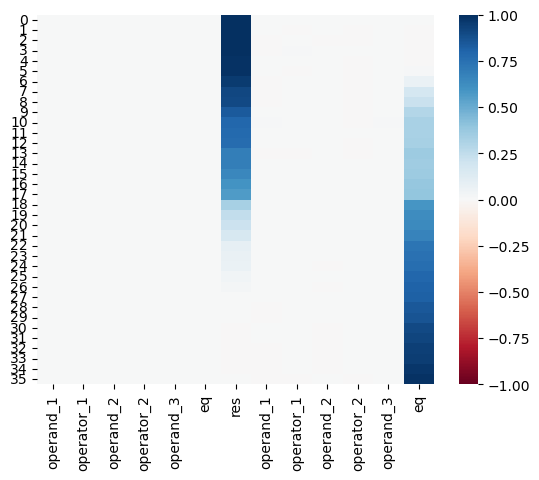

In [83]:
sns.heatmap(
        compute_macro_mean(patched_results_operands_operators, all_resid_pre_clean_logit_diffs, all_resid_pre_corrupted_logit_diffs),
        cmap='RdBu',
        vmin=-1,
        vmax=1,
        yticklabels=True,
        annot=False,
        xticklabels = LABELS
    )

<Axes: >

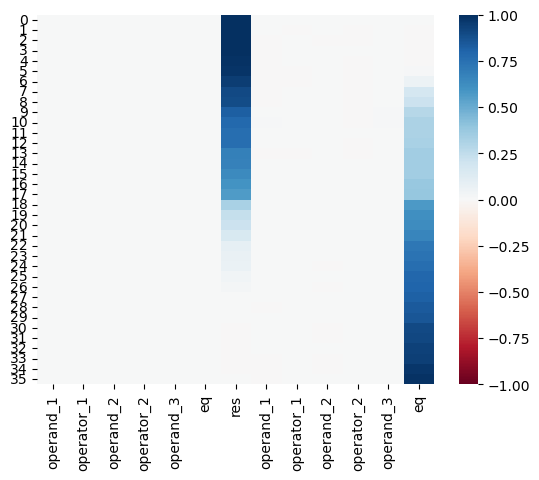

In [84]:
sns.heatmap(
        compute_micro_mean(patched_results_operands_operators, all_resid_pre_clean_logit_diffs, all_resid_pre_corrupted_logit_diffs),
        cmap='RdBu',
        vmin=-1,
        vmax=1,
        yticklabels=True,
        annot=False,
        xticklabels = LABELS
    )

<Axes: >

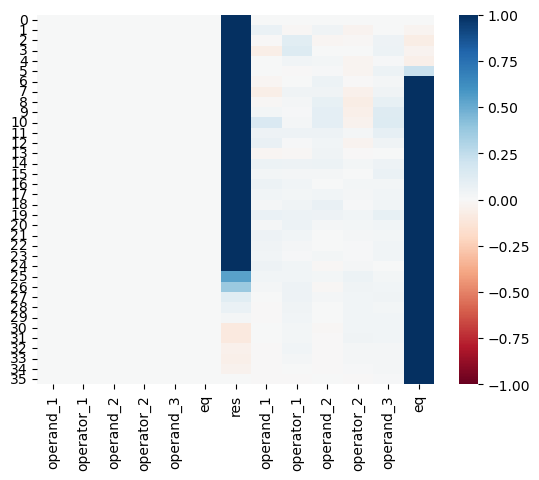

In [85]:
sns.heatmap(
        compute_pe(patched_results_operands_operators, all_resid_pre_clean_logit_diffs, all_resid_pre_corrupted_logit_diffs),
        cmap='RdBu',
        vmin=-1,
        vmax=1,
        yticklabels=True,
        annot=False,
        xticklabels = LABELS
    )

Patching: from the correct to the on with the words numerical representation

Resid pre

In [117]:
all_resid_pre_act_patch_results = []
all_resid_pre_clean_logit_diffs = []
all_resid_pre_corrupted_logit_diffs = []
all_resid_pre_clean_tokens = []
for idx, (item, item_counterfactual) in enumerate(tqdm(zip(intervention_list, counterfactual_operands_words), total=len(intervention_list))):
    if accuracy_base[idx] and not accuracy_base_operands_words[idx]:
        patched_logit_diff, clean_logit_diff, corrupted_logit_diff, clean_tokens, corrupted_tokens = get_patched_result_counterfactual(item, item_counterfactual)
        all_resid_pre_act_patch_results.append(patched_logit_diff)
        all_resid_pre_clean_logit_diffs.append(clean_logit_diff)
        all_resid_pre_corrupted_logit_diffs.append(corrupted_logit_diff)
        all_resid_pre_clean_tokens.append(clean_tokens)

  0%|          | 0/210 [00:00<?, ?it/s]

  0%|          | 0/540 [00:00<?, ?it/s]

  0%|          | 0/540 [00:00<?, ?it/s]

  0%|          | 0/540 [00:00<?, ?it/s]

  0%|          | 0/540 [00:00<?, ?it/s]

  0%|          | 0/540 [00:00<?, ?it/s]

  0%|          | 0/540 [00:00<?, ?it/s]

  0%|          | 0/540 [00:00<?, ?it/s]

  0%|          | 0/540 [00:00<?, ?it/s]

  0%|          | 0/540 [00:00<?, ?it/s]

  0%|          | 0/756 [00:00<?, ?it/s]

  0%|          | 0/756 [00:00<?, ?it/s]

  0%|          | 0/756 [00:00<?, ?it/s]

  0%|          | 0/756 [00:00<?, ?it/s]

  0%|          | 0/756 [00:00<?, ?it/s]

  0%|          | 0/756 [00:00<?, ?it/s]

  0%|          | 0/756 [00:00<?, ?it/s]

  0%|          | 0/756 [00:00<?, ?it/s]

  0%|          | 0/756 [00:00<?, ?it/s]

  0%|          | 0/756 [00:00<?, ?it/s]

  0%|          | 0/756 [00:00<?, ?it/s]

  0%|          | 0/756 [00:00<?, ?it/s]

  0%|          | 0/756 [00:00<?, ?it/s]

  0%|          | 0/756 [00:00<?, ?it/s]

  0%|          | 0/756 [00:00<?, ?it/s]

  0%|          | 0/756 [00:00<?, ?it/s]

  0%|          | 0/756 [00:00<?, ?it/s]

  0%|          | 0/756 [00:00<?, ?it/s]

  0%|          | 0/756 [00:00<?, ?it/s]

  0%|          | 0/756 [00:00<?, ?it/s]

  0%|          | 0/756 [00:00<?, ?it/s]

  0%|          | 0/756 [00:00<?, ?it/s]

  0%|          | 0/900 [00:00<?, ?it/s]

  0%|          | 0/900 [00:00<?, ?it/s]

  0%|          | 0/900 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [118]:
patched_results_operands_operators = take_operands_and_operators_results(all_resid_pre_clean_tokens, all_resid_pre_act_patch_results)

<Axes: >

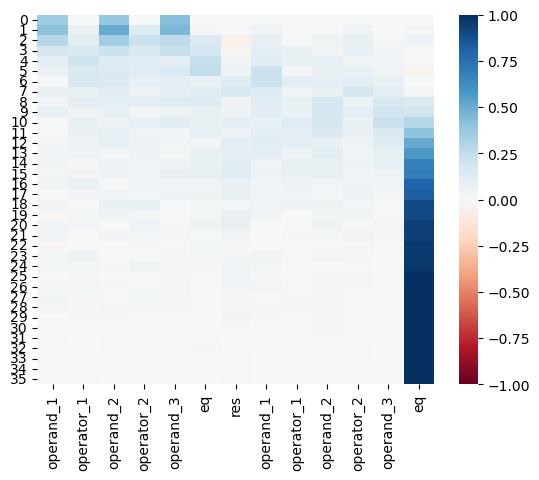

In [119]:
sns.heatmap(
        compute_macro_mean(patched_results_operands_operators, all_resid_pre_clean_logit_diffs, all_resid_pre_corrupted_logit_diffs),
        cmap='RdBu',
        vmin=-1,
        vmax=1,
        yticklabels=True,
        annot=False,
        xticklabels = LABELS
    )

<Axes: >

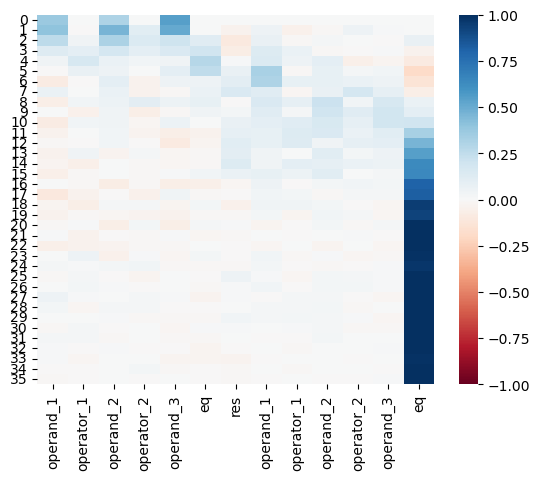

In [120]:
sns.heatmap(
        compute_micro_mean(patched_results_operands_operators, all_resid_pre_clean_logit_diffs, all_resid_pre_corrupted_logit_diffs),
        cmap='RdBu',
        vmin=-1,
        vmax=1,
        yticklabels=True,
        annot=False,
        xticklabels = LABELS
    )

<Axes: >

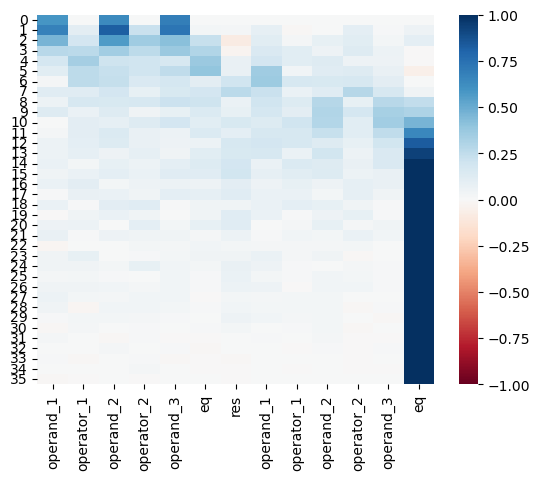

In [121]:
sns.heatmap(
        compute_pe(patched_results_operands_operators, all_resid_pre_clean_logit_diffs, all_resid_pre_corrupted_logit_diffs),
        cmap='RdBu',
        vmin=-1,
        vmax=1,
        yticklabels=True,
        annot=False,
        xticklabels = LABELS
    )

Attention layers

In [123]:
attn_layer_act_patch_results = []
attn_layer_clean_logit_diffs = []
attn_layer_corrupted_logit_diffs = []
attn_layer_clean_tokens = []
for idx, (item, item_counterfactual) in enumerate(tqdm(zip(intervention_list, counterfactual_operands_words), total=len(intervention_list))):
    if accuracy_base[idx] and not accuracy_base_operands_words[idx]:
        patched_logit_diff, clean_logit_diff, corrupted_logit_diff, clean_tokens, corrupted_tokens = get_patched_result_counterfactual(item, item_counterfactual, activation_name='attn_layer')
        attn_layer_act_patch_results.append(patched_logit_diff)
        attn_layer_clean_logit_diffs.append(clean_logit_diff)
        attn_layer_corrupted_logit_diffs.append(corrupted_logit_diff)
        attn_layer_clean_tokens.append(clean_tokens)
        
attn_layer_patched_results_operands_operators = take_operands_and_operators_results(attn_layer_clean_tokens, attn_layer_act_patch_results)

  0%|          | 0/210 [00:00<?, ?it/s]

  0%|          | 0/540 [00:00<?, ?it/s]

  0%|          | 0/540 [00:00<?, ?it/s]

  0%|          | 0/540 [00:00<?, ?it/s]

  0%|          | 0/540 [00:00<?, ?it/s]

  0%|          | 0/540 [00:00<?, ?it/s]

  0%|          | 0/540 [00:00<?, ?it/s]

  0%|          | 0/540 [00:00<?, ?it/s]

  0%|          | 0/540 [00:00<?, ?it/s]

  0%|          | 0/540 [00:00<?, ?it/s]

  0%|          | 0/756 [00:00<?, ?it/s]

  0%|          | 0/756 [00:00<?, ?it/s]

  0%|          | 0/756 [00:00<?, ?it/s]

  0%|          | 0/756 [00:00<?, ?it/s]

  0%|          | 0/756 [00:00<?, ?it/s]

  0%|          | 0/756 [00:00<?, ?it/s]

  0%|          | 0/756 [00:00<?, ?it/s]

  0%|          | 0/756 [00:00<?, ?it/s]

  0%|          | 0/756 [00:00<?, ?it/s]

  0%|          | 0/756 [00:00<?, ?it/s]

  0%|          | 0/756 [00:00<?, ?it/s]

  0%|          | 0/756 [00:00<?, ?it/s]

  0%|          | 0/756 [00:00<?, ?it/s]

  0%|          | 0/756 [00:00<?, ?it/s]

  0%|          | 0/756 [00:00<?, ?it/s]

  0%|          | 0/756 [00:00<?, ?it/s]

  0%|          | 0/756 [00:00<?, ?it/s]

  0%|          | 0/756 [00:00<?, ?it/s]

  0%|          | 0/756 [00:00<?, ?it/s]

  0%|          | 0/756 [00:00<?, ?it/s]

  0%|          | 0/756 [00:00<?, ?it/s]

  0%|          | 0/756 [00:00<?, ?it/s]

  0%|          | 0/900 [00:00<?, ?it/s]

  0%|          | 0/900 [00:00<?, ?it/s]

  0%|          | 0/900 [00:00<?, ?it/s]

  0%|          | 0/900 [00:00<?, ?it/s]

<Axes: >

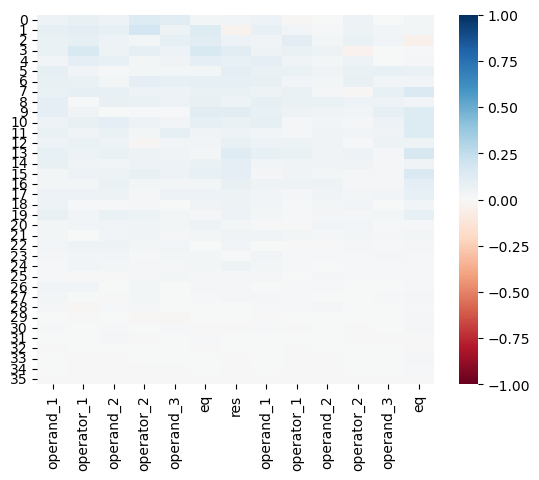

In [125]:
sns.heatmap(
        compute_macro_mean(attn_layer_patched_results_operands_operators, attn_layer_clean_logit_diffs, attn_layer_corrupted_logit_diffs),
        cmap='RdBu',
        vmin=-1,
        vmax=1,
        yticklabels=True,
        annot=False,
        xticklabels = LABELS
    )

<Axes: >

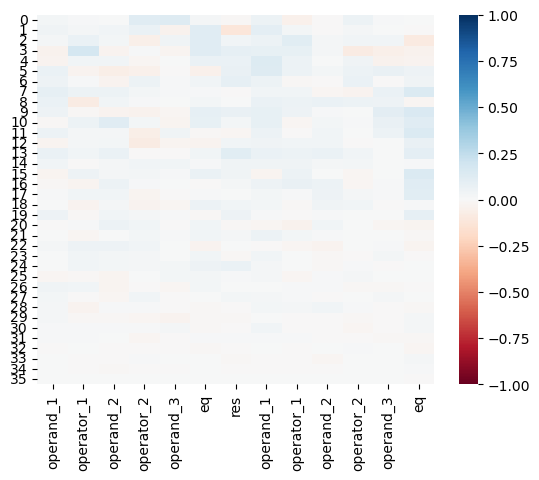

In [126]:
sns.heatmap(
        compute_micro_mean(attn_layer_patched_results_operands_operators, attn_layer_clean_logit_diffs, attn_layer_corrupted_logit_diffs),
        cmap='RdBu',
        vmin=-1,
        vmax=1,
        yticklabels=True,
        annot=False,
        xticklabels = LABELS
    )

<Axes: >

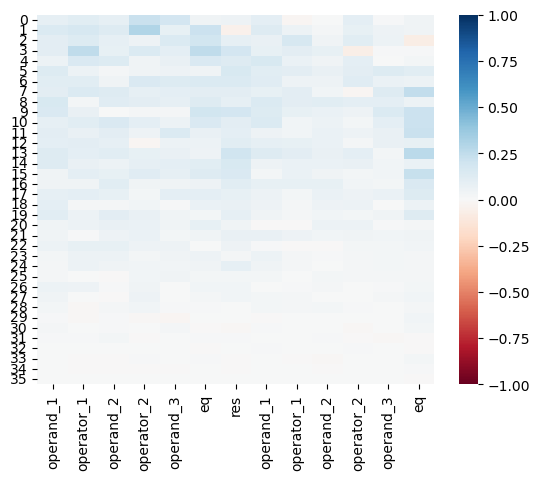

In [127]:
sns.heatmap(
        compute_pe(attn_layer_patched_results_operands_operators, attn_layer_clean_logit_diffs, attn_layer_corrupted_logit_diffs),
        cmap='RdBu',
        vmin=-1,
        vmax=1,
        yticklabels=True,
        annot=False,
        xticklabels = LABELS
    )

MLP Layers

In [128]:
mlp_act_patch_results = []
mlp_clean_logit_diffs = []
mlp_corrupted_logit_diffs = []
mlp_clean_tokens = []
for idx, (item, item_counterfactual) in enumerate(tqdm(zip(intervention_list, counterfactual_operands_words), total=len(intervention_list))):
    if accuracy_base[idx] and not accuracy_base_operands_words[idx]:
        patched_logit_diff, clean_logit_diff, corrupted_logit_diff, clean_tokens, corrupted_tokens = get_patched_result_counterfactual(item, item_counterfactual, activation_name='mlp')
        mlp_act_patch_results.append(patched_logit_diff)
        mlp_clean_logit_diffs.append(clean_logit_diff)
        mlp_corrupted_logit_diffs.append(corrupted_logit_diff)
        mlp_clean_tokens.append(clean_tokens)
        
mlp_patched_results_operands_operators = take_operands_and_operators_results(mlp_clean_tokens, mlp_act_patch_results)

  0%|          | 0/210 [00:00<?, ?it/s]

  0%|          | 0/540 [00:00<?, ?it/s]

  0%|          | 0/540 [00:00<?, ?it/s]

  0%|          | 0/540 [00:00<?, ?it/s]

  0%|          | 0/540 [00:00<?, ?it/s]

  0%|          | 0/540 [00:00<?, ?it/s]

  0%|          | 0/540 [00:00<?, ?it/s]

  0%|          | 0/540 [00:00<?, ?it/s]

  0%|          | 0/540 [00:00<?, ?it/s]

  0%|          | 0/540 [00:00<?, ?it/s]

  0%|          | 0/756 [00:00<?, ?it/s]

  0%|          | 0/756 [00:00<?, ?it/s]

  0%|          | 0/756 [00:00<?, ?it/s]

  0%|          | 0/756 [00:00<?, ?it/s]

  0%|          | 0/756 [00:00<?, ?it/s]

  0%|          | 0/756 [00:00<?, ?it/s]

  0%|          | 0/756 [00:00<?, ?it/s]

  0%|          | 0/756 [00:00<?, ?it/s]

  0%|          | 0/756 [00:00<?, ?it/s]

  0%|          | 0/756 [00:00<?, ?it/s]

  0%|          | 0/756 [00:00<?, ?it/s]

  0%|          | 0/756 [00:00<?, ?it/s]

  0%|          | 0/756 [00:00<?, ?it/s]

  0%|          | 0/756 [00:00<?, ?it/s]

  0%|          | 0/756 [00:00<?, ?it/s]

  0%|          | 0/756 [00:00<?, ?it/s]

  0%|          | 0/756 [00:00<?, ?it/s]

  0%|          | 0/756 [00:00<?, ?it/s]

  0%|          | 0/756 [00:00<?, ?it/s]

  0%|          | 0/756 [00:00<?, ?it/s]

  0%|          | 0/756 [00:00<?, ?it/s]

  0%|          | 0/756 [00:00<?, ?it/s]

  0%|          | 0/900 [00:00<?, ?it/s]

  0%|          | 0/900 [00:00<?, ?it/s]

  0%|          | 0/900 [00:00<?, ?it/s]

  0%|          | 0/900 [00:00<?, ?it/s]

<Axes: >

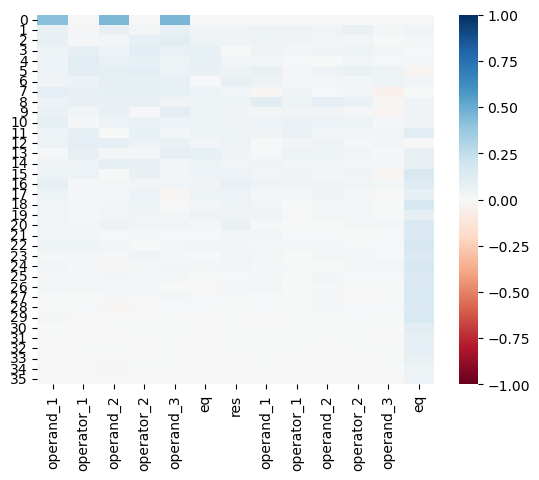

In [130]:
sns.heatmap(
        compute_macro_mean(mlp_patched_results_operands_operators, mlp_clean_logit_diffs, mlp_corrupted_logit_diffs),
        cmap='RdBu',
        vmin=-1,
        vmax=1,
        yticklabels=True,
        annot=False,
        xticklabels = LABELS
    )

<Axes: >

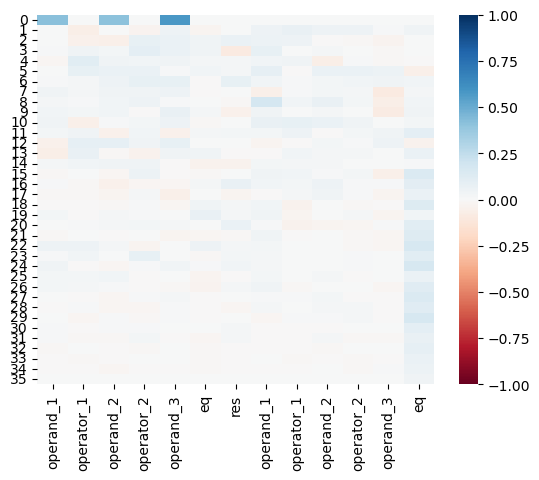

In [131]:
sns.heatmap(
        compute_micro_mean(mlp_patched_results_operands_operators, mlp_clean_logit_diffs, mlp_corrupted_logit_diffs),
        cmap='RdBu',
        vmin=-1,
        vmax=1,
        yticklabels=True,
        annot=False,
        xticklabels = LABELS
    )

<Axes: >

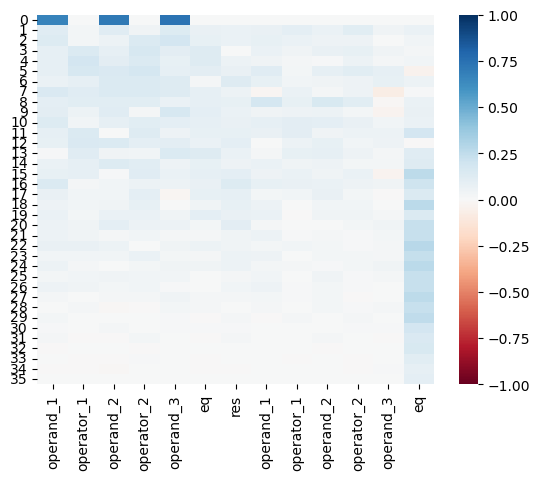

In [132]:
sns.heatmap(
        compute_pe(mlp_patched_results_operands_operators, mlp_clean_logit_diffs, mlp_corrupted_logit_diffs),
        cmap='RdBu',
        vmin=-1,
        vmax=1,
        yticklabels=True,
        annot=False,
        xticklabels = LABELS
    )

Attention heads

In [ ]:
head_patch_results = []
head_clean_logit_diffs = []
head_corrupted_logit_diffs = []
head_clean_tokens = []
for idx, (item, item_counterfactual) in enumerate(tqdm(zip(intervention_list, counterfactual_operands_words), total=len(intervention_list))):
    if accuracy_base[idx] and not accuracy_base_operands_words[idx]:
        patched_logit_diff, clean_logit_diff, corrupted_logit_diff, clean_tokens, corrupted_tokens = get_patched_result_counterfactual(item, item_counterfactual, activation_name='head')
        head_patch_results.append(patched_logit_diff)
        head_clean_logit_diffs.append(clean_logit_diff)
        head_corrupted_logit_diffs.append(corrupted_logit_diff)
        head_clean_tokens.append(clean_tokens)

  0%|          | 0/210 [00:00<?, ?it/s]

  0%|          | 0/1440 [00:00<?, ?it/s]

  0%|          | 0/1440 [00:00<?, ?it/s]

  0%|          | 0/1440 [00:00<?, ?it/s]

  0%|          | 0/1440 [00:00<?, ?it/s]

  0%|          | 0/1440 [00:00<?, ?it/s]

  0%|          | 0/1440 [00:00<?, ?it/s]

  0%|          | 0/1440 [00:00<?, ?it/s]

In [ ]:
head_patched_results_operands_operators = take_operands_and_operators_results(head_clean_tokens, head_patch_results)

<Axes: >

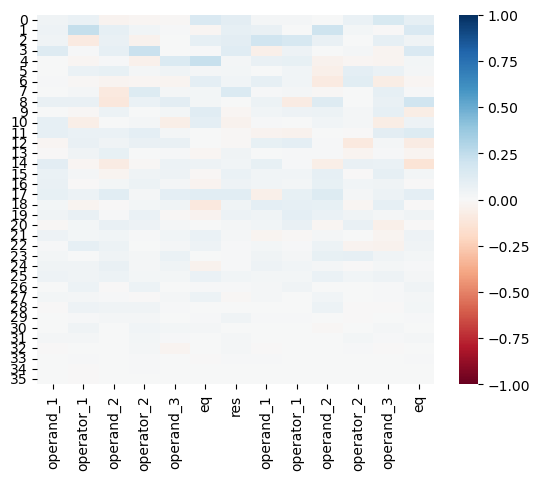

In [ ]:
sns.heatmap(
        compute_macro_mean(head_patched_results_operands_operators, head_clean_logit_diffs, head_corrupted_logit_diffs),
        cmap='RdBu',
        vmin=-1,
        vmax=1,
        yticklabels=True,
        annot=False,
        xticklabels = LABELS
    )

<Axes: >

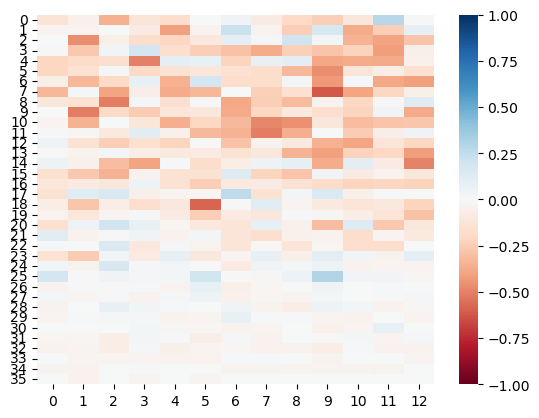

In [152]:
sns.heatmap(
        compute_micro_mean(head_patched_results_operands_operators, head_clean_logit_diffs, head_corrupted_logit_diffs),
        cmap='RdBu',
        vmin=-1,
        vmax=1,
        yticklabels=True,
        annot=False,
    )

<Axes: >

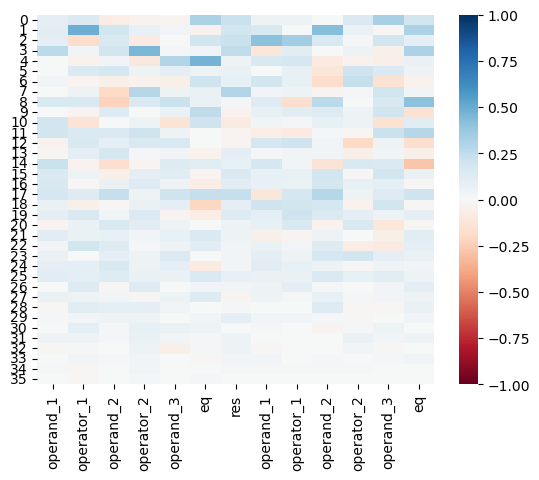

In [153]:
sns.heatmap(
        compute_pe(head_patched_results_operands_operators, head_clean_logit_diffs, head_corrupted_logit_diffs),
        cmap='RdBu',
        vmin=-1,
        vmax=1,
        yticklabels=True,
        annot=False,
        xticklabels = LABELS
    )